# 🎯 Project Brief
Playhouse Communication is one of Nigeria's leading digital marketing agencies. They combine design and media planning with cutting-edge tech solutions to reimagine what marketing is all about. Their client roster is a mix of global juggernauts and nimble SMEs, each redefining their sectors.

We are rolling out the ultimate arena for innovation in data and setting the stage for up-and-coming data scientists and analysts to showcase their skills, win huge cash prizes, and boost their careers. The "Hack the Feed" hackathon is a showdown where data analytics meets creative prowess.

### The Project
Your mission? To decode a treasure trove of social media data for one of our high-profile clients and transform it into game-changing insights.

In a rare move, we're handing you the keys to a vault of exclusive social media data to let you dig deep, get creative, and strike gold with actionable insights that could redefine the future of digital marketing.  This isn't just a hackathon; it's your chance to shape the future of digital engagement. 🚀

### Key Deliverables:
Participants are expected to:
* Create a comprehensive and reproducible report detailing their findings.
* Propose actionable recommendations based on the insights.
* Create a simple and engaging visualisation of your results & analysis.

### Evaluation Criteria:
Submissions will be evaluated based on the following:
* Innovativeness:
Originality and novelty of the insights.
* Actionability:
Practicality and feasibility of the recommendations.
* Presentation Quality:
Clarity and effectiveness in conveying findings in writing and visual form.
* Depth of Analysis:
How thoroughly the data has been explored and understood.

### Rules:
* Participants must sign and respect the confidentiality agreement regarding the data provided.
* Data must not be used for purposes outside of this hackathon.
* All analyses should be original and free from plagiarism.
* Submissions after the deadline will not be considered.

Playhouse Communication Ltd. is eager to see the innovative solutions that you will bring to the table. This hackathon is not just a competition but an opportunity to gain subsequent employment and shape the future of digital marketing in Nigeria.

### 👣 Process
* Data Familiarization: 
    * Begin by understanding the datasets provided. Explore the columns, types of data, and any missing values.
    * Familiarize yourself with the platforms (Instagram, Facebook, Twitter, LinkedIn) from which the data originates to understand the context.
* Data Cleaning and Pre-processing: 
    * Handle missing values, either by imputing or removing them based on their relevance.
    * Convert data types if necessary (e.g., dates, categorical data).
    * Remove any duplicate entries.
* Exploratory Data Analysis (EDA): 
    * Use visualization tools to understand the distribution and trends in the data.
    * Identify key metrics like engagement rates, post-reach, and user demographics.
    * Check for any patterns or anomalies in posting times, content types, or engagement.
* Define Key Questions (here are a few examples, not exhaustive): 
    * What are they talking about?
    * Spread number of words by tags/ hashtags 
    * What are the most engaging types of posts?
    * Which platform yields the highest engagement for the client?
    * What are the peak times for user engagement? (Best date / time for impressions/ engagements/ reach)
    * Are there any noticeable trends over time (e.g., increasing likes, decreasing shares)?
        * Are there are any increases / decreases in engagements
        * Is this related to increase or reduction in activity
        * Is this related to time/ date of post?
        * Is this related to sentiment of post / hashtag?
        * Count of posts per day/ month
        * Which day of the week has the most / least posts?
    * Popular tags & hashtags
    * Sentiment analysis: Relationship between sentiment and engagement/ clicks
    * Which poster had the highest / lowest engagement/ impression?
    * Relationship between a content type and clicks/ engagement / impressions
    * Most popular and least popular post across all metrics
    * Word cloud of posts
    * Relationship between length of post and engagement.
        * 
* Feature Engineering: 
    * Based on EDA, create new metrics or indicators that might be more informative. For instance, engagement rate as a ratio of engagements to impressions.
* Deep Dive Analysis: 
    * Use statistical methods or machine learning (if applicable) to understand underlying patterns or to predict future trends.
        * Can we predict whether a post will have high or low engagement given certain features?
        * What linear relationships exist between features?
        * 
    * Segment data to find insights specific to certain demographics or post-types.
* Insight Generation: 
    * Based on the analysis, derive actionable insights.
    * Translate these insights into recommendations for the client.
* Visualisation: 
    * Use graphs, charts, and other visualisation tools to make your findings easily digestible.
    * Ensure that visualisations are clear and can be understood by someone without a technical background.
    * Provide a shareable link to the visualisation
* Report Compilation: 
    * Organize your findings, insights, and recommendations in a structured report.
    * Ensure clarity and simplicity in conveying complex data insights.

### Load Workspace

In [1]:
import re
import datetime as dt

import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from wordcloud import WordCloud

from sklearn.metrics import r2_score

### Load the Data

In [2]:
linkedin = pd.read_csv('Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_LinkedIn.csv', low_memory=False)
twitter = pd.read_csv('Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Twitter.csv', low_memory=False)
facebook = pd.read_csv('Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Facebook.csv', low_memory=False)
instagram = pd.read_csv('Post Performance (Stanbic IBTC) January 1, 2013 - July 13, 2023_Instagram.csv', low_memory=False)

In [3]:
print(linkedin.info())
print(twitter.info())
print(facebook.info())
print(instagram.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7760 entries, 0 to 7759
Columns: 147 entries, Date to Tags
dtypes: float64(127), int64(1), object(19)
memory usage: 8.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8529 entries, 0 to 8528
Columns: 147 entries, Date to Tags
dtypes: float64(119), int64(1), object(27)
memory usage: 9.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9803 entries, 0 to 9802
Columns: 147 entries, Date to Tags
dtypes: float64(78), object(69)
memory usage: 11.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 147 entries, Date to Tags
dtypes: float64(125), int64(1), object(21)
memory usage: 11.2+ MB
None


In [4]:
linkedin.head()

Date              Post ID   Network Post Type Content Type  \
0  7/13/2023 12:03 pm  7085212016608456704  LinkedIn      Post        Photo   
1   7/12/2023 8:00 pm  7084969706025009152  LinkedIn      Post         Text   
2   7/12/2023 7:00 pm  7084954641788018688  LinkedIn      Post        Photo   
3   7/11/2023 2:49 pm  7084529022105231360  LinkedIn      Post        Photo   
4   7/11/2023 9:17 am  7084445462967070721  LinkedIn      Post        Photo   

        Profile        Sent by  \
0  Stanbic IBTC  Blessing Ubah   
1  Stanbic IBTC  Blessing Ubah   
2  Stanbic IBTC  Blessing Ubah   
3  Stanbic IBTC  Blessing Ubah   
4  Stanbic IBTC  Blessing Ubah   

                                                Link  \
0  https://linkedin.com/feed/update/urn:li:share:...   
1  https://linkedin.com/feed/update/urn:li:share:...   
2  https://linkedin.com/feed/update/urn:li:ugcPos...   
3  https://linkedin.com/feed/update/urn:li:share:...   
4  https://linkedin.com/feed/update/urn:li:share:...   

                                                Post Linked Content  ...  \
0  Your money should not be a gamble. Before you ...            NaN  ...   
1  What skill (s) do you have, that no one ever t...            NaN  ...   
2  Sade was able to acquire a home loan and make ...            NaN  ...   
3  Safeguard every aspect of your operations with...            NaN  ...   
4  Together, we can make a difference and build a...            NaN  ...   

  Video Removed from Playlists Annotation Impressions  \
0                          NaN                    NaN   
1                          NaN                    NaN   
2                          NaN                    NaN   
3                          NaN                    NaN   
4                          NaN                    NaN   

   Annotation Clickable Impressions  Annotation Closable Impressions  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                               NaN                              NaN   

   Annotation Closes  Card Impressions  Card Teaser Impressions  \
0                NaN               NaN                      NaN   
1                NaN               NaN                      NaN   
2                NaN               NaN                      NaN   
3                NaN               NaN                      NaN   
4                NaN               NaN                      NaN   

   Card Teaser Clicks  Poll Votes                 Tags  
0                 NaN         NaN            CIB Posts  
1                 NaN         NaN                  NaN  
2                 NaN         NaN  Weekly Wealth Posts  
3                 NaN         NaN  Weekly Wealth Posts  
4                 NaN         NaN                  NaN  

[5 rows x 147 columns]

In [5]:
twitter.head()

Date              Post ID  Network Post Type Content Type  \
0  7/13/2023 10:57 am  1679429829567946759  Twitter     Tweet        Photo   
1   7/12/2023 8:03 pm  1679204777081864192  Twitter     Tweet         Text   
2   7/12/2023 7:00 pm  1679189012798660608  Twitter     Tweet        Photo   
3   7/12/2023 6:20 pm  1679179017084354560  Twitter     Tweet        Photo   
4  7/11/2023 12:50 pm  1678733396992745472  Twitter     Tweet        Photo   

         Profile        Sent by  \
0  '@StanbicIBTC   Sophia Amuka   
1  '@StanbicIBTC  Blessing Ubah   
2  '@StanbicIBTC  Blessing Ubah   
3  '@StanbicIBTC  Blessing Ubah   
4  '@StanbicIBTC   Sophia Amuka   

                                                Link  \
0  https://twitter.com/StanbicIBTC/status/1679429...   
1  https://twitter.com/StanbicIBTC/status/1679204...   
2  https://twitter.com/StanbicIBTC/status/1679189...   
3  https://twitter.com/StanbicIBTC/status/1679179...   
4  https://twitter.com/StanbicIBTC/status/1678733...   

                                                Post  \
0  Your money should not be a gamble. Before you ...   
1  What skill (s) do you have, that no one ever t...   
2  Sade was able to acquire a home loan and make ...   
3  Here are some mistakes you shouldn’t make duri...   
4  Safeguard every aspect of your operations with...   

                                      Linked Content  ...  \
0  https://twitter.com/StanbicIBTC/status/1679429...  ...   
1                                                NaN  ...   
2  https://bit.ly/StanbicIBTCHomeLoans, https://t...  ...   
3  https://twitter.com/StanbicIBTC/status/1679179...  ...   
4  https://twitter.com/StanbicIBTC/status/1678733...  ...   

  Video Removed from Playlists Annotation Impressions  \
0                          NaN                    NaN   
1                          NaN                    NaN   
2                          NaN                    NaN   
3                          NaN                    NaN   
4                          NaN                    NaN   

   Annotation Clickable Impressions  Annotation Closable Impressions  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                               NaN                              NaN   

   Annotation Closes  Card Impressions  Card Teaser Impressions  \
0                NaN               NaN                      NaN   
1                NaN               NaN                      NaN   
2                NaN               NaN                      NaN   
3                NaN               NaN                      NaN   
4                NaN               NaN                      NaN   

   Card Teaser Clicks  Poll Votes  \
0                 NaN         NaN   
1                 NaN         NaN   
2                 NaN         NaN   
3                 NaN         NaN   
4                 NaN         NaN   

                                           Tags  
0                                     CIB Posts  
1                                           NaN  
2                           Weekly Wealth Posts  
3                                           NaN  
4  Insurance Limited Posts, Weekly Wealth Posts  

[5 rows x 147 columns]

In [6]:
facebook.head()

Date                           Post ID   Network Post Type  \
0  12/17/2022 5:08 pm  253788558082460_5441020446025886  Facebook      Post   
1   5/4/2019 10:01 am  253788558082460_2001824979945467  Facebook      Post   
2    6/2/2020 9:00 pm  253788558082460_2768996106561680  Facebook      Post   
3   5/9/2022 10:37 am  253788558082460_4808157902645480  Facebook      Post   
4  7/18/2021 10:00 am  253788558082460_3890983261029620  Facebook      Post   

  Content Type       Profile            Sent by  \
0        Video  Stanbic IBTC  Damilare Oyekanmi   
1        Photo  Stanbic IBTC                      
2        Photo  Stanbic IBTC                      
3        Photo  Stanbic IBTC  Damilare Oyekanmi   
4        Photo  Stanbic IBTC                      

                                                Link  \
0  https://www.facebook.com/253788558082460/posts...   
1  https://www.facebook.com/253788558082460/posts...   
2  https://www.facebook.com/StanbicIBTC/photos/a....   
3  https://www.facebook.com/StanbicIBTC/photos/a....   
4  https://www.facebook.com/StanbicIBTC/photos/a....   

                                                Post  \
0  We celebrated recently with Novare, one of our...   
1  N5k can get you started today. Call 01 280 126...   
2  Still not sure whether to invest in the FGN Bo...   
3  Let nothing stop you from achieving your goals...   
4  If you were to pick one wish, what would it be...   

                                      Linked Content  ...  \
0  https://www.facebook.com/StanbicIBTC/videos/53...  ...   
1  https://www.facebook.com/StanbicIBTC/photos/a....  ...   
2  https://www.facebook.com/StanbicIBTC/photos/a....  ...   
3  https://www.facebook.com/StanbicIBTC/photos/a....  ...   
4  https://www.facebook.com/StanbicIBTC/photos/a....  ...   

  Video Removed from Playlists Annotation Impressions  \
0                          NaN                    NaN   
1                          NaN                    NaN   
2                          NaN                    NaN   
3                          NaN                    NaN   
4                          NaN                    NaN   

  Annotation Clickable Impressions Annotation Closable Impressions  \
0                              NaN                             NaN   
1                              NaN                             NaN   
2                              NaN                             NaN   
3                              NaN                             NaN   
4                              NaN                             NaN   

   Annotation Closes Card Impressions Card Teaser Impressions  \
0                NaN              NaN                     NaN   
1                NaN              NaN                     NaN   
2                NaN              NaN                     NaN   
3                NaN              NaN                     NaN   
4                NaN              NaN                     NaN   

   Card Teaser Clicks Poll Votes       Tags  
0                 NaN        NaN  CIB Posts  
1                 NaN        NaN        NaN  
2                 NaN        NaN        NaN  
3                 NaN        NaN        NaN  
4                 NaN        NaN        NaN  

[5 rows x 147 columns]

In [7]:
instagram.head()

Date            Post ID    Network Post Type Content Type  \
0  1/30/2023 5:06 pm  18216468940204235  Instagram      Post     Carousel   
1  4/15/2022 9:04 am  17971531720518163  Instagram      Post        Photo   
2  5/28/2021 8:45 pm  18008486986321009  Instagram      Post        Video   
3   1/4/2023 4:08 pm  17903404469640387  Instagram      Post     Carousel   
4  12/7/2021 6:52 pm  17950858072558814  Instagram      Post        Photo   

       Profile        Sent by                                      Link  \
0  stanbicibtc                 https://www.instagram.com/p/CoC6CKBIHbV/   
1  stanbicibtc  Blessing Ubah  https://www.instagram.com/p/CcXUQTEMRm7/   
2  stanbicibtc                 https://www.instagram.com/p/CPbcdjygiaK/   
3  stanbicibtc                 https://www.instagram.com/p/Cm_2oino-Me/   
4  stanbicibtc  Blessing Ubah  https://www.instagram.com/p/CXMNAKFsjSs/   

                                                Post  Linked Content  ...  \
0  The new Naira banknotes in circulation have se...             NaN  ...   
1  We hope the faith that this #GoodFriday restor...             NaN  ...   
2  Reposted from @mzdosunmu My son's entry\n#ITCA...             NaN  ...   
3  The new Naira banknotes in circulation have se...             NaN  ...   
4  If you were born in June, ‘cut soap for us oh’...             NaN  ...   

  Video Removed from Playlists Annotation Impressions  \
0                          NaN                    NaN   
1                          NaN                    NaN   
2                          NaN                    NaN   
3                          NaN                    NaN   
4                          NaN                    NaN   

   Annotation Clickable Impressions  Annotation Closable Impressions  \
0                               NaN                              NaN   
1                               NaN                              NaN   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                               NaN                              NaN   

   Annotation Closes  Card Impressions  Card Teaser Impressions  \
0                NaN               NaN                      NaN   
1                NaN               NaN                      NaN   
2                NaN               NaN                      NaN   
3                NaN               NaN                      NaN   
4                NaN               NaN                      NaN   

   Card Teaser Clicks  Poll Votes  Tags  
0                 NaN         NaN   NaN  
1                 NaN         NaN   NaN  
2                 NaN         NaN   NaN  
3                 NaN         NaN   NaN  
4                 NaN         NaN   NaN  

[5 rows x 147 columns]

All datasets have 147 features. Let's merge them:

In [8]:
# Create a list of DataFrames
dfs = [linkedin, twitter, facebook, instagram]

# Check if columns in all DataFrames are the same
columns_are_same = all(df.columns.equals(dfs[0].columns) for df in dfs)

if columns_are_same:
    print("All DataFrames have the same columns.")
else:
    print("Not all DataFrames have the same columns.")

All DataFrames have the same columns.


In [9]:
df = pd.concat(dfs, axis=0, ignore_index=True)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36092 entries, 0 to 36091
Columns: 147 entries, Date to Tags
dtypes: float64(70), object(77)
memory usage: 40.5+ MB
None


Date              Post ID   Network Post Type Content Type  \
0  7/13/2023 12:03 pm  7085212016608456704  LinkedIn      Post        Photo   
1   7/12/2023 8:00 pm  7084969706025009152  LinkedIn      Post         Text   
2   7/12/2023 7:00 pm  7084954641788018688  LinkedIn      Post        Photo   
3   7/11/2023 2:49 pm  7084529022105231360  LinkedIn      Post        Photo   
4   7/11/2023 9:17 am  7084445462967070721  LinkedIn      Post        Photo   

        Profile        Sent by  \
0  Stanbic IBTC  Blessing Ubah   
1  Stanbic IBTC  Blessing Ubah   
2  Stanbic IBTC  Blessing Ubah   
3  Stanbic IBTC  Blessing Ubah   
4  Stanbic IBTC  Blessing Ubah   

                                                Link  \
0  https://linkedin.com/feed/update/urn:li:share:...   
1  https://linkedin.com/feed/update/urn:li:share:...   
2  https://linkedin.com/feed/update/urn:li:ugcPos...   
3  https://linkedin.com/feed/update/urn:li:share:...   
4  https://linkedin.com/feed/update/urn:li:share:...   

                                                Post Linked Content  ...  \
0  Your money should not be a gamble. Before you ...            NaN  ...   
1  What skill (s) do you have, that no one ever t...            NaN  ...   
2  Sade was able to acquire a home loan and make ...            NaN  ...   
3  Safeguard every aspect of your operations with...            NaN  ...   
4  Together, we can make a difference and build a...            NaN  ...   

  Video Removed from Playlists Annotation Impressions  \
0                          NaN                    NaN   
1                          NaN                    NaN   
2                          NaN                    NaN   
3                          NaN                    NaN   
4                          NaN                    NaN   

  Annotation Clickable Impressions Annotation Closable Impressions  \
0                              NaN                             NaN   
1                              NaN                             NaN   
2                              NaN                             NaN   
3                              NaN                             NaN   
4                              NaN                             NaN   

   Annotation Closes Card Impressions Card Teaser Impressions  \
0                NaN              NaN                     NaN   
1                NaN              NaN                     NaN   
2                NaN              NaN                     NaN   
3                NaN              NaN                     NaN   
4                NaN              NaN                     NaN   

   Card Teaser Clicks Poll Votes                 Tags  
0                 NaN        NaN            CIB Posts  
1                 NaN        NaN                  NaN  
2                 NaN        NaN  Weekly Wealth Posts  
3                 NaN        NaN  Weekly Wealth Posts  
4                 NaN        NaN                  NaN  

[5 rows x 147 columns]

### Preview the Dataset

In [10]:
df.sample(10)

Date                           Post ID    Network  \
3276     4/13/2021 6:30 pm               6787788978666934272   LinkedIn   
1642     5/13/2022 2:00 pm               6930864262059823104   LinkedIn   
10868   11/19/2020 7:29 pm               1329492053273796608    Twitter   
8020     5/14/2023 2:00 pm               1657732595222814721    Twitter   
6954     9/19/2017 5:56 pm               6315951523574665217   LinkedIn   
22744   3/12/2021 10:00 am  253788558082460_3524635210997762   Facebook   
32567    7/19/2019 4:00 pm                 17871675634419186  Instagram   
22407   11/28/2020 3:16 pm  253788558082460_3260127544115198   Facebook   
19975  11/24/2017 10:13 am  253788558082460_1343852642409374   Facebook   
16585     3/2/2019 9:00 am  253788558082460_1913322955462337   Facebook   

      Post Type Content Type        Profile         Sent by  \
3276       Post        Photo   Stanbic IBTC   Blessing Ubah   
1642       Post        Photo   Stanbic IBTC   Blessing Ubah   
10868     Tweet        Photo  '@StanbicIBTC  Aramide Salami   
8020      Tweet        Photo  '@StanbicIBTC    Sophia Amuka   
6954       Post        Photo   Stanbic IBTC                   
22744      Post        Photo   Stanbic IBTC                   
32567      Post     Carousel    stanbicibtc                   
22407      Post        Photo   Stanbic IBTC                   
19975      Post        Photo   Stanbic IBTC                   
16585      Post        Photo   Stanbic IBTC                   

                                                    Link  \
3276   https://linkedin.com/feed/update/urn:li:activi...   
1642   https://linkedin.com/feed/update/urn:li:activi...   
10868  https://twitter.com/StanbicIBTC/status/1329492...   
8020   https://twitter.com/StanbicIBTC/status/1657732...   
6954   https://linkedin.com/feed/update/urn:li:activi...   
22744  https://www.facebook.com/StanbicIBTC/photos/a....   
32567           https://www.instagram.com/p/B0GkOjTlOo9/   
22407  https://www.facebook.com/StanbicIBTC/photos/a....   
19975  https://www.facebook.com/StanbicIBTC/posts/134...   
16585  https://www.facebook.com/253788558082460/posts...   

                                                    Post  \
3276   As proof of our commitment to gender equality,...   
1642   As the saying goes, “to accept good advice is ...   
10868  This should be easy if you are a movie fan.\n\...   
8020   If you're certain you're a keypad warrior, inp...   
6954   The #SBWAIC2017 moves to Lagos with the theme:...   
22744  If speed is what you need, watch this space.\n...   
32567  Here's how #HiFL2019 went down this week. Stay...   
22407  The Sustainable Development Goal (SDG) 7 is fo...   
19975                           😀 the Weekend is here. 💃   
16585  The March offer for the FGN Bonds has started ...   

                                          Linked Content  ...  \
3276                                                 NaN  ...   
1642                                                 NaN  ...   
10868  https://twitter.com/StanbicIBTC/status/1329492...  ...   
8020   https://twitter.com/StanbicIBTC/status/1657732...  ...   
6954                                                 NaN  ...   
22744  https://www.facebook.com/StanbicIBTC/photos/a....  ...   
32567                                                NaN  ...   
22407  https://www.facebook.com/StanbicIBTC/photos/a....  ...   
19975  https://www.facebook.com/StanbicIBTC/photos/a....  ...   
16585  https://www.facebook.com/StanbicIBTC/photos/a....  ...   

      Video Removed from Playlists Annotation Impressions  \
3276                           NaN                    NaN   
1642                           NaN                    NaN   
10868                          NaN                    NaN   
8020                           NaN                    NaN   
6954                           NaN                    NaN   
22744                          NaN                    NaN   
32567                          NaN   

Check feature datatypes:

In [11]:
df.dtypes

Date                        object
Post ID                     object
Network                     object
Post Type                   object
Content Type                object
                            ...   
Card Impressions           float64
Card Teaser Impressions    float64
Card Teaser Clicks         float64
Poll Votes                 float64
Tags                        object
Length: 147, dtype: object

An example record:

In [12]:
df.sample(1).T

9341
Date                       6/24/2022 8:00 am
Post ID                  1540228276630822912
Network                              Twitter
Post Type                              Tweet
Content Type                           Video
...                                      ...
Card Impressions                         NaN
Card Teaser Impressions                  NaN
Card Teaser Clicks                       NaN
Poll Votes                               NaN
Tags                        CHNW Mass Retail

[147 rows x 1 columns]

In [13]:
for i in list(df.columns):
    print(df[i].value_counts(dropna=False))
    print('*'*30)

11/29/2022 3:31 pm     8
10/13/2015 10:46 pm    8
8/10/2022 1:20 pm      8
6/22/2017 5:00 pm      7
8/10/2020 10:00 am     7
                      ..
6/6/2017 9:50 pm       1
6/7/2017 6:25 am       1
6/7/2017 11:54 am      1
6/7/2017 1:30 pm       1
12/22/2014 5:59 pm     1
Name: Date, Length: 27656, dtype: int64
******************************
7085212016608456704                 1
253788558082460_1215915555203084    1
253788558082460_1221934991267807    1
253788558082460_1221924384602201    1
253788558082460_1221923407935632    1
                                   ..
1232560397582032897                 1
1232650121441153024                 1
1232650210121306112                 1
1232714577432936453                 1
17841808438024797                   1
Name: Post ID, Length: 36092, dtype: int64
******************************
Instagram    10000
Facebook      9803
Twitter       8529
LinkedIn      7760
Name: Network, dtype: int64
******************************
Post     27563
Tweet     85

### Data Cleaning
The following work is to be done on both:
1. Split date into date and time
2. Create column for Hashtags
3. Datatypes to be changed
4. Empty features to be dropped

**Remove Empty Rows**

There are no rows with empty records across all features.

In [14]:
df[df.isna().all(axis=1)]

Empty DataFrame
Columns: [Date, Post ID, Network, Post Type, Content Type, Profile, Sent by, Link, Post, Linked Content, Impressions, Organic Impressions, Viral Impressions, Non-viral Impressions, Paid Impressions, Fan Impressions, Fan Organic Impressions, Fan Paid Impressions, Non-fan Impressions, Non-fan Organic Impressions, Non-fan Paid Impressions, Reach, Organic Reach, Viral Reach, Non-viral Reach, Paid Reach, Fan Reach, Fan Paid Reach, Potential Reach, Engagement Rate (per Impression), Engagement Rate (per Reach), Engagements, Reactions, Likes, Dislikes, Love Reactions, Haha Reactions, Wow Reactions, Sad Reactions, Angry Reactions, Comments, Shares, Saves, Click-Through Rate, Post Link Clicks, Other Post Clicks, Post Clicks (All), Post Media Clicks, Post Hashtag Clicks, Post Detail Expand Clicks, Profile Clicks, Post Photo View Clicks, Post Video Play Clicks, Other Engagements, Answers, App Engagements, App Install Attempts, App Opens, Follows from Post, Unfollows from Post, Negative Feedback, bit.ly Link Clicks, Engaged Users, Engaged Fans, Users Talking About This, Unique Reactions, Unique Comments, Unique Shares, Unique Answers, Unique Post Clicks, Unique Post Link Clicks, Unique Post Photo View Clicks, Unique Post Video Play Clicks, Unique Other Post Clicks, Unique Negative Feedback, Subscribers Gained from Video, Annotation Clicks, Card Clicks, Video Views, Media Views, Organic Video Views, Paid Video Views, Partial Video Views, Organic Partial Video Views, Paid Partial Video Views, Full Video Views, Full Video View Rate, Follow Video Views, For You Video Views, Hashtag Video Views, Business Account Video Views, Sound Video Views, Unspecified Video Views, Organic Full Video Views, Paid Full Video Views, Autoplay Video Views, Click to Play Video Views, Sound on Video Views, Sound off Video Views, 10-Second Video Views, ...]
Index: []

[0 rows x 147 columns]

**Handle Duplicates**

There are no duplicate records.

In [15]:
df.loc[df.duplicated(keep='first')]

Empty DataFrame
Columns: [Date, Post ID, Network, Post Type, Content Type, Profile, Sent by, Link, Post, Linked Content, Impressions, Organic Impressions, Viral Impressions, Non-viral Impressions, Paid Impressions, Fan Impressions, Fan Organic Impressions, Fan Paid Impressions, Non-fan Impressions, Non-fan Organic Impressions, Non-fan Paid Impressions, Reach, Organic Reach, Viral Reach, Non-viral Reach, Paid Reach, Fan Reach, Fan Paid Reach, Potential Reach, Engagement Rate (per Impression), Engagement Rate (per Reach), Engagements, Reactions, Likes, Dislikes, Love Reactions, Haha Reactions, Wow Reactions, Sad Reactions, Angry Reactions, Comments, Shares, Saves, Click-Through Rate, Post Link Clicks, Other Post Clicks, Post Clicks (All), Post Media Clicks, Post Hashtag Clicks, Post Detail Expand Clicks, Profile Clicks, Post Photo View Clicks, Post Video Play Clicks, Other Engagements, Answers, App Engagements, App Install Attempts, App Opens, Follows from Post, Unfollows from Post, Negative Feedback, bit.ly Link Clicks, Engaged Users, Engaged Fans, Users Talking About This, Unique Reactions, Unique Comments, Unique Shares, Unique Answers, Unique Post Clicks, Unique Post Link Clicks, Unique Post Photo View Clicks, Unique Post Video Play Clicks, Unique Other Post Clicks, Unique Negative Feedback, Subscribers Gained from Video, Annotation Clicks, Card Clicks, Video Views, Media Views, Organic Video Views, Paid Video Views, Partial Video Views, Organic Partial Video Views, Paid Partial Video Views, Full Video Views, Full Video View Rate, Follow Video Views, For You Video Views, Hashtag Video Views, Business Account Video Views, Sound Video Views, Unspecified Video Views, Organic Full Video Views, Paid Full Video Views, Autoplay Video Views, Click to Play Video Views, Sound on Video Views, Sound off Video Views, 10-Second Video Views, ...]
Index: []

[0 rows x 147 columns]

**Clean Date Feature**

In [16]:
# Define a function to parse time strings
def parse_time(time_str):
    try:
        # Try parsing as 12-hour format
        return pd.to_datetime(time_str, format='%I:%M %p').strftime('%H:%M:%S')
    except ValueError:
        try:
            # Try parsing as 24-hour format
            return pd.to_datetime(time_str, format='%H:%M:%S').strftime('%H:%M:%S')
        except ValueError:
            return np.nan

In [17]:
df.Date.head()

0    7/13/2023 12:03 pm
1     7/12/2023 8:00 pm
2     7/12/2023 7:00 pm
3     7/11/2023 2:49 pm
4     7/11/2023 9:17 am
Name: Date, dtype: object

In [18]:
date_pattern = r'(\d{4}-\d{2}-\d{2}|\d{1,2}/\d{1,2}/\d{4})'
time_pattern = r'(\d{2}:\d{2}:\d{2}|\d{1,2}:\d{2} [APap][Mm])'

df = df.assign(
    Time=lambda x: np.vectorize(parse_time)(x.Date.astype(str).str.extract(time_pattern)),
    Date=lambda x: x.Date.astype(str).str.extract(date_pattern),
).assign(
    Date=lambda x: pd.to_datetime(x.Date.astype(str) + ' ' + x.Time)
).drop(columns='Time')

df.head()

Date              Post ID   Network Post Type Content Type  \
0 2023-07-13 12:03:00  7085212016608456704  LinkedIn      Post        Photo   
1 2023-07-12 20:00:00  7084969706025009152  LinkedIn      Post         Text   
2 2023-07-12 19:00:00  7084954641788018688  LinkedIn      Post        Photo   
3 2023-07-11 14:49:00  7084529022105231360  LinkedIn      Post        Photo   
4 2023-07-11 09:17:00  7084445462967070721  LinkedIn      Post        Photo   

        Profile        Sent by  \
0  Stanbic IBTC  Blessing Ubah   
1  Stanbic IBTC  Blessing Ubah   
2  Stanbic IBTC  Blessing Ubah   
3  Stanbic IBTC  Blessing Ubah   
4  Stanbic IBTC  Blessing Ubah   

                                                Link  \
0  https://linkedin.com/feed/update/urn:li:share:...   
1  https://linkedin.com/feed/update/urn:li:share:...   
2  https://linkedin.com/feed/update/urn:li:ugcPos...   
3  https://linkedin.com/feed/update/urn:li:share:...   
4  https://linkedin.com/feed/update/urn:li:share:...   

                                                Post Linked Content  ...  \
0  Your money should not be a gamble. Before you ...            NaN  ...   
1  What skill (s) do you have, that no one ever t...            NaN  ...   
2  Sade was able to acquire a home loan and make ...            NaN  ...   
3  Safeguard every aspect of your operations with...            NaN  ...   
4  Together, we can make a difference and build a...            NaN  ...   

  Video Removed from Playlists Annotation Impressions  \
0                          NaN                    NaN   
1                          NaN                    NaN   
2                          NaN                    NaN   
3                          NaN                    NaN   
4                          NaN                    NaN   

  Annotation Clickable Impressions Annotation Closable Impressions  \
0                              NaN                             NaN   
1                              NaN                             NaN   
2                              NaN                             NaN   
3                              NaN                             NaN   
4                              NaN                             NaN   

   Annotation Closes Card Impressions Card Teaser Impressions  \
0                NaN              NaN                     NaN   
1                NaN              NaN                     NaN   
2                NaN              NaN                     NaN   
3                NaN              NaN                     NaN   
4                NaN              NaN                     NaN   

   Card Teaser Clicks Poll Votes                 Tags  
0                 NaN        NaN            CIB Posts  
1                 NaN        NaN                  NaN  
2                 NaN        NaN  Weekly Wealth Posts  
3                 NaN        NaN  Weekly Wealth Posts  
4                 NaN        NaN                  NaN  

[5 rows x 147 columns]

**Drop Empty Features**

In [19]:
empty_features = list()

for i in df.columns:
    if df[i].value_counts().empty:
        empty_features.append(i)

empty_features

['Dislikes',
 'Subscribers Gained from Video',
 'Annotation Clicks',
 'Card Clicks',
 'Full Video View Rate',
 'Follow Video Views',
 'For You Video Views',
 'Hashtag Video Views',
 'Business Account Video Views',
 'Sound Video Views',
 'Unspecified Video Views',
 'Video Ad Break Ad Impressions',
 'Video Ad Break Ad Earnings',
 'Video Ad Break Ad Cost per Impression (CPM)',
 'YouTube Premium Views',
 'Estimated Minutes Watched',
 'Estimated Premium Minutes Watched',
 'Story Taps Back',
 'Story Taps Forward',
 'Story Exits',
 'Story Replies',
 'Video Added to Playlists',
 'Subscribers Lost from Video',
 'Video Removed from Playlists',
 'Annotation Impressions',
 'Annotation Clickable Impressions',
 'Annotation Closable Impressions',
 'Annotation Closes',
 'Card Impressions',
 'Card Teaser Impressions',
 'Card Teaser Clicks']

In [20]:
df[empty_features].isnull().sum()

Dislikes                                       36092
Subscribers Gained from Video                  36092
Annotation Clicks                              36092
Card Clicks                                    36092
Full Video View Rate                           36092
Follow Video Views                             36092
For You Video Views                            36092
Hashtag Video Views                            36092
Business Account Video Views                   36092
Sound Video Views                              36092
Unspecified Video Views                        36092
Video Ad Break Ad Impressions                  36092
Video Ad Break Ad Earnings                     36092
Video Ad Break Ad Cost per Impression (CPM)    36092
YouTube Premium Views                          36092
Estimated Minutes Watched                      36092
Estimated Premium Minutes Watched              36092
Story Taps Back                                36092
Story Taps Forward                            

In [21]:
df = df.drop(columns=empty_features)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36092 entries, 0 to 36091
Columns: 116 entries, Date to Tags
dtypes: datetime64[ns](1), float64(39), object(76)
memory usage: 31.9+ MB


**Change Datatypes**

In [22]:
# Convert column names to snail case format
df = df.rename(columns=lambda x: x.lower().replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_').replace('.', '_'))
df.head()

date              post_id   network post_type content_type  \
0 2023-07-13 12:03:00  7085212016608456704  LinkedIn      Post        Photo   
1 2023-07-12 20:00:00  7084969706025009152  LinkedIn      Post         Text   
2 2023-07-12 19:00:00  7084954641788018688  LinkedIn      Post        Photo   
3 2023-07-11 14:49:00  7084529022105231360  LinkedIn      Post        Photo   
4 2023-07-11 09:17:00  7084445462967070721  LinkedIn      Post        Photo   

        profile        sent_by  \
0  Stanbic IBTC  Blessing Ubah   
1  Stanbic IBTC  Blessing Ubah   
2  Stanbic IBTC  Blessing Ubah   
3  Stanbic IBTC  Blessing Ubah   
4  Stanbic IBTC  Blessing Ubah   

                                                link  \
0  https://linkedin.com/feed/update/urn:li:share:...   
1  https://linkedin.com/feed/update/urn:li:share:...   
2  https://linkedin.com/feed/update/urn:li:ugcPos...   
3  https://linkedin.com/feed/update/urn:li:share:...   
4  https://linkedin.com/feed/update/urn:li:share:...   

                                                post linked_content  ...  \
0  Your money should not be a gamble. Before you ...            NaN  ...   
1  What skill (s) do you have, that no one ever t...            NaN  ...   
2  Sade was able to acquire a home loan and make ...            NaN  ...   
3  Safeguard every aspect of your operations with...            NaN  ...   
4  Together, we can make a difference and build a...            NaN  ...   

  paid_video_view_time_seconds unique_video_views unique_organic_video_views  \
0                          NaN                NaN                        NaN   
1                          NaN                NaN                        NaN   
2                          NaN                NaN                        NaN   
3                          NaN                NaN                        NaN   
4                          NaN                NaN                        NaN   

  unique_paid_video_views  unique_10_second_video_views  \
0                     NaN                           NaN   
1                     NaN                           NaN   
2                     NaN                           NaN   
3                     NaN                           NaN   
4                     NaN                           NaN   

  unique_full_video_views unique_organic_95%_video_views  \
0                     NaN                            NaN   
1                     NaN                            NaN   
2                     NaN                            NaN   
3                     NaN                            NaN   
4                     NaN                            NaN   

   unique_paid_95%_video_views poll_votes                 tags  
0                          NaN        NaN            CIB Posts  
1                          NaN        NaN                  NaN  
2                          NaN        NaN  Weekly Wealth Posts  
3                          NaN        NaN  Weekly Wealth Posts  
4                          NaN        NaN                  NaN  

[5 rows x 116 columns]

Convert `num_cols` to float:

In [23]:
num_cols = df.columns[10:-1]
df[num_cols].dtypes

impressions                        object
organic_impressions                object
viral_impressions                  object
non_viral_impressions              object
paid_impressions                  float64
                                   ...   
unique_10_second_video_views       object
unique_full_video_views            object
unique_organic_95%_video_views     object
unique_paid_95%_video_views       float64
poll_votes                        float64
Length: 105, dtype: object

In [24]:
obj_num_cols = [i for i in num_cols if df[i].dtype == 'object']
obj_num_cols

['impressions',
 'organic_impressions',
 'viral_impressions',
 'non_viral_impressions',
 'fan_impressions',
 'fan_organic_impressions',
 'non_fan_impressions',
 'non_fan_organic_impressions',
 'reach',
 'organic_reach',
 'viral_reach',
 'non_viral_reach',
 'fan_reach',
 'potential_reach',
 'engagement_rate_per_impression',
 'engagement_rate_per_reach',
 'engagements',
 'reactions',
 'likes',
 'comments',
 'shares',
 'click_through_rate',
 'post_link_clicks',
 'other_post_clicks',
 'post_clicks_all',
 'post_media_clicks',
 'post_detail_expand_clicks',
 'post_photo_view_clicks',
 'post_video_play_clicks',
 'other_engagements',
 'bit_ly_link_clicks',
 'engaged_users',
 'engaged_fans',
 'users_talking_about_this',
 'unique_reactions',
 'unique_post_clicks',
 'unique_post_photo_view_clicks',
 'unique_other_post_clicks',
 'video_views',
 'media_views',
 'organic_video_views',
 'partial_video_views',
 'organic_partial_video_views',
 'full_video_views',
 'organic_full_video_views',
 'autoplay_

In [25]:
def clean_num_cols(value):
    # Remove comma signs
    value = str(value).replace(',', '')
    
    # Check if the value contains a percentage sign
    if '%' in value:
        # Remove percentage sign and divide by 100
        return float(value.replace('%', '')) / 100.0
    else:
        # Otherwise, convert to float directly
        return float(value)

In [26]:
df[obj_num_cols] = df[obj_num_cols].applymap(lambda x: clean_num_cols(x))

**Create Hashtag Feature**

In [27]:
def extract_hashtags(tweet):
    hashtags = re.findall(r'#\w+', str(tweet))
    return hashtags

df.post.apply(extract_hashtags)

df['hashtags'] = df.post.apply(extract_hashtags)
df.head()

date              post_id   network post_type content_type  \
0 2023-07-13 12:03:00  7085212016608456704  LinkedIn      Post        Photo   
1 2023-07-12 20:00:00  7084969706025009152  LinkedIn      Post         Text   
2 2023-07-12 19:00:00  7084954641788018688  LinkedIn      Post        Photo   
3 2023-07-11 14:49:00  7084529022105231360  LinkedIn      Post        Photo   
4 2023-07-11 09:17:00  7084445462967070721  LinkedIn      Post        Photo   

        profile        sent_by  \
0  Stanbic IBTC  Blessing Ubah   
1  Stanbic IBTC  Blessing Ubah   
2  Stanbic IBTC  Blessing Ubah   
3  Stanbic IBTC  Blessing Ubah   
4  Stanbic IBTC  Blessing Ubah   

                                                link  \
0  https://linkedin.com/feed/update/urn:li:share:...   
1  https://linkedin.com/feed/update/urn:li:share:...   
2  https://linkedin.com/feed/update/urn:li:ugcPos...   
3  https://linkedin.com/feed/update/urn:li:share:...   
4  https://linkedin.com/feed/update/urn:li:share:...   

                                                post linked_content  ...  \
0  Your money should not be a gamble. Before you ...            NaN  ...   
1  What skill (s) do you have, that no one ever t...            NaN  ...   
2  Sade was able to acquire a home loan and make ...            NaN  ...   
3  Safeguard every aspect of your operations with...            NaN  ...   
4  Together, we can make a difference and build a...            NaN  ...   

   unique_video_views  unique_organic_video_views  unique_paid_video_views  \
0                 NaN                         NaN                      NaN   
1                 NaN                         NaN                      NaN   
2                 NaN                         NaN                      NaN   
3                 NaN                         NaN                      NaN   
4                 NaN                         NaN                      NaN   

   unique_10_second_video_views  unique_full_video_views  \
0                           NaN                      NaN   
1                           NaN                      NaN   
2                           NaN                      NaN   
3                           NaN                      NaN   
4                           NaN                      NaN   

   unique_organic_95%_video_views  unique_paid_95%_video_views  poll_votes  \
0                             NaN                          NaN         NaN   
1                             NaN                          NaN         NaN   
2                             NaN                          NaN         NaN   
3                             NaN                          NaN         NaN   
4                             NaN                          NaN         NaN   

                  tags                                           hashtags  
0            CIB Posts                                [#ITCANBE, #Invest]  
1                  NaN                                         [#ITCANBE]  
2  Weekly Wealth Posts                       [#WealthWednesday, #ITCANBE]  
3  Weekly Wealth Posts                                         [#ITCANBE]  
4                  NaN  [#GlobalUnityForTomorrow, #WorldPopulationDay,...  

[5 rows x 117 columns]

**Set Date as Index**

There are no null values in the date feature, so we can use it as an index:

In [28]:
df.date.isnull().sum()

0

In [29]:
df = df.set_index(['date']).sort_index()
df.head()

post_id   network post_type  \
date                                                                       
2013-01-15 16:25:00  253788558082460_271028919691757  Facebook      Post   
2013-01-16 16:51:00  253788558082460_271474996313816  Facebook      Post   
2013-01-16 16:58:00  253788558082460_271477726313543  Facebook      Post   
2013-01-17 17:08:00  253788558082460_271983219596327  Facebook      Post   
2013-02-01 13:24:00  253788558082460_282819078512741  Facebook      Post   

                    content_type       profile sent_by  \
date                                                     
2013-01-15 16:25:00         Link  Stanbic IBTC           
2013-01-16 16:51:00        Photo  Stanbic IBTC           
2013-01-16 16:58:00        Photo  Stanbic IBTC           
2013-01-17 17:08:00        Photo  Stanbic IBTC           
2013-02-01 13:24:00        Photo  Stanbic IBTC           

                                                                  link post  \
date                                                                          
2013-01-15 16:25:00  https://www.facebook.com/253788558082460/posts...  NaN   
2013-01-16 16:51:00  https://www.facebook.com/media/set/?set=a.2714...  NaN   
2013-01-16 16:58:00  https://www.facebook.com/StanbicIBTC/photos/a....  NaN   
2013-01-17 17:08:00  https://www.facebook.com/StanbicIBTC/photos/a....  NaN   
2013-02-01 13:24:00  https://www.facebook.com/media/set/?set=a.2828...  NaN   

                                                        linked_content  \
date                                                                     
2013-01-15 16:25:00  https://www.facebook.com/253788558082460/posts...   
2013-01-16 16:51:00  https://www.facebook.com/StanbicIBTC/photos/a....   
2013-01-16 16:58:00  https://www.facebook.com/StanbicIBTC/photos/a....   
2013-01-17 17:08:00  https://www.facebook.com/StanbicIBTC/photos/a....   
2013-02-01 13:24:00  https://www.facebook.com/StanbicIBTC/photos/a....   

                     impressions  ...  unique_video_views  \
date                              ...                       
2013-01-15 16:25:00          NaN  ...                 NaN   
2013-01-16 16:51:00          NaN  ...                 NaN   
2013-01-16 16:58:00          NaN  ...                 NaN   
2013-01-17 17:08:00          NaN  ...                 NaN   
2013-02-01 13:24:00          NaN  ...                 NaN   

                     unique_organic_video_views  unique_paid_video_views  \
date                                                                       
2013-01-15 16:25:00                         NaN                      NaN   
2013-01-16 16:51:00                         NaN                      NaN   
2013-01-16 16:58:00                         NaN                      NaN   
2013-01-17 17:08:00                         NaN                      NaN   
2013-02-01 13:24:00                         NaN                      NaN   

                     unique_10_second_video_views  unique_full_video_views  \
date                                                                         
2013-01-15 16:25:00                           NaN                      NaN   
2013-01-16 16:51:00                           NaN                      NaN   
2013-01-16 16:58:00                           NaN                      NaN   
2013-01-17 17:08:00                           NaN                      NaN   
2013-02-01 13:24:00                           NaN                      NaN   

                     unique_organic_95%_video_views  \
date                                                  
2013-01-15 16:25:00                             NaN   
2013-01-16 16:51:00                             NaN   
2013-01-16 16:58:00                             NaN   
2013-01-17 17:08:00                             NaN   
2013-02-01 13:24:00                             NaN   

                     unique_paid_95%_video_views  poll_votes  tags  hashtags  
date                                                       

In [30]:
for i in df.columns:
    print(df[i].value_counts())
    print('*'*30)

253788558082460_271028919691757     1
253788558082460_3791749747619639    1
253788558082460_3789888831139064    1
253788558082460_3789969541130993    1
17904182440885754                   1
                                   ..
18022115080029610                   1
253788558082460_1848727405255226    1
17962116397207945                   1
6490978411182465024                 1
7085212016608456704                 1
Name: post_id, Length: 36092, dtype: int64
******************************
Instagram    10000
Facebook      9803
Twitter       8529
LinkedIn      7760
Name: network, dtype: int64
******************************
Post     27563
Tweet     8529
Name: post_type, dtype: int64
******************************
Photo       29267
Video        3773
Text         1590
Carousel      742
Link          717
Poll            2
Document        1
Name: content_type, dtype: int64
******************************
Stanbic IBTC     17563
stanbicibtc      10000
'@StanbicIBTC     8529
Name: profile, dtype: i

**Drop Irrelevant Features**

We'll drop the `post_id` and `link` feature since they are made up of unique irrelevant values:

In [31]:
df = df.drop(columns=['post_id', 'link'])
df.head()

network post_type content_type       profile sent_by  \
date                                                                         
2013-01-15 16:25:00  Facebook      Post         Link  Stanbic IBTC           
2013-01-16 16:51:00  Facebook      Post        Photo  Stanbic IBTC           
2013-01-16 16:58:00  Facebook      Post        Photo  Stanbic IBTC           
2013-01-17 17:08:00  Facebook      Post        Photo  Stanbic IBTC           
2013-02-01 13:24:00  Facebook      Post        Photo  Stanbic IBTC           

                    post                                     linked_content  \
date                                                                          
2013-01-15 16:25:00  NaN  https://www.facebook.com/253788558082460/posts...   
2013-01-16 16:51:00  NaN  https://www.facebook.com/StanbicIBTC/photos/a....   
2013-01-16 16:58:00  NaN  https://www.facebook.com/StanbicIBTC/photos/a....   
2013-01-17 17:08:00  NaN  https://www.facebook.com/StanbicIBTC/photos/a....   
2013-02-01 13:24:00  NaN  https://www.facebook.com/StanbicIBTC/photos/a....   

                     impressions  organic_impressions  viral_impressions  ...  \
date                                                                      ...   
2013-01-15 16:25:00          NaN                  NaN                NaN  ...   
2013-01-16 16:51:00          NaN                  NaN                NaN  ...   
2013-01-16 16:58:00          NaN                  NaN                NaN  ...   
2013-01-17 17:08:00          NaN                  NaN                NaN  ...   
2013-02-01 13:24:00          NaN                  NaN                NaN  ...   

                     unique_video_views  unique_organic_video_views  \
date                                                                  
2013-01-15 16:25:00                 NaN                         NaN   
2013-01-16 16:51:00                 NaN                         NaN   
2013-01-16 16:58:00                 NaN                         NaN   
2013-01-17 17:08:00                 NaN                         NaN   
2013-02-01 13:24:00                 NaN                         NaN   

                     unique_paid_video_views  unique_10_second_video_views  \
date                                                                         
2013-01-15 16:25:00                      NaN                           NaN   
2013-01-16 16:51:00                      NaN                           NaN   
2013-01-16 16:58:00                      NaN                           NaN   
2013-01-17 17:08:00                      NaN                           NaN   
2013-02-01 13:24:00                      NaN                           NaN   

                     unique_full_video_views  unique_organic_95%_video_views  \
date                                                                           
2013-01-15 16:25:00                      NaN                             NaN   
2013-01-16 16:51:00                      NaN                             NaN   
2013-01-16 16:58:00                      NaN                             NaN   
2013-01-17 17:08:00                      NaN                             NaN   
2013-02-01 13:24:00                      NaN                             NaN   

                     unique_paid_95%_video_views  poll_votes  tags  hashtags  
date                                                                          
2013-01-15 16:25:00                          NaN         NaN   NaN        []  
2013-01-16 16:51:00                          NaN         NaN   NaN        []  
2013-01-16 16:58:00                          NaN         NaN   NaN        []  
2013-01-17 17:08:00                          NaN         NaN   NaN        []  
2013-02-01 13:24:00                          NaN         NaN   NaN        []  

[5 rows x 114 columns]

In [32]:
df.describe(include='all')

network post_type content_type       profile sent_by  \
count       36092     36092        36092         36092   36092   
unique          4         2            7             3      12   
top     Instagram      Post        Photo  Stanbic IBTC           
freq        10000     27563        29267         17563   19271   
mean          NaN       NaN          NaN           NaN     NaN   
std           NaN       NaN          NaN           NaN     NaN   
min           NaN       NaN          NaN           NaN     NaN   
25%           NaN       NaN          NaN           NaN     NaN   
50%           NaN       NaN          NaN           NaN     NaN   
75%           NaN       NaN          NaN           NaN     NaN   
max           NaN       NaN          NaN           NaN     NaN   

                         post            linked_content    impressions  \
count                   35800                     14547   31583.000000   
unique                  31049                     13946            NaN   
top     Repost #MyDreamsCanBe  http://bitly.com/sibdemo            NaN   
freq                       43                        17            NaN   
mean                      NaN                       NaN    3271.442896   
std                       NaN                       NaN    4699.424878   
min                       NaN                       NaN       0.000000   
25%                       NaN                       NaN    1034.500000   
50%                       NaN                       NaN    2059.000000   
75%                       NaN                       NaN    3764.000000   
max                       NaN                       NaN  207378.000000   

        organic_impressions  viral_impressions  ...  unique_video_views  \
count          31583.000000        8893.000000  ...          927.000000   
unique                  NaN                NaN  ...                 NaN   
top                     NaN                NaN  ...                 NaN   
freq                    NaN                NaN  ...                 NaN   
mean            3253.646709         623.155066  ...          225.067961   
std             4634.092605        1650.699781  ...          357.247476   
min                0.000000           0.000000  ...            0.000000   
25%             1034.500000           5.000000  ...          102.000000   
50%             2057.000000          88.000000  ...          152.000000   
75%             3758.000000         544.000000  ...          228.000000   
max           207378.000000       35816.000000  ...         6243.000000   

        unique_organic_video_views  unique_paid_video_views  \
count                   927.000000               922.000000   
unique                         NaN                      NaN   
top                            NaN                      NaN   
freq                           NaN                      NaN   
mean                    224.974110                 0.084599   
std                     357.215167                 1.152536   
min                       0.000000                 0.000000   
25%                     102.500000                 0.000000   
50%                     152.000000                 0.000000   
75%                     228.000000                 0.000000   
max                    6243.000000                29.000000   

        unique_10_second_video_views  unique_full_video_views  \
count                     927.000000               927.000000   
unique                           NaN                      NaN   
top                              NaN                      NaN   
freq                             NaN                      NaN   
mean                      104.902913                66.757282   
std                       221.129618               181.603978   
min                         0.000000                 0.000000   
25%                        40.500000                19.000000   
50%                        66.000000                36.000000   
75%                 

**Fill Missing Values**

For num_cols replace nan values with 0

In [33]:
df[num_cols].isnull().sum()

impressions                        4509
organic_impressions                4509
viral_impressions                 27199
non_viral_impressions             27199
paid_impressions                  27199
                                  ...  
unique_10_second_video_views      35165
unique_full_video_views           35165
unique_organic_95%_video_views    35165
unique_paid_95%_video_views       35170
poll_votes                        36090
Length: 105, dtype: int64

In [34]:
# df[num_cols] = df[num_cols].fillna(0)
# df.isnull().sum()

Replace the missing values in `linked_content` with `no linked content`.

In [35]:
df.linked_content = df.linked_content.fillna('no linked content')
df.linked_content.value_counts(dropna=False)

no linked content                                                                                                                         21545
http://bitly.com/sibdemo                                                                                                                     17
http://bit.ly/Againsttheodds                                                                                                                 14
http://sicchallenge.com                                                                                                                      13
http://bit.ly/StanbicIBTCYLS                                                                                                                 13
                                                                                                                                          ...  
https://twitter.com/StanbicIBTC/status/1230764116865736705/photo/1, https://twitter.com/StanbicIBTC/status/1230764116865736705/photo/1  

There are 31 rows where the `post` feature is empty, but they have metrics. The content type is a mix of text, video and photo, but `text` forms the majority of these rows. These are all LinkedIn posts, sent by an unknown poster. Upon further review, this seems to be an error in the data collection process. The metrics are fine. 

In [36]:
df.loc[df.post.isna()]

network post_type content_type       profile sent_by  \
date                                                                         
2013-01-15 16:25:00  Facebook      Post         Link  Stanbic IBTC           
2013-01-16 16:51:00  Facebook      Post        Photo  Stanbic IBTC           
2013-01-16 16:58:00  Facebook      Post        Photo  Stanbic IBTC           
2013-01-17 17:08:00  Facebook      Post        Photo  Stanbic IBTC           
2013-02-01 13:24:00  Facebook      Post        Photo  Stanbic IBTC           
...                       ...       ...          ...           ...     ...   
2023-06-13 11:49:00  Facebook      Post         Text  Stanbic IBTC           
2023-06-13 11:49:00  Facebook      Post         Text  Stanbic IBTC           
2023-06-22 22:05:00  Facebook      Post        Photo  Stanbic IBTC           
2023-06-22 22:05:00  Facebook      Post        Photo  Stanbic IBTC           
2023-07-03 13:28:00  Facebook      Post        Photo  Stanbic IBTC           

                    post                                     linked_content  \
date                                                                          
2013-01-15 16:25:00  NaN  https://www.facebook.com/253788558082460/posts...   
2013-01-16 16:51:00  NaN  https://www.facebook.com/StanbicIBTC/photos/a....   
2013-01-16 16:58:00  NaN  https://www.facebook.com/StanbicIBTC/photos/a....   
2013-01-17 17:08:00  NaN  https://www.facebook.com/StanbicIBTC/photos/a....   
2013-02-01 13:24:00  NaN  https://www.facebook.com/StanbicIBTC/photos/a....   
...                  ...                                                ...   
2023-06-13 11:49:00  NaN  https://www.facebook.com/events/1382167759016663/   
2023-06-13 11:49:00  NaN  https://www.facebook.com/events/1382167759016663/   
2023-06-22 22:05:00  NaN               https://www.facebook.com/StanbicIBTC   
2023-06-22 22:05:00  NaN               https://www.facebook.com/StanbicIBTC   
2023-07-03 13:28:00  NaN  https://www.facebook.com/photo.php?fbid=581558...   

                     impressions  organic_impressions  viral_impressions  ...  \
date                                                                      ...   
2013-01-15 16:25:00          NaN                  NaN                NaN  ...   
2013-01-16 16:51:00          NaN                  NaN                NaN  ...   
2013-01-16 16:58:00          NaN                  NaN                NaN  ...   
2013-01-17 17:08:00          NaN                  NaN                NaN  ...   
2013-02-01 13:24:00          NaN                  NaN                NaN  ...   
...                          ...                  ...                ...  ...   
2023-06-13 11:49:00         18.0                 18.0               15.0  ...   
2023-06-13 11:49:00        913.0                913.0                0.0  ...   
2023-06-22 22:05:00          NaN                  NaN                NaN  ...   
2023-06-22 22:05:00          NaN                  NaN                NaN  ...   
2023-07-03 13:28:00       4803.0               4803.0               22.0  ...   

                     unique_video_views  unique_organic_video_views  \
date                                                                  
2013-01-15 16:25:00                 NaN                         NaN   
2013-01-16 16:51:00                 NaN                         NaN   
2013-01-16 16:58:00                 NaN                         NaN   
2013-01-17 17:08:00                 NaN                         NaN   
2013-02-01 13:24:00                 NaN                         NaN   
...                                 ...                         ...   
2023-06-13 11:49:00                 NaN                         NaN   
2023-06-13 11:49:00                 NaN                         NaN   
2023-06-22 22:05:00                 NaN                         NaN   
2023-06-22 22:05:00                 NaN                         NaN   
2023-07-03 13:28:00                 NaN                         NaN   

 

We'll replace the missing values in `post` with `no post`.

In [37]:
df.post = df.post.fillna('no post')
df.post.value_counts(dropna=False)

no post                                                                                                                                                                                                                                                                                     292
Repost #MyDreamsCanBe                                                                                                                                                                                                                                                                        43
#GoForGrowth\n#TrustedPartner\n#ITCANBE                                                                                                                                                                                                                                                      17
#ItCanBe                                                                                                                                

We'll drop `poll votes` since there are only 2 records in that feature:

In [38]:
df.poll_votes.value_counts(dropna=False)

NaN      36090
731.0        1
575.0        1
Name: poll_votes, dtype: int64

In [39]:
df = df.drop(columns='poll_votes')

We'll replace the missing values in `tags` with `no tags`.

In [40]:
df.tags = df.tags.fillna('no tags')
df.tags.value_counts(dropna=False)

no tags                                                                           29905
CIB Posts                                                                           879
Weekly Wealth Posts                                                                 556
CHNW Mass Retail                                                                    523
CHNW Mass Retail, Reward4Saving                                                     381
                                                                                  ...  
Asset Management                                                                      1
'@ease Agent Campaign, BCC, Healthcare Loan                                           1
BCC, BCC Digital Lending, BCC Thematic Campaign, CIB Brand Campaign, CIB Posts        1
Insurance Limited Posts                                                               1
Infrastructure Fund                                                                   1
Name: tags, Length: 136, dtype: 

Fill empty string in `sent_by` feature with unknown:

In [41]:
df.loc[df.sent_by == ' ', 'sent_by'] = 'Unknown'
df.sent_by.value_counts()

Unknown              19271
Blessing Ubah         5712
Sophia Amuka          5276
Aramide Salami        2991
Damilare Oyekanmi     1911
Kemi Amoo              792
Dunni Ogunsanya        131
Patience Nnaji           3
Lilian Ibekwe            2
Philip Nwagwunor         1
Kanayo Obiano            1
Rebecca Oyebode          1
Name: sent_by, dtype: int64

In [42]:
df.isnull().sum()

network                               0
post_type                             0
content_type                          0
profile                               0
sent_by                               0
                                  ...  
unique_full_video_views           35165
unique_organic_95%_video_views    35165
unique_paid_95%_video_views       35170
tags                                  0
hashtags                              0
Length: 113, dtype: int64

### Data Exploration

* Exploratory Data Analysis (EDA): 
    * Use visualization tools to understand the distribution and trends in the data.
    * Identify key metrics like engagement rates, post-reach, and user demographics.
    * Check for any patterns or anomalies in posting times, content types, or engagement.
* Define Key Questions (here are a few examples, not exhaustive): 
    * What are the most engaging types of posts?
    * Which platform yields the highest engagement for the client?
    * What are the peak times for user engagement?
    * Are there any noticeable trends over time (e.g., increasing likes, decreasing shares)?
    * What are the peak times for user engagement? (Best date / time for impressions/ engagements/ reach)
    * Are there any noticeable trends over time (e.g., increasing likes, decreasing shares)?
        * Are there are any increases / decreases in engagements
        * Is this related to increase or reduction in activity
        * Is this related to time/ date of post?
        * Is this related to sentiment of post / hashtag?
        * Count of posts per day/ month
        * Which day of the week has the most / least posts?
    * Popular tags & hashtags
    * Sentiment analysis: Relationship between sentiment and engagement/ clicks
    * Which poster had the highest / lowest engagement/ impression?
    * Relationship between a content type and clicks/ engagement / impressions
    * Most popular and least popular post across all metrics
    * Word cloud of posts
    * Relationship between length of post and engagement.

In [43]:
df.head()

network post_type content_type       profile  sent_by  \
date                                                                          
2013-01-15 16:25:00  Facebook      Post         Link  Stanbic IBTC  Unknown   
2013-01-16 16:51:00  Facebook      Post        Photo  Stanbic IBTC  Unknown   
2013-01-16 16:58:00  Facebook      Post        Photo  Stanbic IBTC  Unknown   
2013-01-17 17:08:00  Facebook      Post        Photo  Stanbic IBTC  Unknown   
2013-02-01 13:24:00  Facebook      Post        Photo  Stanbic IBTC  Unknown   

                        post  \
date                           
2013-01-15 16:25:00  no post   
2013-01-16 16:51:00  no post   
2013-01-16 16:58:00  no post   
2013-01-17 17:08:00  no post   
2013-02-01 13:24:00  no post   

                                                        linked_content  \
date                                                                     
2013-01-15 16:25:00  https://www.facebook.com/253788558082460/posts...   
2013-01-16 16:51:00  https://www.facebook.com/StanbicIBTC/photos/a....   
2013-01-16 16:58:00  https://www.facebook.com/StanbicIBTC/photos/a....   
2013-01-17 17:08:00  https://www.facebook.com/StanbicIBTC/photos/a....   
2013-02-01 13:24:00  https://www.facebook.com/StanbicIBTC/photos/a....   

                     impressions  organic_impressions  viral_impressions  ...  \
date                                                                      ...   
2013-01-15 16:25:00          NaN                  NaN                NaN  ...   
2013-01-16 16:51:00          NaN                  NaN                NaN  ...   
2013-01-16 16:58:00          NaN                  NaN                NaN  ...   
2013-01-17 17:08:00          NaN                  NaN                NaN  ...   
2013-02-01 13:24:00          NaN                  NaN                NaN  ...   

                     paid_video_view_time_seconds  unique_video_views  \
date                                                                    
2013-01-15 16:25:00                           NaN                 NaN   
2013-01-16 16:51:00                           NaN                 NaN   
2013-01-16 16:58:00                           NaN                 NaN   
2013-01-17 17:08:00                           NaN                 NaN   
2013-02-01 13:24:00                           NaN                 NaN   

                     unique_organic_video_views  unique_paid_video_views  \
date                                                                       
2013-01-15 16:25:00                         NaN                      NaN   
2013-01-16 16:51:00                         NaN                      NaN   
2013-01-16 16:58:00                         NaN                      NaN   
2013-01-17 17:08:00                         NaN                      NaN   
2013-02-01 13:24:00                         NaN                      NaN   

                     unique_10_second_video_views  unique_full_video_views  \
date                                                                         
2013-01-15 16:25:00                           NaN                      NaN   
2013-01-16 16:51:00                           NaN                      NaN   
2013-01-16 16:58:00                           NaN                      NaN   
2013-01-17 17:08:00                           NaN                      NaN   
2013-02-01 13:24:00                           NaN                      NaN   

                     unique_organic_95%_video_views  \
date                                                  
2013-01-15 16:25:00                             NaN   
2013-01-16 16:51:00                             NaN   
2013-01-16 16:58:00                             NaN   
2013-01-17 17:08:00                             NaN   
2013-02-01 13:24:00                             NaN   

                     unique_paid_95%_video_views     tags  hashtags  
date                                                                 
2013-01-15 16:25:00                   

In [44]:
num_cols = [i for i in df.columns if df[i].dtype=='float64']
text_cols = ['post', 'linked_content', 'tags', 'hashtags']
cat_cols = [i for i in df.columns if df[i].dtype=='object' and i not in text_cols]

**Exploring Categorical Variables**

In [45]:
cat_cols

['network', 'post_type', 'content_type', 'profile', 'sent_by']

In [46]:
df[cat_cols].describe()

network post_type content_type       profile  sent_by
count       36092     36092        36092         36092    36092
unique          4         2            7             3       12
top     Instagram      Post        Photo  Stanbic IBTC  Unknown
freq        10000     27563        29267         17563    19271

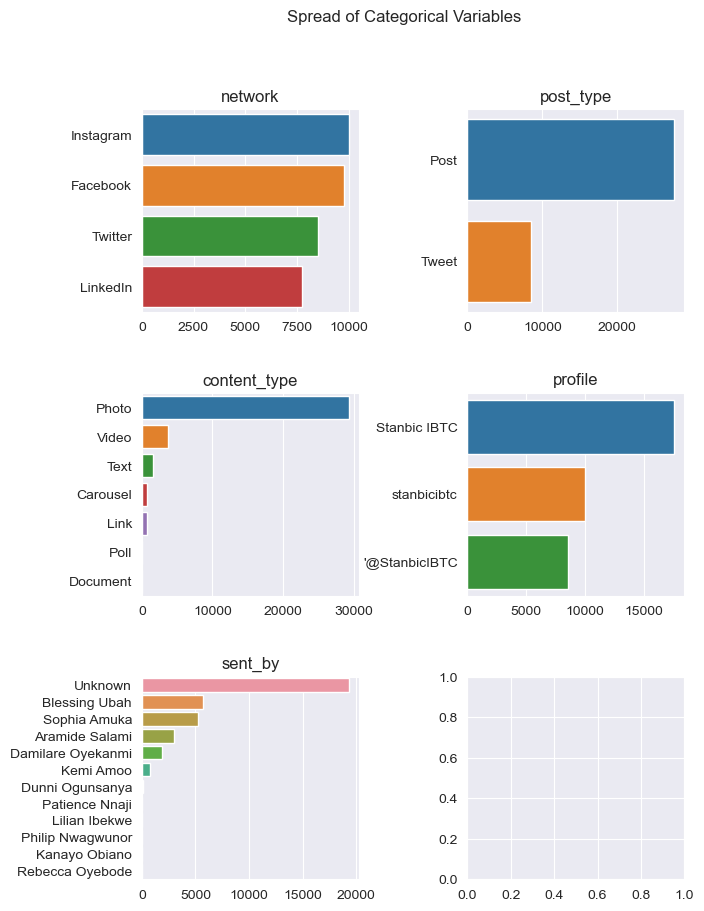

In [47]:
fig, axes = plt.subplots(3, 2, figsize=(7, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.5)
cat_names = ['network', 'post_type', 'content_type', 'profile', 'sent_by']

for ax, col, name in zip(axes.ravel(), cat_cols, cat_names):
    sns.countplot(data=df, y=col, ax=ax, orient='h',
                  order=df[col].value_counts(ascending=False).index)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(name)
    
plt.suptitle('Spread of Categorical Variables')
plt.show()

**Initial Findings on Categorical Variables**
* The social media site with the most posts in our dataset is `Instagram` with about 10,000 records. However, all records have posts in excess of 7500 in the dataframe.
* `post_type` is an irrelevant feature since all included social media networks use `post` as the name of their posts except Twitter which uses `tweet`. We'll drop the feature.
* Photo is significantly the most popular content type.
* `profile` is also an irrelevant feature as it says nothing unique about the record that the `network` feature does not already state. We'll drop it as well. 
* Most posts were sent by an unknown sender. 

Let's drop the irrelevant features:

In [48]:
df = df.drop(columns=['post_type', 'profile'])
cat_cols = [i for i in df.columns if df[i].dtype=='object' and i not in text_cols]

In [49]:
cat_cols

['network', 'content_type', 'sent_by']

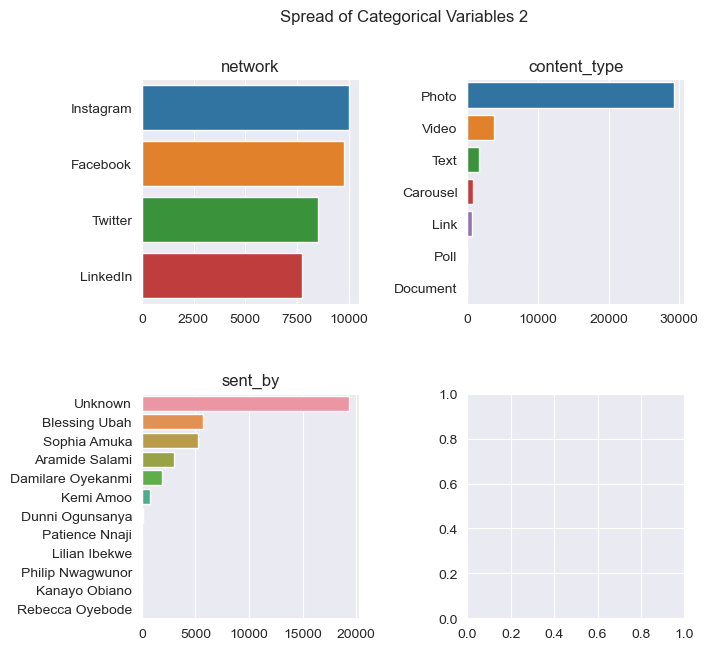

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
fig.subplots_adjust(hspace=0.4, wspace=0.5)
cat_names = ['network', 'content_type', 'sent_by']

for ax, col, name in zip(axes.ravel(), cat_cols, cat_names):
    sns.countplot(data=df, y=col, ax=ax, orient='h',
                  order=df[col].value_counts(ascending=False).index)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(name)

plt.suptitle('Spread of Categorical Variables 2')
plt.show()

Let's dig deeper into the `content_type` and `sent_by` features. Let's exclude the `Photo` and `Unknown` values in the `content_type` and `sent_by` features to see the spread of the smaller values:

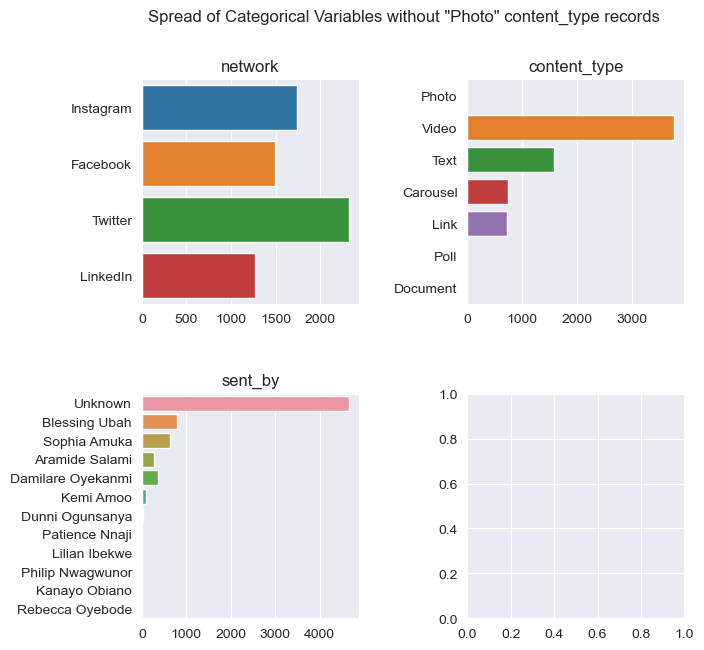

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
fig.subplots_adjust(hspace=0.4, wspace=0.5)
cat_names = ['network', 'content_type', 'sent_by']

for ax, col, name in zip(axes.ravel(), cat_cols, cat_names):
    sns.countplot(data=df.query('content_type != "Photo"'), y=col, ax=ax, orient='h', order=df[col].value_counts(ascending=False).index)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(name)

plt.suptitle('Spread of Categorical Variables without "Photo" content_type records')
plt.show()

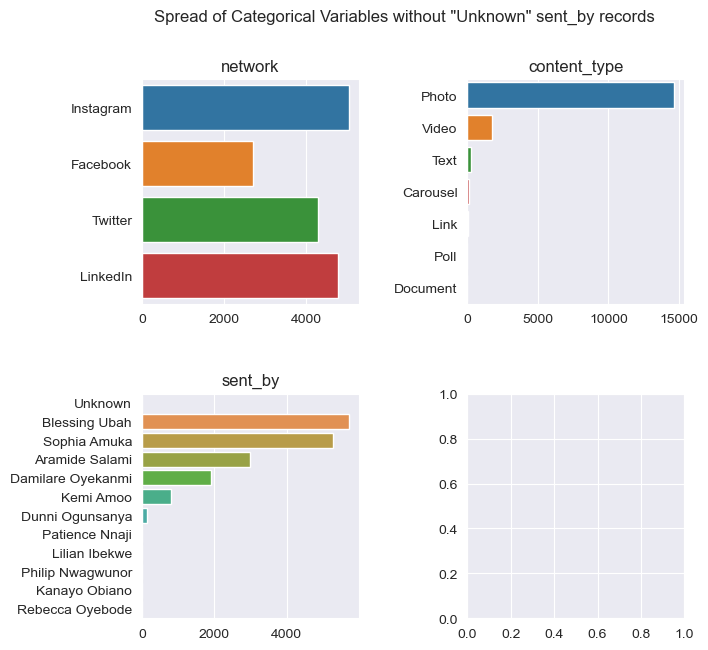

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
fig.subplots_adjust(hspace=0.4, wspace=0.5)
cat_names = ['network', 'content_type', 'sent_by']

for ax, col, name in zip(axes.ravel(), cat_cols, cat_names):
    sns.countplot(data=df.query('sent_by != "Unknown"'), y=col, ax=ax, orient='h', order=df[col].value_counts(ascending=False).index)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(name)

plt.suptitle('Spread of Categorical Variables without "Unknown" sent_by records')
plt.show()

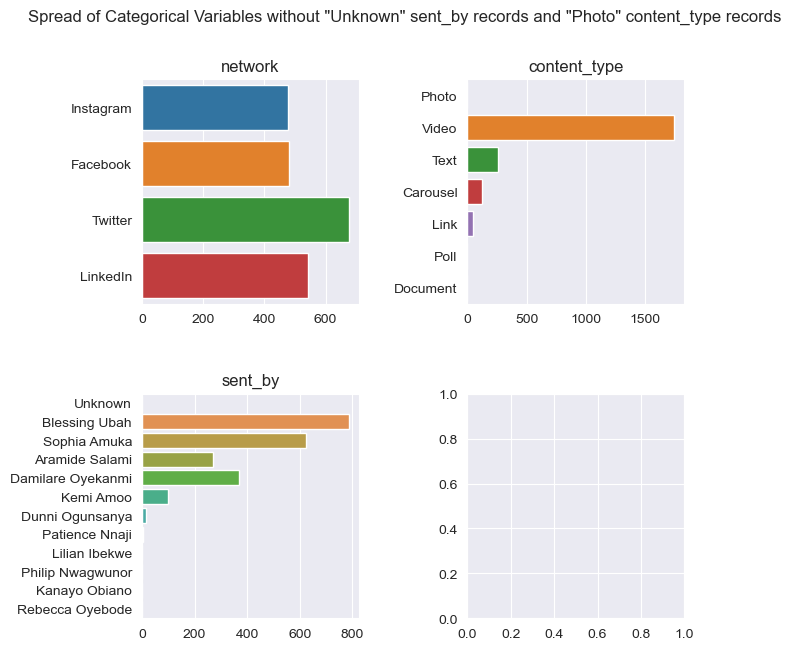

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(7, 7))
fig.subplots_adjust(hspace=0.4, wspace=0.5)
cat_names = ['network', 'content_type', 'sent_by']

for ax, col, name in zip(axes.ravel(), cat_cols, cat_names):
    sns.countplot(data=df.query('sent_by != "Unknown" and content_type != "Photo"'), y=col, ax=ax, orient='h', order=df[col].value_counts(ascending=False).index)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(name)

plt.suptitle('Spread of Categorical Variables without "Unknown" sent_by records and "Photo" content_type records')
plt.show()

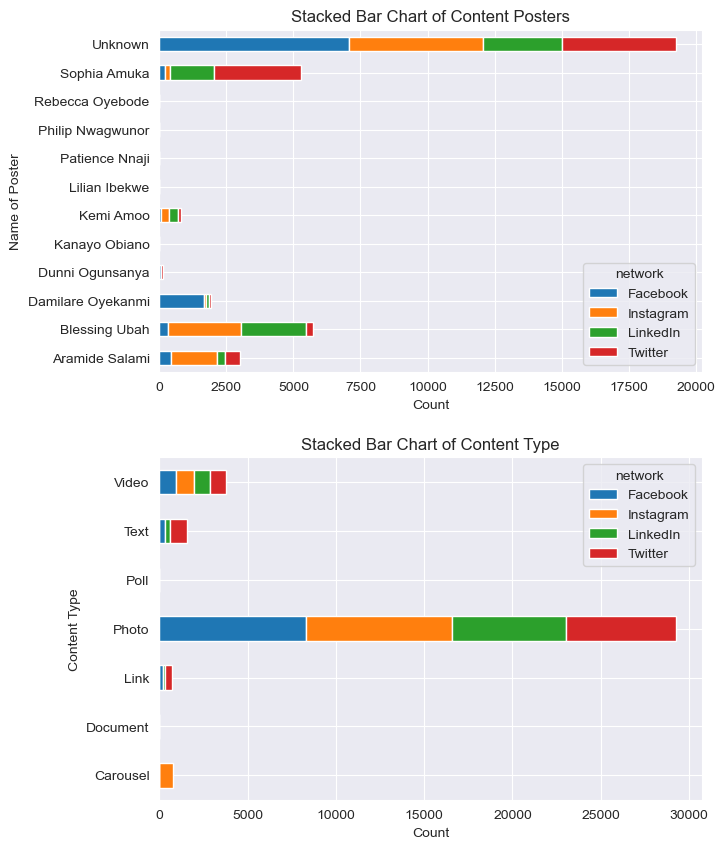

In [54]:
fig, axes = plt.subplots(2, 1, figsize=(7, 10))
fig.subplots_adjust(hspace=0.25)

pd.crosstab(df.sent_by, df.network).plot(kind='barh', stacked=True, ax=axes[0])
axes[0].set_title('Stacked Bar Chart of Content Posters')
axes[0].set_ylabel('Name of Poster')
axes[0].set_xlabel('Count')

pd.crosstab(df.content_type, df.network).plot(kind='barh', stacked=True, ax=axes[1])
axes[1].set_title('Stacked Bar Chart of Content Type')
axes[1].set_ylabel('Content Type')
axes[1].set_xlabel('Count')

plt.show()

When stacked by `network`, some interesting trends arise:
* Blessing Ubah, unlike other posters, makes significantly more posts on LinkedIn than on Twitter
* Twitter features significantly more text posts than LinkedIn, more than for all other content type counts visible on the chart.

<Figure size 1000x1000 with 0 Axes>

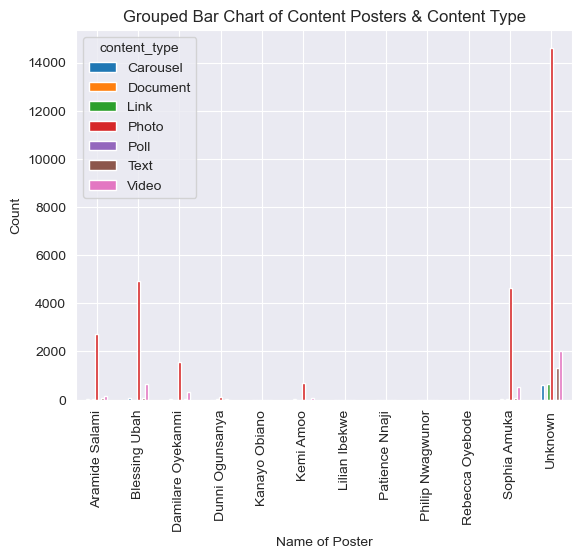

In [55]:
plt.figure(figsize=(10, 10))

pd.crosstab(df.sent_by, df.content_type).plot(kind='bar')
plt.title('Grouped Bar Chart of Content Posters & Content Type')
plt.xlabel('Name of Poster')
plt.ylabel('Count')

plt.show()

**Exploring the Text Features**

#Hashtags:

In [56]:
text_cols

['post', 'linked_content', 'tags', 'hashtags']

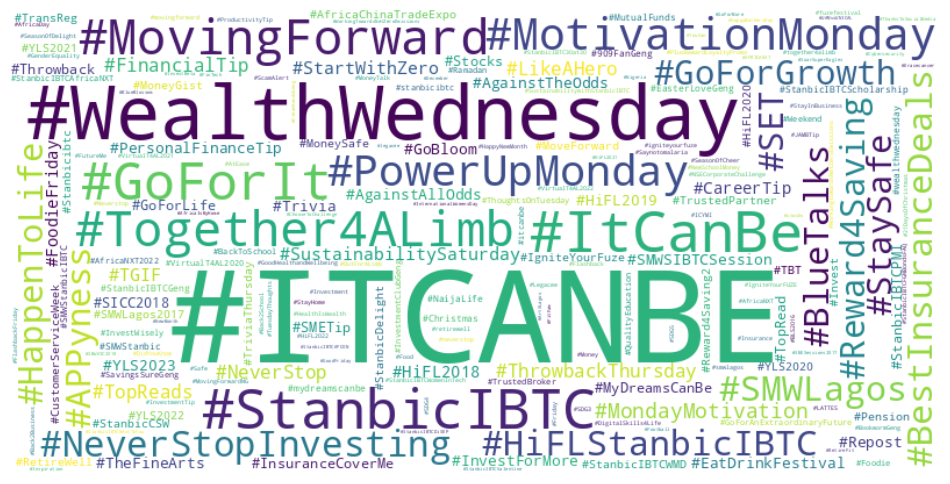

In [101]:
all_words = [word for sublist in df.hashtags for word in sublist]
text = ' '.join(all_words)

from collections import Counter
word_counts = Counter(text.split())

wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_counts)

plt.figure(figsize=(12, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Exploring Numerical Variables**

In [58]:
df[num_cols].describe()

impressions  organic_impressions  viral_impressions  \
count   31583.000000         31583.000000        8893.000000   
mean     3271.442896          3253.646709         623.155066   
std      4699.424878          4634.092605        1650.699781   
min         0.000000             0.000000           0.000000   
25%      1034.500000          1034.500000           5.000000   
50%      2059.000000          2057.000000          88.000000   
75%      3764.000000          3758.000000         544.000000   
max    207378.000000        207378.000000       35816.000000   

       non_viral_impressions  paid_impressions  fan_impressions  \
count            8893.000000            8893.0      8893.000000   
mean             5234.547959               0.0      4919.463398   
std              6341.260127               0.0      5747.002971   
min                 0.000000               0.0         0.000000   
25%              1888.000000               0.0      1678.000000   
50%              3784.000000               0.0      3483.000000   
75%              6564.000000               0.0      6207.000000   
max            207373.000000               0.0    103287.000000   

       fan_organic_impressions  fan_paid_impressions  non_fan_impressions  \
count              8893.000000                8893.0          8893.000000   
mean               4919.463398                   0.0           938.261779   
std                5747.002971                   0.0          3067.161092   
min                   0.000000                   0.0             0.000000   
25%                1678.000000                   0.0           263.000000   
50%                3483.000000                   0.0           466.000000   
75%                6207.000000                   0.0           849.000000   
max              103287.000000                   0.0        206231.000000   

       non_fan_organic_impressions  ...  video_view_time_seconds  \
count                  8893.000000  ...             9.270000e+02   
mean                    875.059597  ...             9.747824e+03   
std                    3002.945270  ...             5.201163e+04   
min                   -1930.000000  ...             0.000000e+00   
25%                     242.000000  ...             1.586225e+03   
50%                     449.000000  ...             2.701760e+03   
75%                     804.000000  ...             4.423590e+03   
max                  206231.000000  ...             1.053676e+06   

       organic_video_view_time_seconds  paid_video_view_time_seconds  \
count                     9.270000e+02                    922.000000   
mean                      9.710307e+03                     37.721323   
std                       5.200932e+04                    752.873811   
min                       0.000000e+00                    -29.300000   
25%                       1.586225e+03                      0.000000   
50%                       2.697830e+03                      0.000000   
75%                       4.419915e+03                      0.000000   
max                       1.053676e+06                  20611.980000   

       unique_video_views  unique_organic_video_views  \
count          927.000000                  927.000000   
mean           225.067961                  224.974110   
std            357.247476                  357.215167   
min              0.000000                    0.000000   
25%            102.000000                  102.500000   
50%            152.000000                  152.000000   
75%            228.000000                  228.000000   
max           6243.000000                 6243.000000   

       unique_paid_video_views  unique_10_second_video_views  \
count               922.000000                    927.000000   
mean                  0.084599                    104.902913   
std                   1.152536                    221.129618   
min                   0.000000                      0.000000   
25%                   0.000000        

In [59]:
num_names = num_cols.copy()

len(num_names)

104

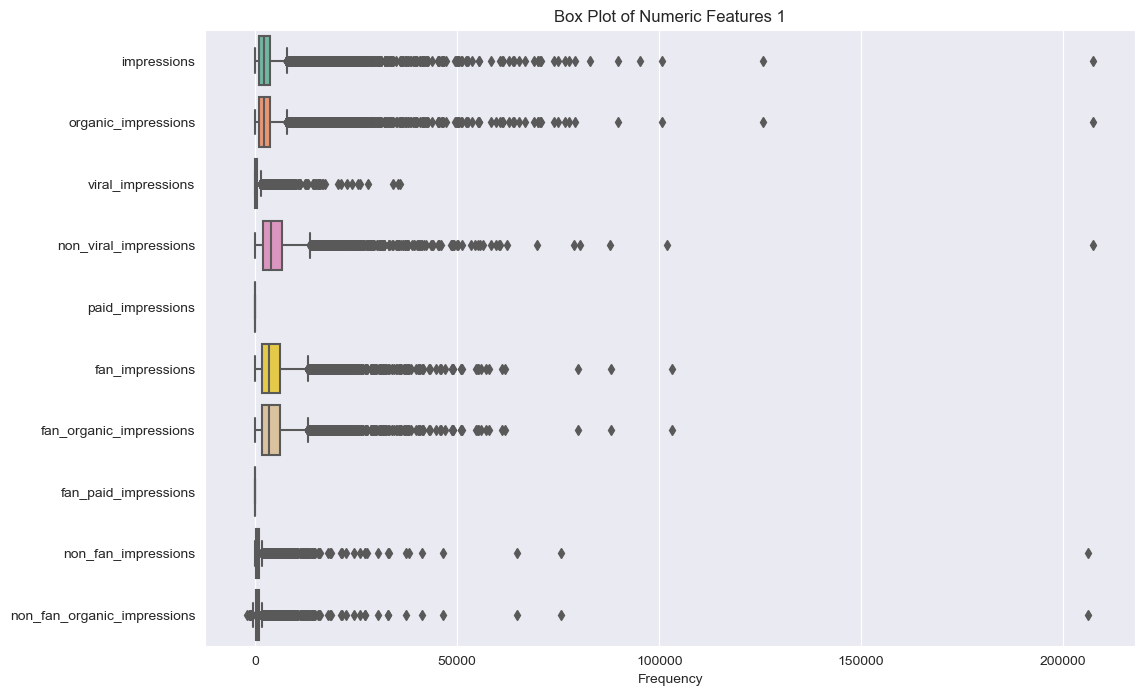

In [60]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_cols[:10]], orient="h", palette="Set2") 
plt.title('Box Plot of Numeric Features 1')
plt.xlabel('Frequency')

plt.show()

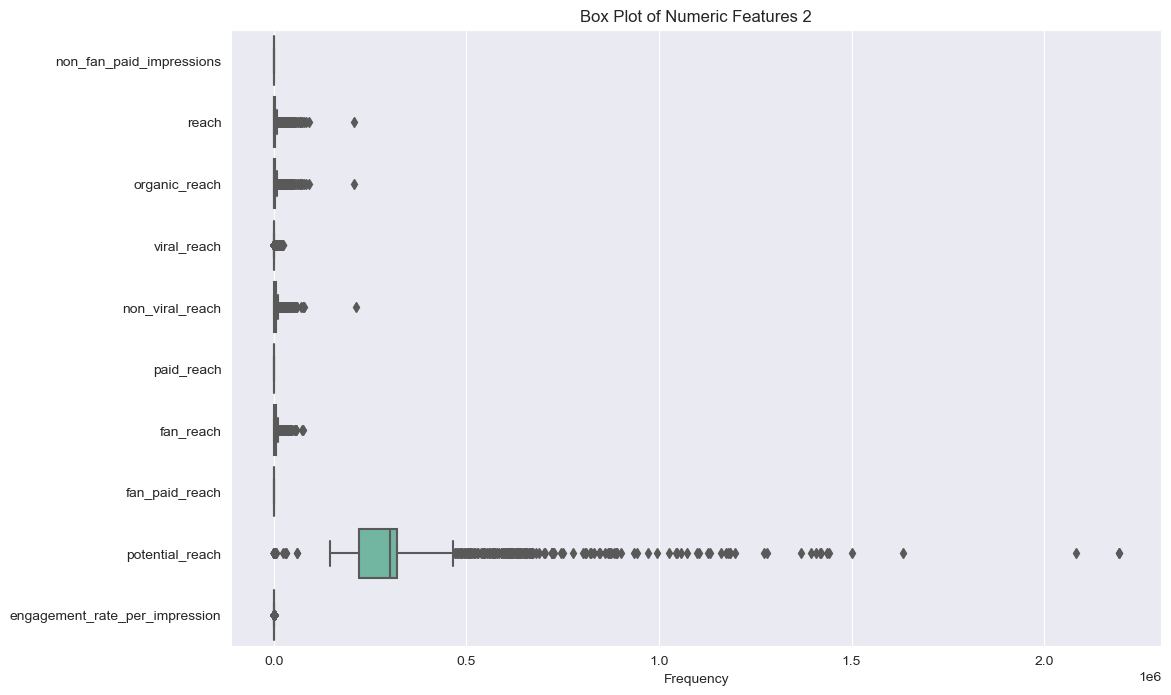

In [61]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_cols[10:20]], orient="h", palette="Set2")
plt.title('Box Plot of Numeric Features 2')
plt.xlabel('Frequency')

plt.show()

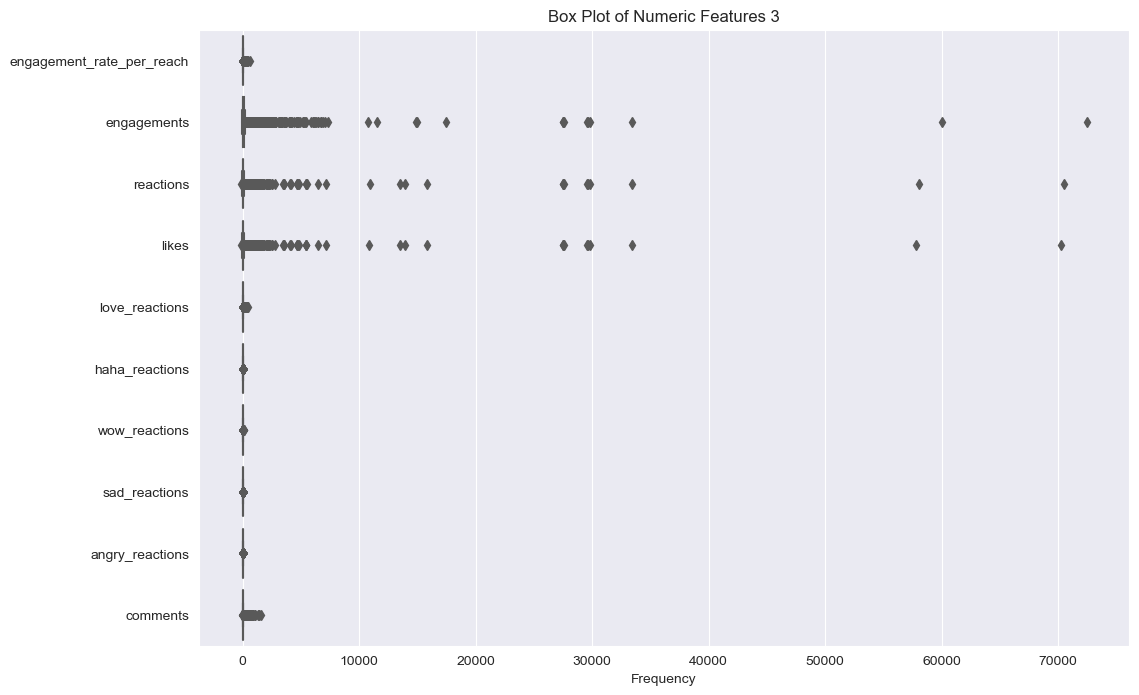

In [62]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_cols[20:30]], orient="h", palette="Set2")
plt.title('Box Plot of Numeric Features 3')
plt.xlabel('Frequency')

plt.show()

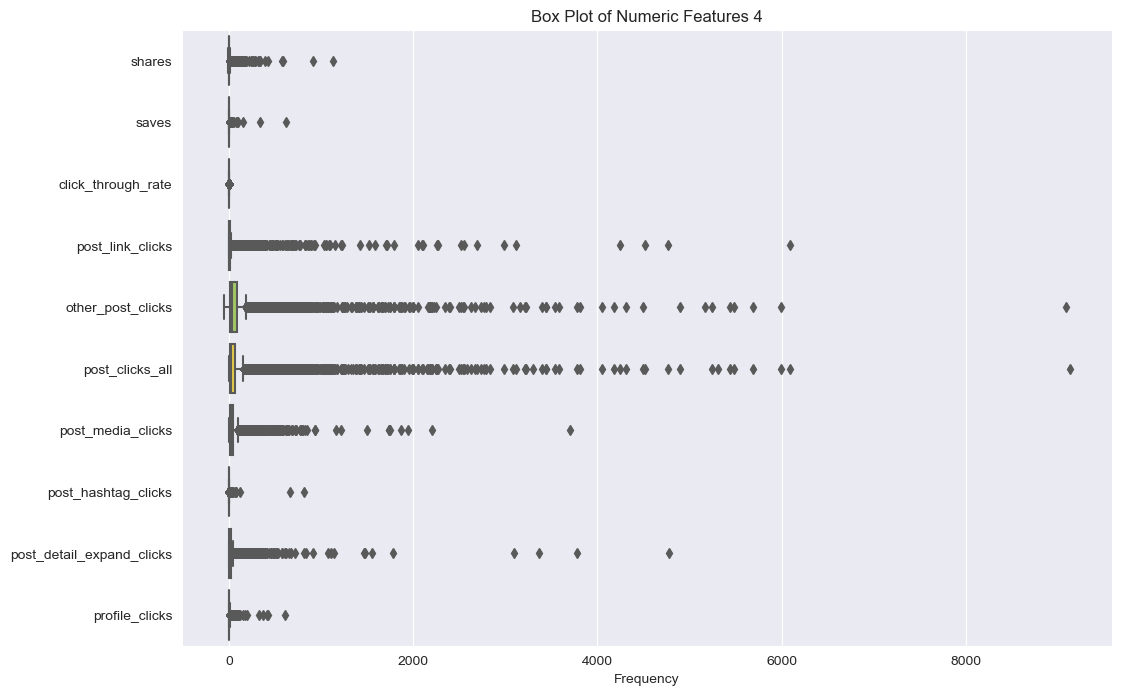

In [63]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_cols[30:40]], orient="h", palette="Set2")
plt.title('Box Plot of Numeric Features 4')
plt.xlabel('Frequency')

plt.show()

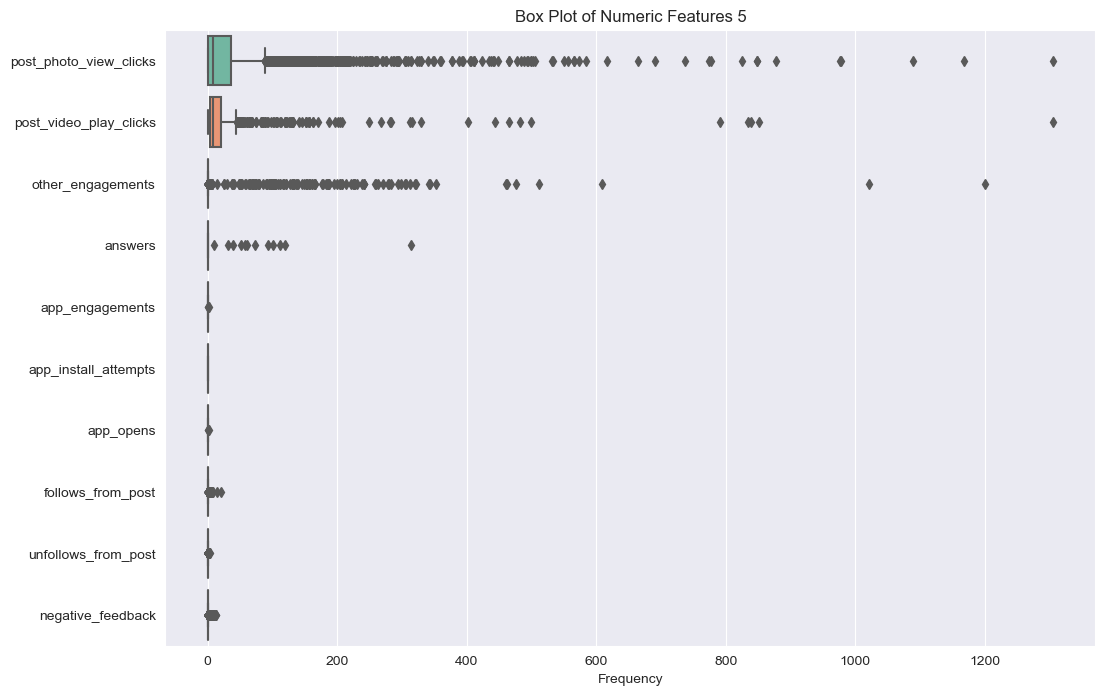

In [64]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_cols[40:50]], orient="h", palette="Set2")
plt.title('Box Plot of Numeric Features 5')
plt.xlabel('Frequency')

plt.show()

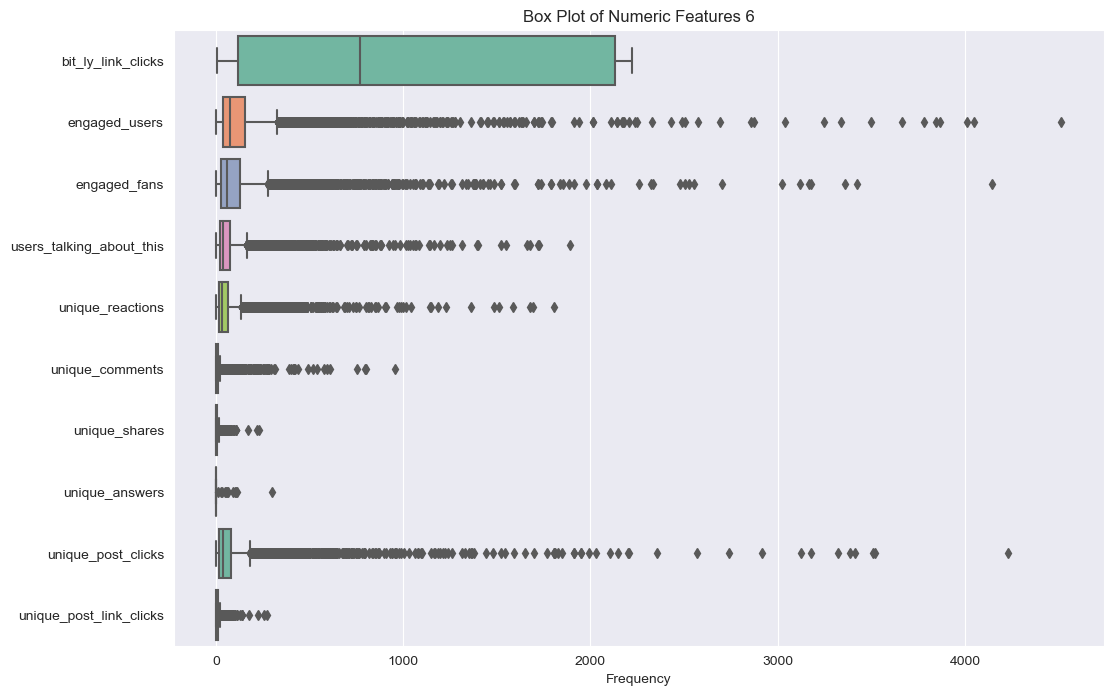

In [65]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_cols[50:60]], orient="h", palette="Set2")
plt.title('Box Plot of Numeric Features 6')
plt.xlabel('Frequency')

plt.show()

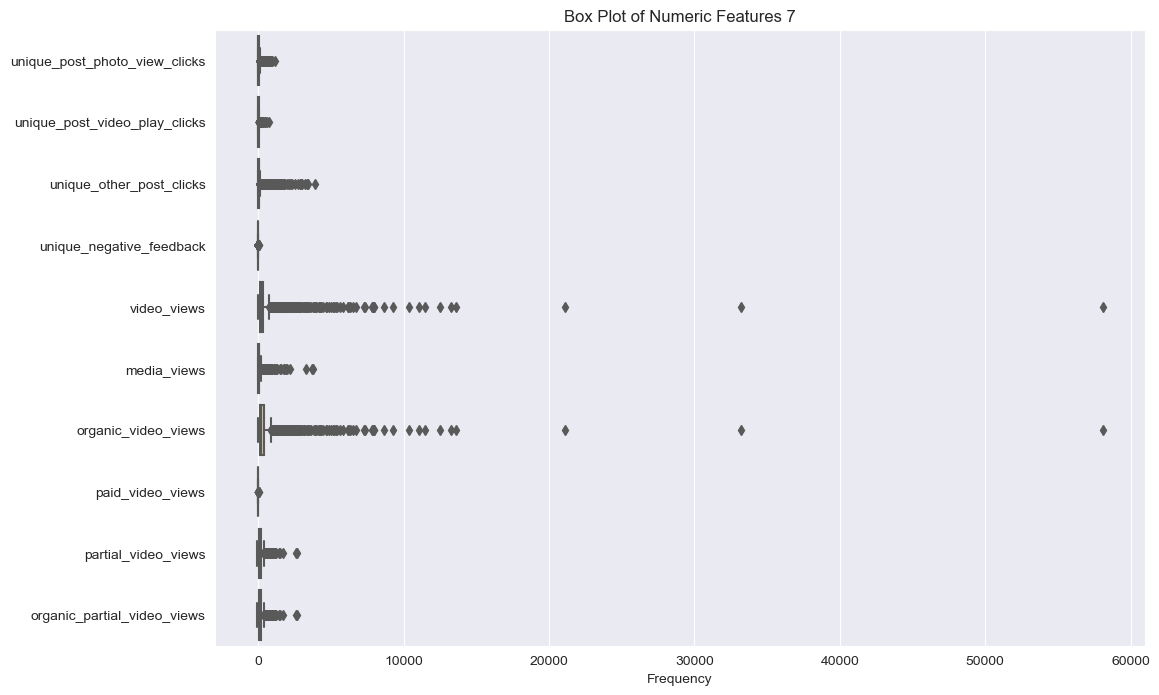

In [66]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_cols[60:70]], orient="h", palette="Set2")
plt.title('Box Plot of Numeric Features 7')
plt.xlabel('Frequency')

plt.show()

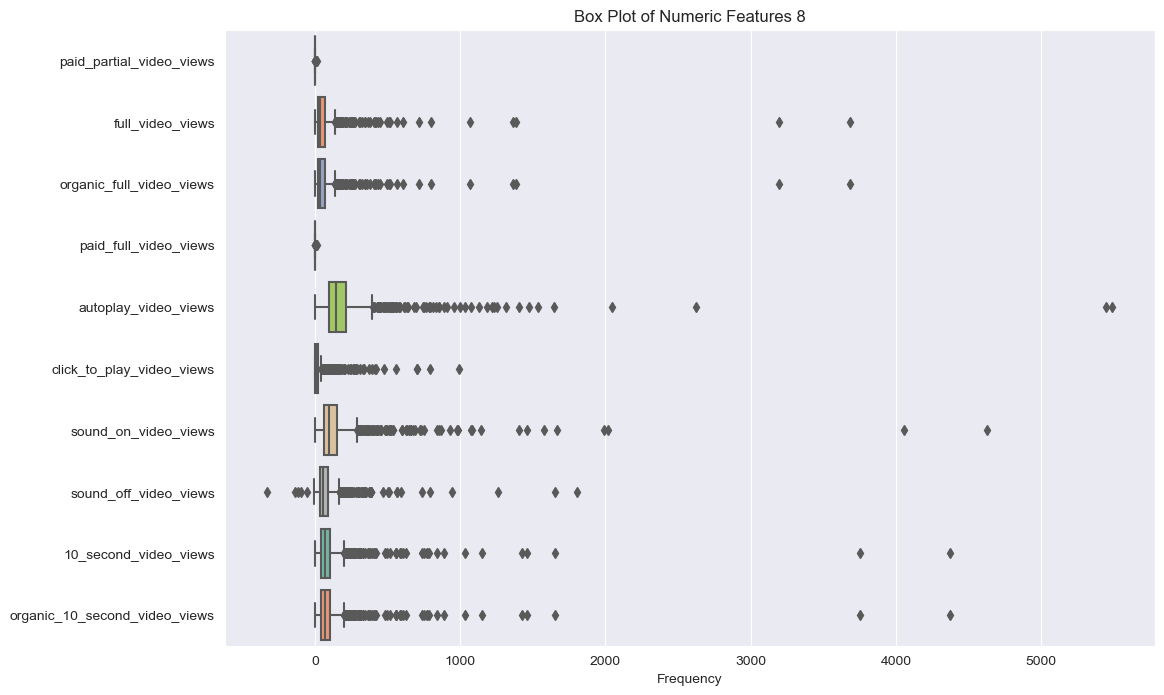

In [67]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_cols[70:80]], orient="h", palette="Set2")
plt.title('Box Plot of Numeric Features 8')
plt.xlabel('Frequency')

plt.show()

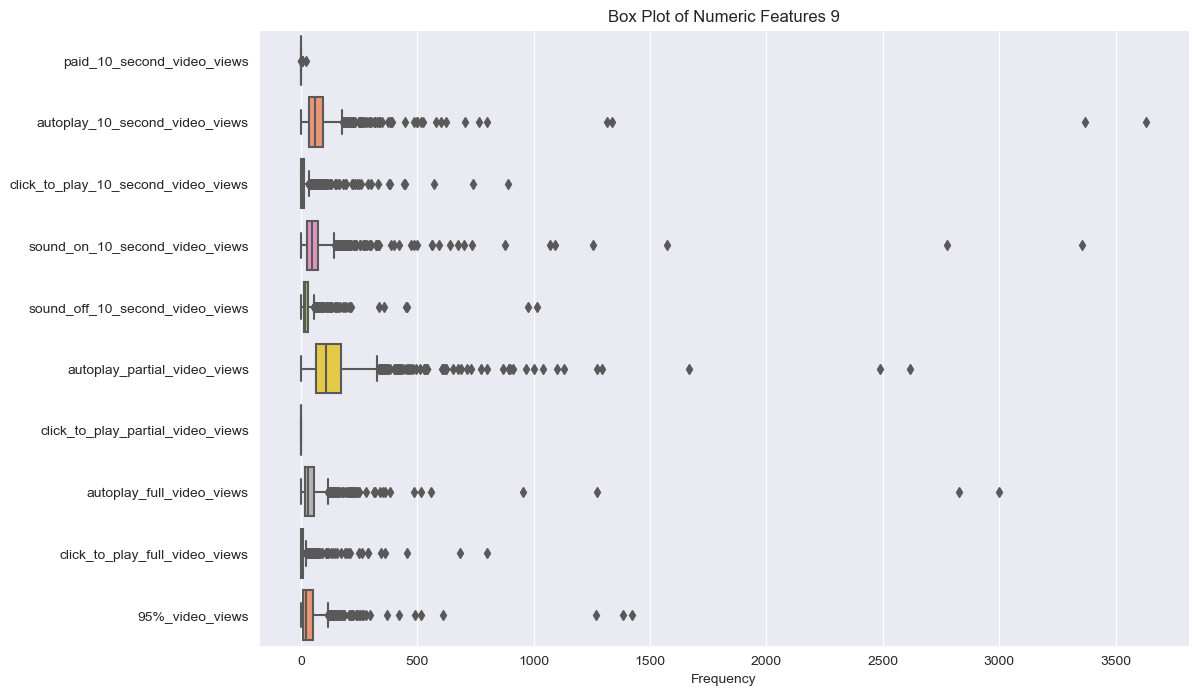

In [68]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[num_cols[80:90]], orient="h", palette="Set2")
plt.title('Box Plot of Numeric Features 9')
plt.xlabel('Frequency')

plt.show()

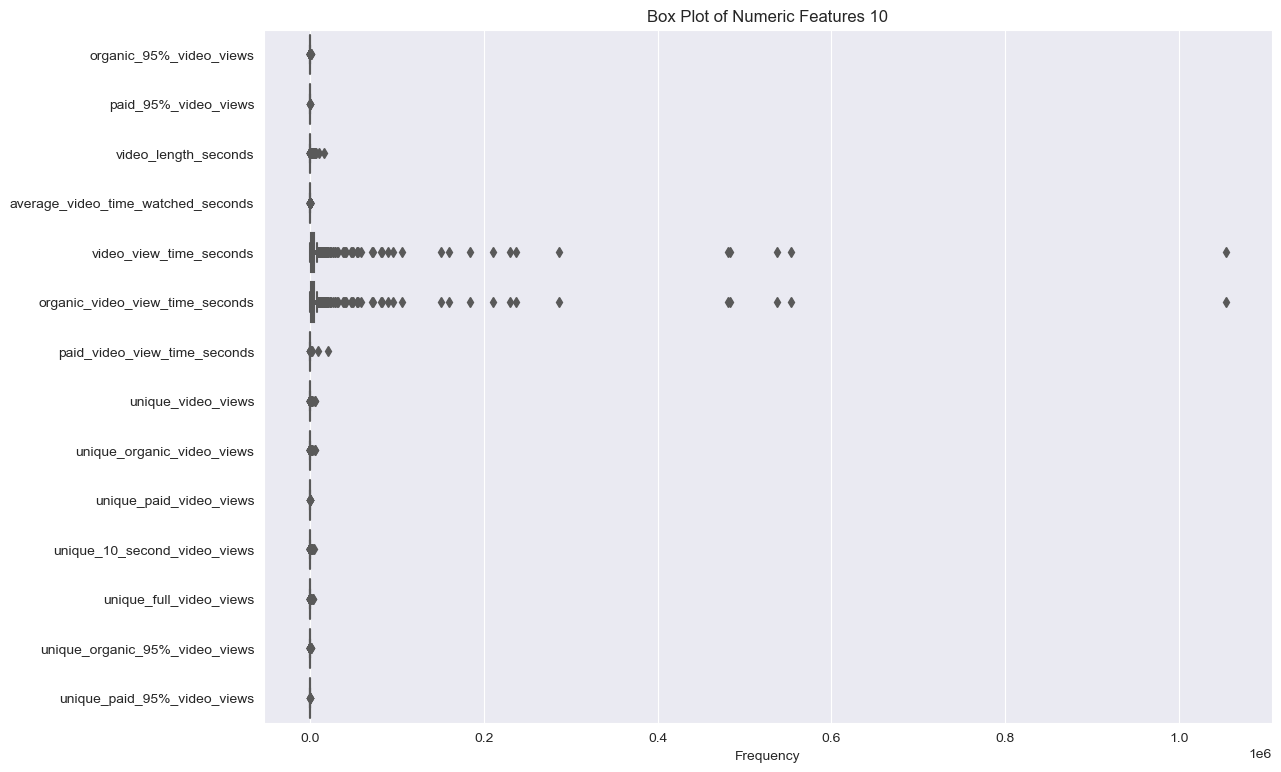

In [69]:
plt.figure(figsize=(13, 9))
sns.boxplot(data=df[num_cols[90:]], orient="h", palette="Set2")
plt.title('Box Plot of Numeric Features 10')
plt.xlabel('Frequency')

plt.show()

The numeric features with the biggest spreads are:
* impressions
* organic_impressions
* other_post_clicks
* post_clicks_all

The following features seem to have no values beyond 0. We'll review them to confirm and delete where necessary:
* paid_impressions
* fan_paid_impressions
* non_fan_paid_impressions
* paid_reach
* fan_paid_reach
* app_install_attempts
* click_to_play_partial_video_views

Other features to consider for very small spreads:
* viral_reach
* engagement_rate_per_impression
* engagement_rate_per_reach
* love_reactions
* haha_reactions
* wow_reactions
* sad_reactions
* angry_reactions
* click_through_rate
* app_engagements
* app_opens
* unfollows_from_post
* unique_negative_feedback
* paid_video_views
* paid_partial_video_views
* paid_full_video_views
* paid_10_second_video_views
* organic_95%_video_views
* paid_95%_video_views
* average_video_time_watched_seconds
* unique_video_views
* unique_organic_video_views
* unique_paid_video_views
* unique_10_second_video_views
* unique_full_video_views
* unique_organic_95%_video_views
* unique_paid_95%_video_views

In [70]:
cols_rev = ['paid_impressions', 'fan_paid_impressions', 'non_fan_paid_impressions', 'paid_reach', 'fan_paid_reach', 'app_install_attempts', 'click_to_play_partial_video_views']

We'll be dropping the features in cols_rev because they only contain a single value: `0`.

In [71]:
df[cols_rev].describe()

paid_impressions  fan_paid_impressions  non_fan_paid_impressions  \
count            8893.0                8893.0                    8893.0   
mean                0.0                   0.0                       0.0   
std                 0.0                   0.0                       0.0   
min                 0.0                   0.0                       0.0   
25%                 0.0                   0.0                       0.0   
50%                 0.0                   0.0                       0.0   
75%                 0.0                   0.0                       0.0   
max                 0.0                   0.0                       0.0   

       paid_reach  fan_paid_reach  app_install_attempts  \
count      8893.0          8893.0                7842.0   
mean          0.0             0.0                   0.0   
std           0.0             0.0                   0.0   
min           0.0             0.0                   0.0   
25%           0.0             0.0                   0.0   
50%           0.0             0.0                   0.0   
75%           0.0             0.0                   0.0   
max           0.0             0.0                   0.0   

       click_to_play_partial_video_views  
count                              922.0  
mean                                 0.0  
std                                  0.0  
min                                  0.0  
25%                                  0.0  
50%                                  0.0  
75%                                  0.0  
max                                  0.0

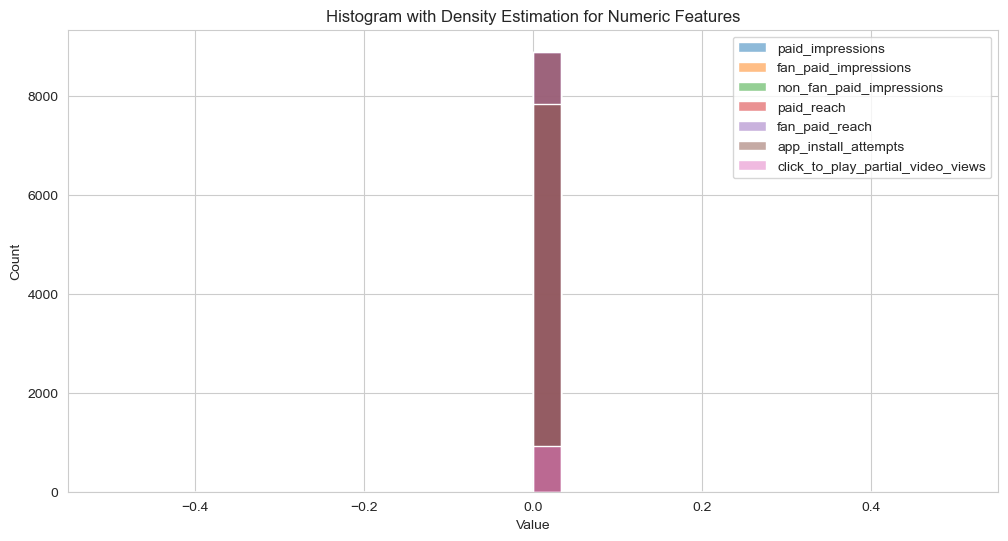

In [72]:
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))  
for column in cols_rev:  
    sns.histplot(df[column], kde=True, label=column, bins=30)
plt.title('Histogram with Density Estimation for Numeric Features')
plt.xlabel('Value')
plt.legend()
plt.show()

In [73]:
df = df.drop(columns=cols_rev)

In [74]:
cols_rev2 = ['viral_reach', 'engagement_rate_per_impression', 'engagement_rate_per_reach', 'love_reactions', 'haha_reactions', 'wow_reactions', 'sad_reactions',  'angry_reactions', 'click_through_rate', 'app_engagements', 'app_opens', 'unfollows_from_post', 'unique_negative_feedback', 'paid_video_views', 'paid_partial_video_views', 'paid_full_video_views', 'paid_10_second_video_views', 'organic_95%_video_views', 'paid_95%_video_views', 'average_video_time_watched_seconds', 'unique_video_views', 'unique_organic_video_views', 'unique_paid_video_views', 'unique_10_second_video_views', 'unique_full_video_views', 'unique_organic_95%_video_views', 'unique_paid_95%_video_views']

In [75]:
df[cols_rev2].describe()

viral_reach  engagement_rate_per_impression  \
count   8893.000000                    30149.000000   
mean     455.310019                        0.143075   
std     1129.762366                        2.329000   
min        0.000000                       -0.012000   
25%        4.000000                        0.019400   
50%       83.000000                        0.026800   
75%      449.000000                        0.037200   
max    24829.000000                      142.000000   

       engagement_rate_per_reach  love_reactions  haha_reactions  \
count               14994.000000     8893.000000     8893.000000   
mean                    7.002959        2.305746        0.158102   
std                    26.606533       16.024033        1.603587   
min                     0.000000        0.000000        0.000000   
25%                     0.022300        0.000000        0.000000   
50%                     0.030600        0.000000        0.000000   
75%                     0.046500        2.000000        0.000000   
max                   656.000000      471.000000       70.000000   

       wow_reactions  sad_reactions  angry_reactions  click_through_rate  \
count    8893.000000    8893.000000      8893.000000        18838.000000   
mean        0.129203       0.033959         0.151467            0.006748   
std         2.320830       0.226888         0.669274            0.049362   
min         0.000000       0.000000         0.000000            0.000000   
25%         0.000000       0.000000         0.000000            0.000000   
50%         0.000000       0.000000         0.000000            0.000600   
75%         0.000000       0.000000         0.000000            0.007100   
max       163.000000       6.000000        21.000000            5.000000   

       app_engagements  ...  organic_95%_video_views  paid_95%_video_views  \
count      7842.000000  ...               927.000000            922.000000   
mean          0.000510  ...                45.865156              0.026030   
std           0.027658  ...                93.656339              0.405413   
min           0.000000  ...                 0.000000              0.000000   
25%           0.000000  ...                10.000000              0.000000   
50%           0.000000  ...                23.000000              0.000000   
75%           0.000000  ...                53.000000              0.000000   
max           2.000000  ...              1421.000000             11.000000   

       average_video_time_watched_seconds  unique_video_views  \
count                          922.000000          927.000000   
mean                             7.761443          225.067961   
std                             18.857431          357.247476   
min                              0.000000            0.000000   
25%                              3.497500          102.000000   
50%                              4.745000          152.000000   
75%                              6.812500          228.000000   
max                            327.530000         6243.000000   

       unique_organic_video_views  unique_paid_video_views  \
count                  927.000000               922.000000   
mean                   224.974110                 0.084599   
std                    357.215167                 1.152536   
min                      0.000000                 0.000000   
25%                    102.500000                 0.000000   
50%                    152.000000                 0.000000   
75%                    228.000000                 0.000000   
max                   6243.000000                29.000000   

       unique_10_second_video_views  unique_full_video_views  \
count                    927.000000               927.000000   
mean                     104.902913                66.757282   
std                      221.129618               181.603978   
min                        0.000000                 0.000000   
25%                       40.500000           

In [76]:
for col in cols_rev2:
    print(df[col].value_counts())
    print('*'*30)

0.0        1698
1.0         182
2.0         127
3.0         126
4.0         105
           ... 
575.0         1
645.0         1
726.0         1
10873.0       1
1202.0        1
Name: viral_reach, Length: 1458, dtype: int64
******************************
0.0230    130
0.0216    130
0.0210    123
0.0268    122
0.0192    121
         ... 
0.2748      1
0.0907      1
0.1600      1
0.1922      1
0.1220      1
Name: engagement_rate_per_impression, Length: 1571, dtype: int64
******************************
0.0269      74
0.0251      65
0.0212      65
0.0230      59
0.0193      59
            ..
133.3300     1
16.1400      1
0.1446       1
26.6700      1
0.0792       1
Name: engagement_rate_per_reach, Length: 1586, dtype: int64
******************************
0.0      4476
1.0      2106
2.0      1112
3.0       463
4.0       208
         ... 
124.0       1
328.0       1
203.0       1
260.0       1
100.0       1
Name: love_reactions, Length: 86, dtype: int64
******************************
0.0     8

From cols_rev2, the following features will be removed because they have too few non-zero values: ['click_through_rate', 'app_engagements', 'paid_video_views', 'paid_partial_video_views', 'paid_full_video_views', 'paid_95%_video_views', 'unique_paid_video_views', 'unique_paid_95%_video_views']

In [77]:
cols_rev2 = ['click_through_rate', 'app_engagements', 'paid_video_views', 'paid_partial_video_views', 'paid_full_video_views', 'paid_95%_video_views', 'unique_paid_video_views', 'unique_paid_95%_video_views']
df = df.drop(columns=cols_rev2)

In [78]:
num_cols = [i for i in df.columns if df[i].dtype=='float64']
text_cols = ['post', 'linked_content', 'tags', 'hashtags']
cat_cols = [i for i in df.columns if df[i].dtype=='object' and i not in text_cols]

In [79]:
df[num_cols].describe()

impressions  organic_impressions  viral_impressions  \
count   31583.000000         31583.000000        8893.000000   
mean     3271.442896          3253.646709         623.155066   
std      4699.424878          4634.092605        1650.699781   
min         0.000000             0.000000           0.000000   
25%      1034.500000          1034.500000           5.000000   
50%      2059.000000          2057.000000          88.000000   
75%      3764.000000          3758.000000         544.000000   
max    207378.000000        207378.000000       35816.000000   

       non_viral_impressions  fan_impressions  fan_organic_impressions  \
count            8893.000000      8893.000000              8893.000000   
mean             5234.547959      4919.463398              4919.463398   
std              6341.260127      5747.002971              5747.002971   
min                 0.000000         0.000000                 0.000000   
25%              1888.000000      1678.000000              1678.000000   
50%              3784.000000      3483.000000              3483.000000   
75%              6564.000000      6207.000000              6207.000000   
max            207373.000000    103287.000000            103287.000000   

       non_fan_impressions  non_fan_organic_impressions          reach  \
count          8893.000000                  8893.000000   17409.000000   
mean            938.261779                   875.059597    3397.021081   
std            3067.161092                  3002.945270    5041.931326   
min               0.000000                 -1930.000000       0.000000   
25%             263.000000                   242.000000     656.000000   
50%             466.000000                   449.000000    2161.000000   
75%             849.000000                   804.000000    4196.000000   
max          206231.000000                206231.000000  207378.000000   

       organic_reach  ...  video_length_seconds  \
count   17409.000000  ...            922.000000   
mean     3379.959044  ...            186.416095   
std      5011.693645  ...            895.200838   
min         0.000000  ...              0.000000   
25%       654.000000  ...             10.150000   
50%      2157.000000  ...             32.020000   
75%      4173.000000  ...             60.090000   
max    207378.000000  ...          16045.440000   

       average_video_time_watched_seconds  video_view_time_seconds  \
count                          922.000000             9.270000e+02   
mean                             7.761443             9.747824e+03   
std                             18.857431             5.201163e+04   
min                              0.000000             0.000000e+00   
25%                              3.497500             1.586225e+03   
50%                              4.745000             2.701760e+03   
75%                              6.812500             4.423590e+03   
max                            327.530000             1.053676e+06   

       organic_video_view_time_seconds  paid_video_view_time_seconds  \
count                     9.270000e+02                    922.000000   
mean                      9.710307e+03                     37.721323   
std                       5.200932e+04                    752.873811   
min                       0.000000e+00                    -29.300000   
25%                       1.586225e+03                      0.000000   
50%                       2.697830e+03                      0.000000   
75%                       4.419915e+03                      0.000000   
max                       1.053676e+06                  20611.980000   

       unique_video_views  unique_organic_video_views  \
count          927.000000                  927.000000   
mean           225.067961                  224.974110   
std            357.247476                  357.215167   
min              0.000000                    0.000000   
25%            102.000000                  102.500000   
50%            1

The numeric columns have the following trends:
*  All features are right-skewed with most values clustered around 0. This is a function of the high number of missing values across the numeric features that were filled with 0. This means that for most posts, no metrics are recorded. 
* However, significant outliers exist. It is important to see the corresponding features for those outlier records.

Let's drill down into some variables:

**Impressions**

There are over 5000 records with outlier impressions in excess of 5000, representing over 14% of the dataset, while there are nearly 6000 records with 0 impressions, representing over 16% of the dataset.

In [80]:
print(f'LinkedIn Earliest Post Date: {df.loc[df.network == "LinkedIn"].index.min()}')

print(f'Facebook Earliest Post Date: {df.loc[df.network == "Facebook"].index.min()}')

print(f'Twitter Earliest Post Date: {df.loc[df.network == "Twitter"].index.min()}')

print(f'Instagram Earliest Post Date: {df.loc[df.network == "Instagram"].index.min()}')

LinkedIn Earliest Post Date: 2014-05-05 10:57:00
Facebook Earliest Post Date: 2013-01-15 16:25:00
Twitter Earliest Post Date: 2013-02-17 09:01:00
Instagram Earliest Post Date: 2014-12-22 17:59:00


In [81]:
excess_5k = df.loc[df['impressions'] > 5000, 'impressions'].shape[0]
zero_vals = df.loc[df['impressions'] == 0, 'impressions'].shape[0]
len_df = df.shape[0]

print(f'There are {excess_5k} records with outlier impressions in excess of 5000, representing over {(excess_5k/len_df)*100:.2f}% of the dataset, while there are {zero_vals} records with 0 impressions, representing over {(zero_vals/len_df)*100:.2f}% of the dataset.')

There are 5211 records with outlier impressions in excess of 5000, representing over 14.44% of the dataset, while there are 1470 records with 0 impressions, representing over 4.07% of the dataset.


Let's view the spread of the dataset for impressions outside these outliers, i.e., 70% of the dataset:

For non-outlier values, the dataset remains right-skewed, with a mode of 1000 impressions. The mode, however, represents 0.04% of the values in this dataframe without outliers. 

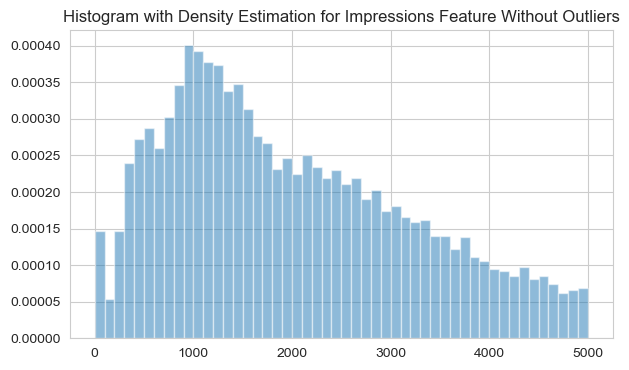

In [82]:
sns.set_style("whitegrid")

plt.figure(figsize=(7, 4))
no_outliers = df.loc[df.impressions.between(0, 5000, inclusive='neither'), 'impressions']
plt.hist(no_outliers, density=True, bins=50, alpha=0.5)
plt.title('Histogram with Density Estimation for Impressions Feature Without Outliers')
plt.show()

How does impression trend over time?

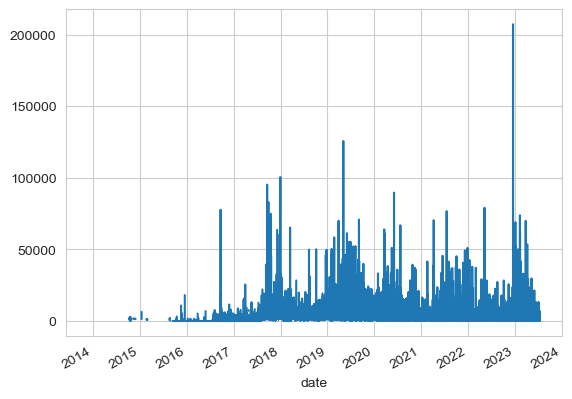

In [83]:
sns.set_style("whitegrid")
df.impressions.plot(kind='line')
plt.show()

Monthly average impressions over time:

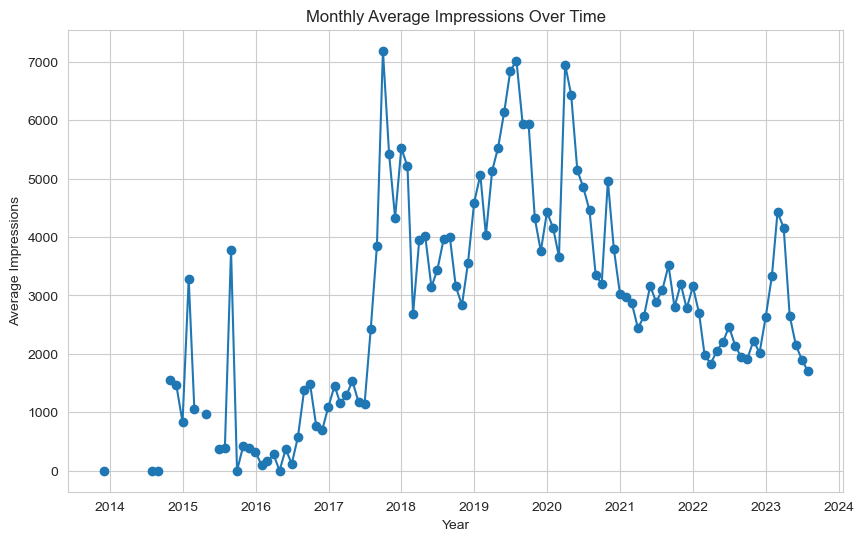

In [84]:
sns.set_style("whitegrid")
monthly_mean = df.impressions.resample('M').mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_mean.index, monthly_mean, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Impressions')
plt.title('Monthly Average Impressions Over Time')
plt.show()

Average Impressions Grouped by Month

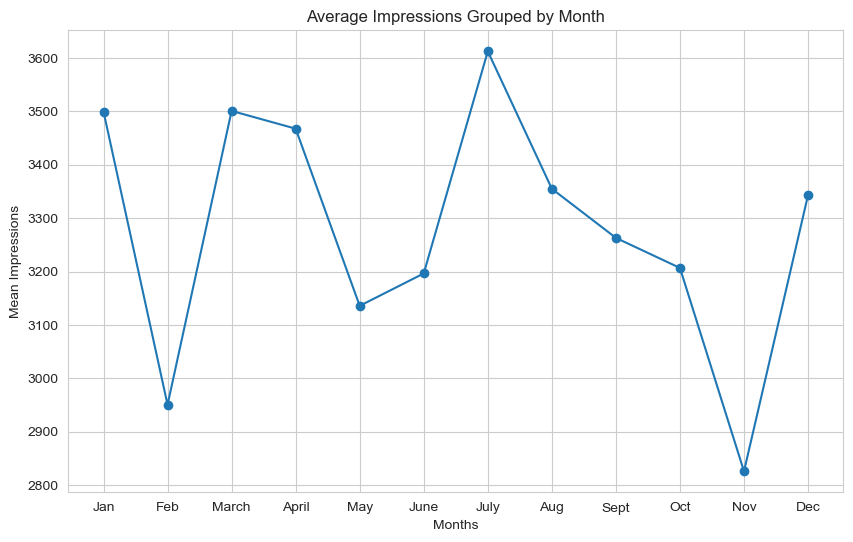

In [85]:
sns.set_style("whitegrid")
monthly_mean = df.impressions.groupby(df.index.month).mean()

month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April', 
    5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 
    9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
monthly_mean.index = monthly_mean.index.map(month_mapping)

plt.figure(figsize=(10, 6))
plt.plot(monthly_mean.index, monthly_mean, marker='o', linestyle='-')
plt.xlabel('Months')
plt.ylabel('Mean Impressions')
plt.title('Average Impressions Grouped by Month')
plt.show()

Average Impressions grouped by Network

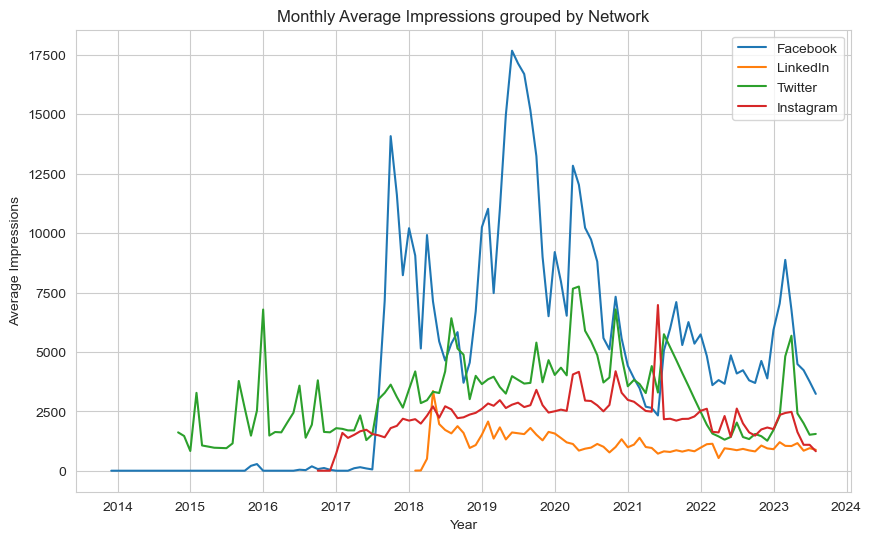

In [86]:
fb_monthly_mean = df.loc[df.network=='Facebook', 'impressions'].resample('M').mean().interpolate()
li_monthly_mean = df.loc[df.network=='LinkedIn', 'impressions'].resample('M').mean().interpolate()
tw_monthly_mean = df.loc[df.network=='Twitter', 'impressions'].resample('M').mean().interpolate()
ig_monthly_mean = df.loc[df.network=='Instagram', 'impressions'].resample('M').mean().interpolate()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(fb_monthly_mean.index, fb_monthly_mean, linestyle='-', label='Facebook')
plt.plot(li_monthly_mean.index, li_monthly_mean, linestyle='-', label='LinkedIn')
plt.plot(tw_monthly_mean.index, tw_monthly_mean, linestyle='-', label='Twitter')
plt.plot(ig_monthly_mean.index, ig_monthly_mean, linestyle='-', label='Instagram')

plt.xlabel('Year')
plt.ylabel('Average Impressions')
plt.title('Monthly Average Impressions grouped by Network')
plt.legend()
plt.show()

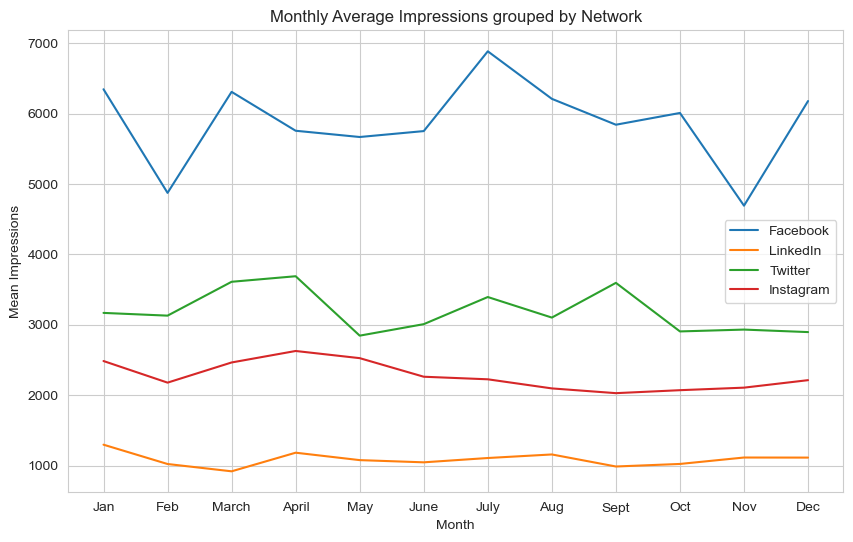

In [87]:
fb_monthly_mean = df.loc[df.network=='Facebook', 'impressions'].groupby(df.loc[df.network=='Facebook', 'impressions'].index.month).mean().interpolate()

li_monthly_mean = df.loc[df.network=='LinkedIn', 'impressions'].groupby(df.loc[df.network=='LinkedIn', 'impressions'].index.month).mean().interpolate()

tw_monthly_mean = df.loc[df.network=='Twitter', 'impressions'].groupby(df.loc[df.network=='Twitter', 'impressions'].index.month).mean().interpolate()

ig_monthly_mean = df.loc[df.network=='Instagram', 'impressions'].groupby(df.loc[df.network=='Instagram', 'impressions'].index.month).mean().interpolate()

fb_monthly_mean.index = fb_monthly_mean.index.map(month_mapping)
li_monthly_mean.index = li_monthly_mean.index.map(month_mapping)
tw_monthly_mean.index = tw_monthly_mean.index.map(month_mapping)
ig_monthly_mean.index = ig_monthly_mean.index.map(month_mapping)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(fb_monthly_mean.index, fb_monthly_mean, linestyle='-', label='Facebook')
plt.plot(li_monthly_mean.index, li_monthly_mean, linestyle='-', label='LinkedIn')
plt.plot(tw_monthly_mean.index, tw_monthly_mean, linestyle='-', label='Twitter')
plt.plot(ig_monthly_mean.index, ig_monthly_mean, linestyle='-', label='Instagram')

plt.xlabel('Month')
plt.ylabel('Mean Impressions')
plt.title('Monthly Average Impressions grouped by Network')
plt.legend()
plt.show()

Impressions Trends for records with tags:

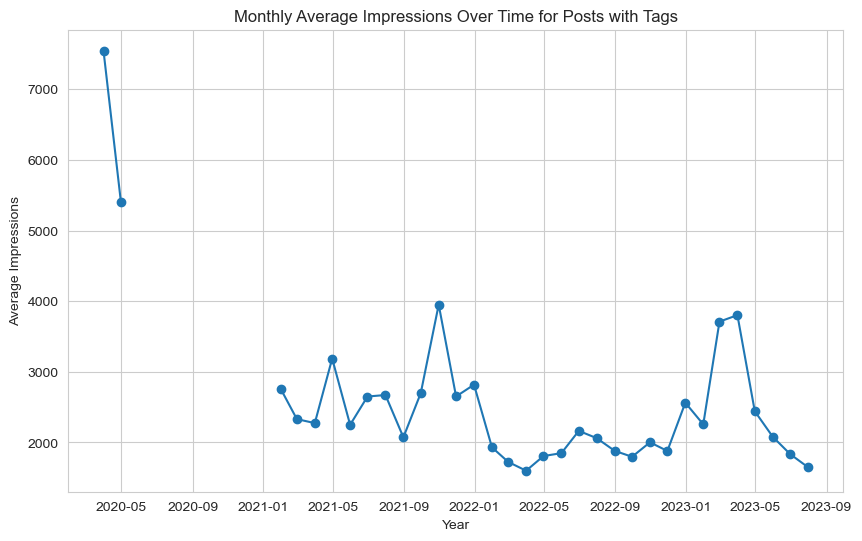

In [88]:
tag_df = df.loc[df.tags != 'no tags']
monthly_mean = tag_df.impressions.resample('M').mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_mean.index, monthly_mean, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Impressions')
plt.title('Monthly Average Impressions Over Time for Posts with Tags')
plt.show()

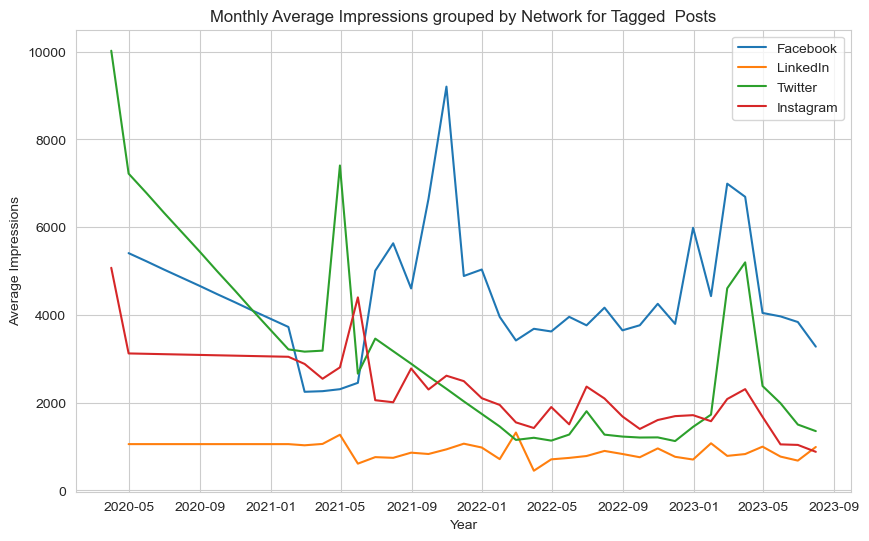

In [89]:
tag_df = df.loc[df.tags != 'no tags']

fb_monthly_mean = tag_df.loc[tag_df.network=='Facebook', 'impressions'].resample('M').mean().interpolate()
li_monthly_mean = tag_df.loc[tag_df.network=='LinkedIn', 'impressions'].resample('M').mean().interpolate()
tw_monthly_mean = tag_df.loc[tag_df.network=='Twitter', 'impressions'].resample('M').mean().interpolate()
ig_monthly_mean = tag_df.loc[tag_df.network=='Instagram', 'impressions'].resample('M').mean().interpolate()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(fb_monthly_mean.index, fb_monthly_mean, linestyle='-', label='Facebook')
plt.plot(li_monthly_mean.index, li_monthly_mean, linestyle='-', label='LinkedIn')
plt.plot(tw_monthly_mean.index, tw_monthly_mean, linestyle='-', label='Twitter')
plt.plot(ig_monthly_mean.index, ig_monthly_mean, linestyle='-', label='Instagram')

plt.xlabel('Year')
plt.ylabel('Average Impressions')
plt.title('Monthly Average Impressions grouped by Network for Tagged  Posts')
plt.legend()
plt.show()

In [90]:
tag_df = df.loc[df.tags != 'no tags']
tag_df.loc[tag_df.impressions > 3000].groupby(by='network').mean(numeric_only=True)['impressions']

network
Facebook     5907.474948
Instagram    4789.128205
LinkedIn     5549.944444
Twitter      6112.292208
Name: impressions, dtype: float64

Are impressions seasonal?:

`Impression`, in the context of social media, refers to the total number of times a particular piece of content, such as a post, ad, or tweet, is displayed on a user's screen.

In our dataset, individual impressions have steadily increased over time, with a peak in 2023. Records from all networks start coming in from 2013-2014, however, we see a significant increase in average monthly impressions from late 2017. The cause of this spike is unclear. However, it is maintained and increased through to the end of the dataset.

When grouped by months, average impressions are consecutively high between November and April (with a dip in February). The rest of the year has lower impressions on average with an excepted spike in July. Going by Nigeria's weather patterns, average impressions are generally higher in the dry months and lower in the wet months of the year. This implies a seasonal trend in impressions.

When grouped by networks, the highest impressions are from Facebook. Facebook, Twitter and to some extent, Instagram, have somewhat similar impression trends over time. LinkedIn's impressions have the lowest values across networks, and after a spike in 2018, their values even out through to the end of the dataset. 

When grouped by months and networks, LinkedIn and Instagram have similar patterns with peaks between February and April and slight spikes between October and December. This is in line with the overall average impressions grouped by months which are the highest between November and April. While Twitter and Facebook follow the same trend, they both have bimodal distributions, with clear peaks in March & July for Facebook and April & September for Twitter.

In conclusion, a deep dive into the `impressions` feature reveals the following:
* 30% of the feature consists of outliers, either with 0 values or values in excess of 5,000 impressions.
* For the remainder values, the feature spread is right skewed with a mode of 1000 impressions, although the mode represents only 0.04% of the non-outlier dataset.
* Impressions have generally increased over time.
* On average, impressions are seasonal with higher values during the dry season.
* The highest impressions are from Facebook & Twitter.
* In a smoother plot, most network impressions show a normal distribution over time, except LinkedIn, whose values are closer to uniform than normal.
* On average, the lowest months for impressions are November and February.
* Tagging posts began in 2020. Tagged posts generally have lower impressions, averaging around 2500 impressions, with 2 peaks in late 2021 and early 2023.

Organic Impressions

`Organic impressions` in the context of social media refer to the number of times a piece of content (such as a post, tweet, video, or image) is displayed on users' feeds or timelines without any paid promotion or advertising. These impressions are the result of your content being shown to your followers and others who come across your content through shares, likes, comments, or other interactions within the platform's natural, non-paid distribution system.

This feature is likely to be correlated with other impressions-based metrics.

In [91]:
imp_metrics = [
    'impressions', 'organic_impressions', 'viral_impressions', 'non_viral_impressions', 'fan_impressions', 'fan_organic_impressions', 'non_fan_impressions', 'non_fan_organic_impressions'
]

In [92]:
excess_5k = df.loc[df['organic_impressions'] > 5000, 'organic_impressions'].shape[0]
zero_vals = df.loc[df['organic_impressions'] == 0, 'organic_impressions'].shape[0]
len_df = df.shape[0]

print(f'There are {excess_5k} records with outlier organic impressions in excess of 5000, representing over {(excess_5k/len_df)*100:.2f}% of the dataset, while there are {zero_vals} records with 0 organic impressions, representing over {(zero_vals/len_df)*100:.2f}% of the dataset.')

There are 5185 records with outlier organic impressions in excess of 5000, representing over 14.37% of the dataset, while there are 1470 records with 0 organic impressions, representing over 4.07% of the dataset.


These numbers are similar to those from the `impressions` metrics.

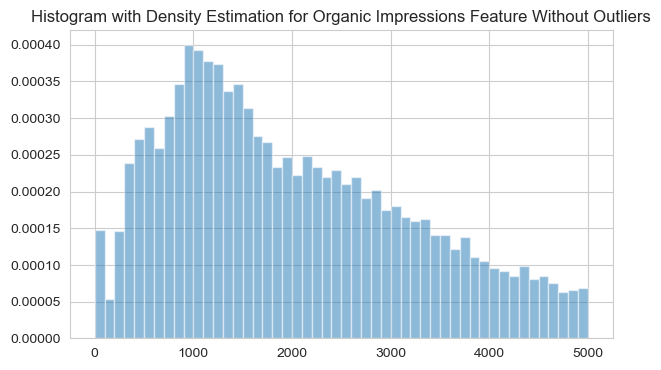

In [93]:
sns.set_style("whitegrid")

plt.figure(figsize=(7, 4))
no_outliers = df.loc[df.organic_impressions.between(0, 5000, inclusive='neither'), 'organic_impressions']
plt.hist(no_outliers, density=True, bins=50, alpha=0.5)
plt.title('Histogram with Density Estimation for Organic Impressions Feature Without Outliers')
plt.show()

This plot is identical to that of the `impressions` feature.

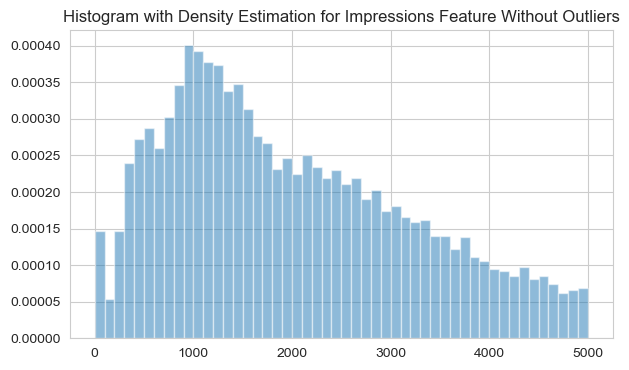

In [94]:
sns.set_style("whitegrid")

plt.figure(figsize=(7, 4))
no_outliers = df.loc[df.impressions.between(0, 5000, inclusive='neither'), 'impressions']
plt.hist(no_outliers, density=True, bins=50, alpha=0.5)
plt.title('Histogram with Density Estimation for Impressions Feature Without Outliers')
plt.show()

Organic Impressions vs. Impressions:

We assume that both features are identical. Therefore, we'll use a regression plot to confirm or disprove our assumption. We'll also include an r-squared score to determine how identical the values of both features are.

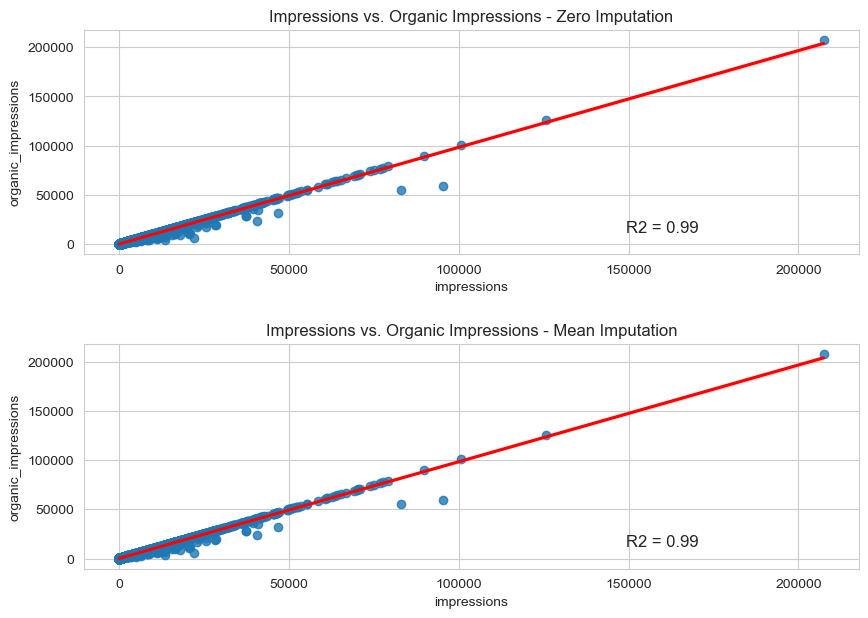

In [108]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7))
fig.subplots_adjust(hspace=0.4)

r_squared = r2_score(df.impressions.fillna(0), df.organic_impressions.fillna(0))
sns.regplot(x='impressions', y='organic_impressions', data=df, line_kws=dict(color="r"), ax=axes[0])
axes[0].annotate(f'R2 = {r_squared:.2f}', xy=(0.7, 0.1), xycoords='axes fraction', fontsize=12)
axes[0].set_title('Impressions vs. Organic Impressions - Zero Imputation')

r_squared = r2_score(df.impressions.fillna(df.impressions.mean()), df.organic_impressions.fillna(df.organic_impressions.mean()))
sns.regplot(x='impressions', y='organic_impressions', data=df, line_kws=dict(color="r"), ax=axes[1])
axes[1].annotate(f'R2 = {r_squared:.2f}', xy=(0.7, 0.1), xycoords='axes fraction', fontsize=12)
axes[1].set_title('Impressions vs. Organic Impressions - Mean Imputation')

plt.show()

From our plot, nearly all impressions are organic. Also, imputzero imputation and mean imputation result in the same r squared value. 

Let's check for other impressions-based metrics:

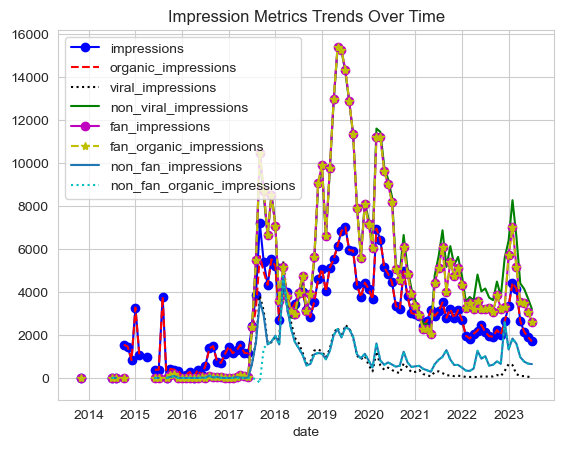

In [110]:
df[imp_metrics].resample('M').mean().plot(
    y=imp_metrics,
    style=['o-b', '--r', ':k', '-g', 'o-m', '*--y', '', ':c', 'o-w'],
    title='Impression Metrics Trends Over Time'
).autoscale()
plt.show()

Comparing Similar Impressions Metrics

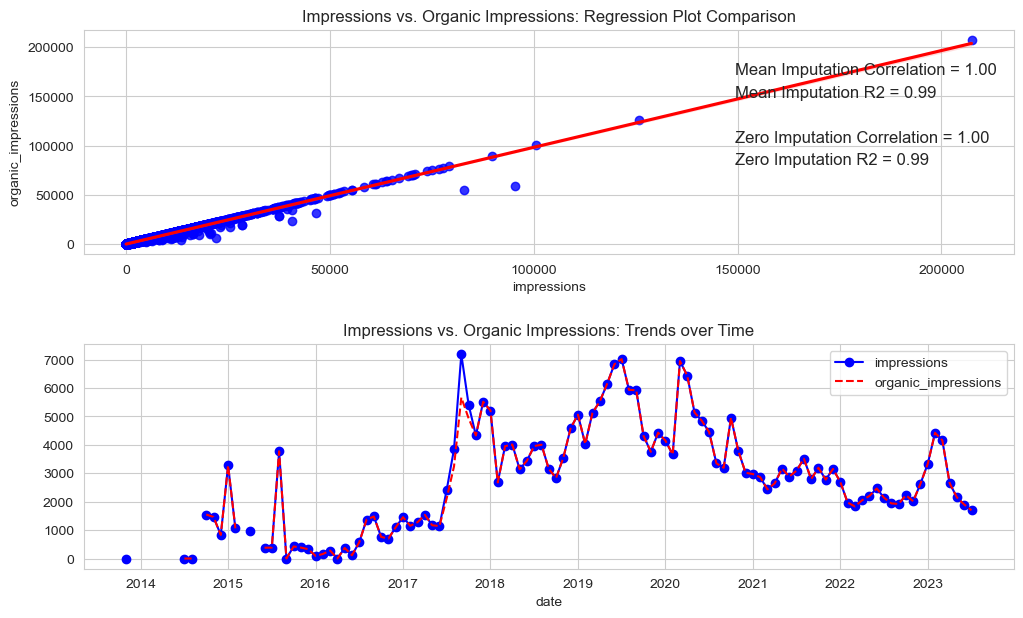

In [128]:
fig, axes = plt.subplots(2, 1, figsize=(12, 7))
fig.subplots_adjust(hspace=0.4)

slope, intercept, r_value, p_value, std_err = stats.linregress(df.impressions.fillna(df.impressions.mean()), df.organic_impressions.fillna(df.organic_impressions.mean()))
r_squared_m = r_value**2
correlation_coefficient_m = r_value

slope, intercept, r_value, p_value, std_err = stats.linregress(df.impressions.fillna(0), df.organic_impressions.fillna(0))
r_squared_0 = r_value**2
correlation_coefficient_0 = r_value

sns.regplot(x='impressions', y='organic_impressions', data=df, color='b', line_kws=dict(color="r"), ax=axes[0])
axes[0].annotate(f'Zero Imputation R2 = {r_squared_0:.2f}', xy=(0.7, 0.4), xycoords='axes fraction', fontsize=12)
axes[0].annotate(f'Zero Imputation Correlation = {correlation_coefficient_0:.2f}', xy=(0.7, 0.5), xycoords='axes fraction', fontsize=12)
axes[0].annotate(f'Mean Imputation R2 = {r_squared_m:.2f}', xy=(0.7, 0.7), xycoords='axes fraction', fontsize=12)
axes[0].annotate(f'Mean Imputation Correlation = {correlation_coefficient_m:.2f}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=12)
axes[0].set_title('Impressions vs. Organic Impressions: Regression Plot Comparison')

df[imp_metrics].resample('M').mean().plot(
    y=['impressions', 'organic_impressions'],
    style=['o-b', '--r'],
    title='Impressions vs. Organic Impressions: Trends over Time',
    ax=axes[1]
).autoscale()

plt.show()

`Viral impressions` refer to the number of times a piece of content or post is viewed or displayed as a result of being shared by users beyond your immediate network or followers. They occur when your content spreads rapidly and widely through social media platforms due to shares, reposts, retweets, or other forms of user-driven distribution.

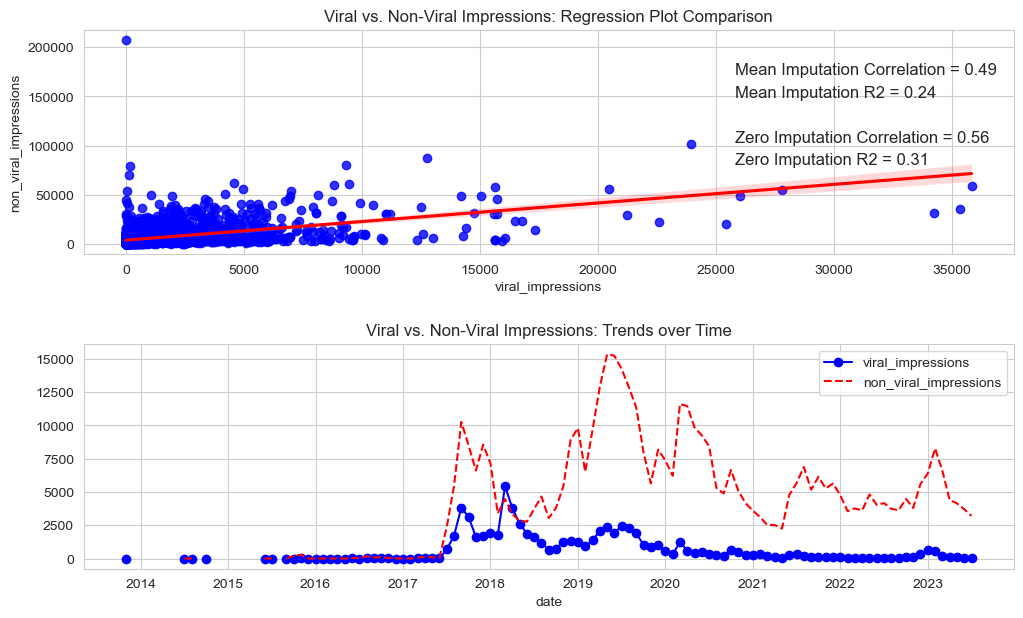

In [127]:
fig, axes = plt.subplots(2, 1, figsize=(12, 7))
fig.subplots_adjust(hspace=0.4)

slope, intercept, r_value, p_value, std_err = stats.linregress(df.viral_impressions.fillna(df.viral_impressions.mean()), df.non_viral_impressions.fillna(df.non_viral_impressions.mean()))
r_squared_m = r_value**2
correlation_coefficient_m = r_value

slope, intercept, r_value, p_value, std_err = stats.linregress(df.viral_impressions.fillna(0), df.non_viral_impressions.fillna(0))
r_squared_0 = r_value**2
correlation_coefficient_0 = r_value

sns.regplot(x='viral_impressions', y='non_viral_impressions', data=df, color='b', line_kws=dict(color="r"), ax=axes[0])
axes[0].annotate(f'Zero Imputation R2 = {r_squared_0:.2f}', xy=(0.7, 0.4), xycoords='axes fraction', fontsize=12)
axes[0].annotate(f'Zero Imputation Correlation = {correlation_coefficient_0:.2f}', xy=(0.7, 0.5), xycoords='axes fraction', fontsize=12)
axes[0].annotate(f'Mean Imputation R2 = {r_squared_m:.2f}', xy=(0.7, 0.7), xycoords='axes fraction', fontsize=12)
axes[0].annotate(f'Mean Imputation Correlation = {correlation_coefficient_m:.2f}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=12)
axes[0].set_title('Viral vs. Non-Viral Impressions: Regression Plot Comparison')

df[imp_metrics].resample('M').mean().plot(
    y=['viral_impressions', 'non_viral_impressions'],
    style=['o-b', '--r'],
    title='Viral vs. Non-Viral Impressions: Trends over Time',
    ax=axes[1]
).autoscale()

plt.show()

`Fan impressions` refer to the number of times that content from a social media account or page is displayed to the followers or fans of that particular account or page. These impressions represent the reach of your content within your existing audience or community.

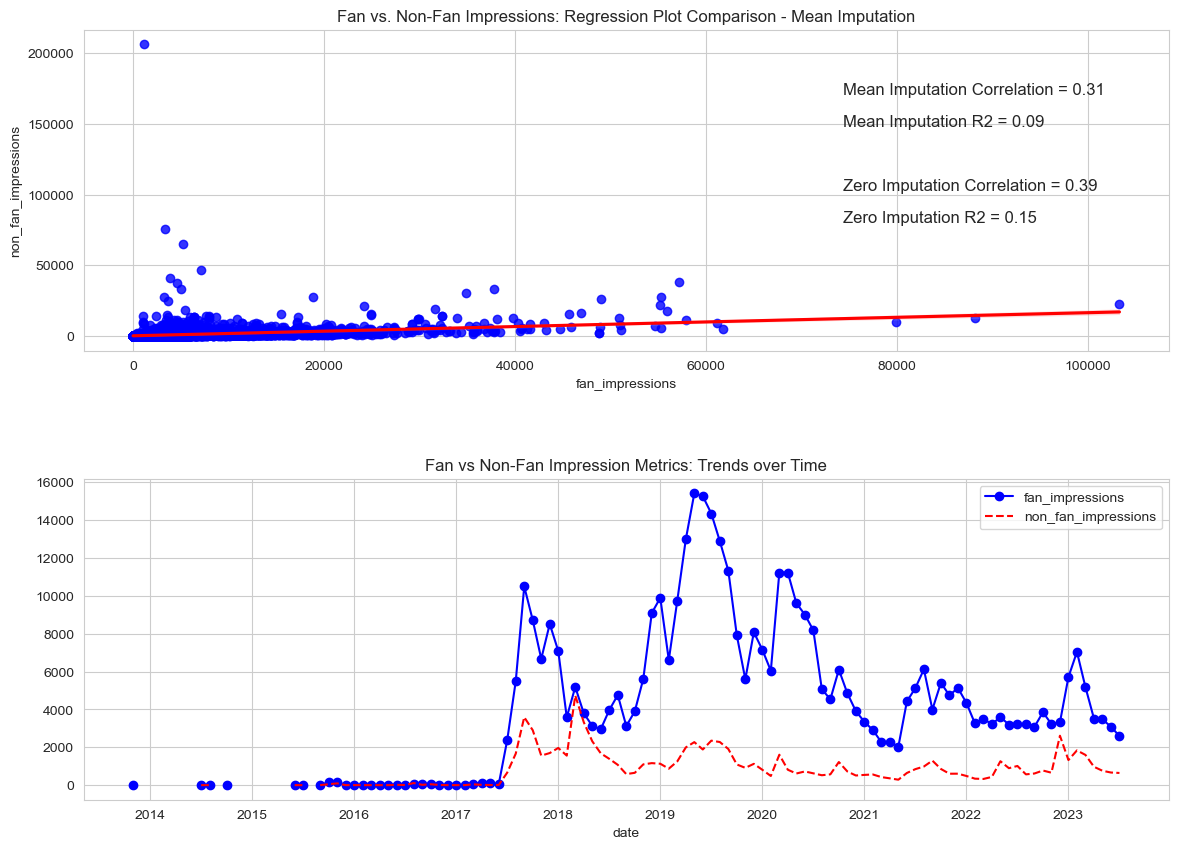

In [126]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))
fig.subplots_adjust(hspace=0.4)

slope, intercept, r_value, p_value, std_err = stats.linregress(df.fan_impressions.fillna(df.fan_impressions.mean()), df.non_fan_impressions.fillna(df.non_fan_impressions.mean()))
r_squared_m = r_value**2
correlation_coefficient_m = r_value

slope, intercept, r_value, p_value, std_err = stats.linregress(df.fan_impressions.fillna(0), df.non_fan_impressions.fillna(0))
r_squared_0 = r_value**2
correlation_coefficient_0 = r_value

sns.regplot(x='fan_impressions', y='non_fan_impressions', data=df, color='b', line_kws=dict(color="r"), ax=axes[0])
axes[0].annotate(f'Zero Imputation R2 = {r_squared_0:.2f}', xy=(0.7, 0.4), xycoords='axes fraction', fontsize=12)
axes[0].annotate(f'Zero Imputation Correlation = {correlation_coefficient_0:.2f}', xy=(0.7, 0.5), xycoords='axes fraction', fontsize=12)
axes[0].annotate(f'Mean Imputation R2 = {r_squared_m:.2f}', xy=(0.7, 0.7), xycoords='axes fraction', fontsize=12)
axes[0].annotate(f'Mean Imputation Correlation = {correlation_coefficient_m:.2f}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=12)
axes[0].set_title('Fan vs. Non-Fan Impressions: Regression Plot Comparison')

df[imp_metrics].resample('M').mean().plot(
    y=['fan_impressions', 'non_fan_impressions'],
    style=['o-b', '--r'],
    title='Fan vs Non-Fan Impression Metrics: Trends over Time',
    ax=axes[1]
).autoscale()

plt.show()

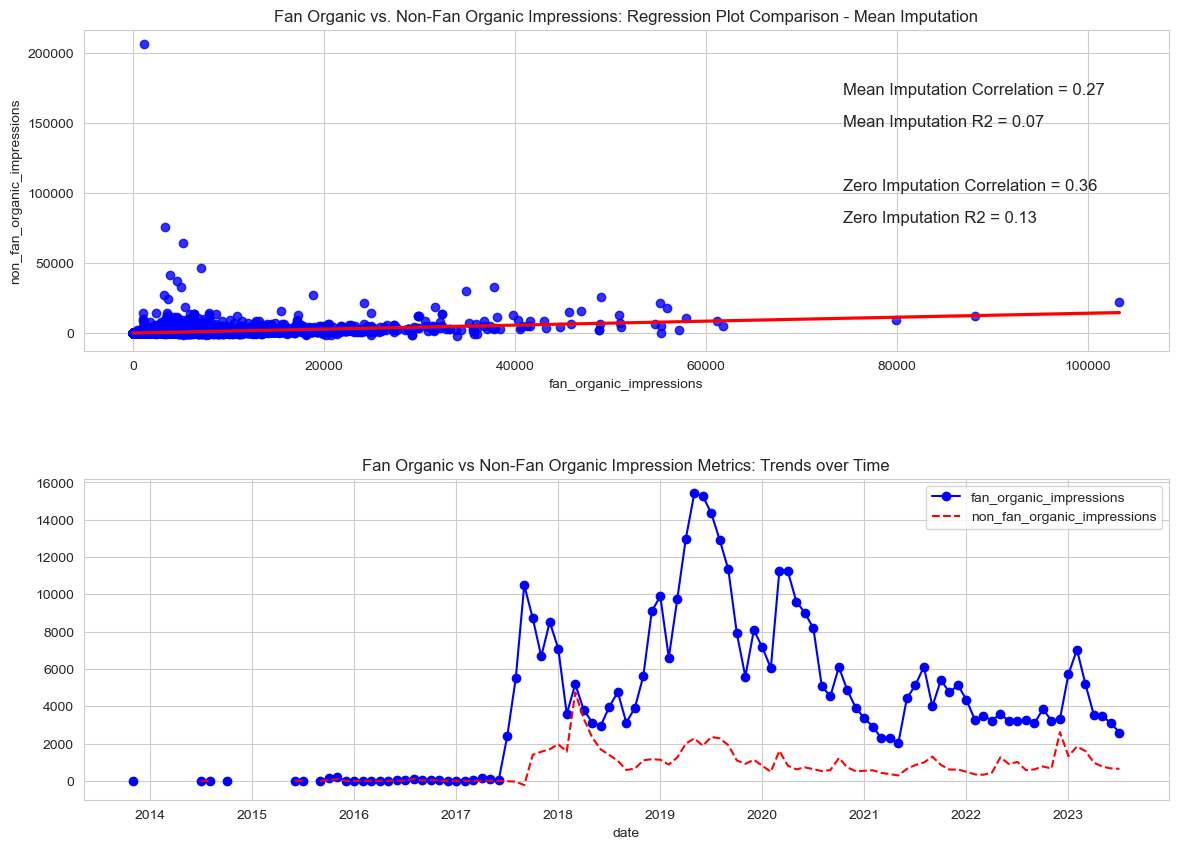

In [125]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10))
fig.subplots_adjust(hspace=0.4)

slope, intercept, r_value, p_value, std_err = stats.linregress(df.fan_organic_impressions.fillna(df.fan_organic_impressions.mean()), df.non_fan_organic_impressions.fillna(df.non_fan_organic_impressions.mean()))
r_squared_m = r_value**2
correlation_coefficient_m = r_value

slope, intercept, r_value, p_value, std_err = stats.linregress(df.fan_organic_impressions.fillna(0), df.non_fan_organic_impressions.fillna(0))
r_squared_0 = r_value**2
correlation_coefficient_0 = r_value

sns.regplot(x='fan_organic_impressions', y='non_fan_organic_impressions', data=df, color='b', line_kws=dict(color="r"), ax=axes[0])
axes[0].annotate(f'Zero Imputation R2 = {r_squared_0:.2f}', xy=(0.7, 0.4), xycoords='axes fraction', fontsize=12)
axes[0].annotate(f'Zero Imputation Correlation = {correlation_coefficient_0:.2f}', xy=(0.7, 0.5), xycoords='axes fraction', fontsize=12)
axes[0].annotate(f'Mean Imputation R2 = {r_squared_m:.2f}', xy=(0.7, 0.7), xycoords='axes fraction', fontsize=12)
axes[0].annotate(f'Mean Imputation Correlation = {correlation_coefficient_m:.2f}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=12)
axes[0].set_title('Fan Organic vs. Non-Fan Organic Impressions: Regression Plot Comparison - Mean Imputation')

df[imp_metrics].resample('M').mean().plot(
    y=['fan_organic_impressions', 'non_fan_organic_impressions'],
    style=['o-b', '--r'],
    title='Fan Organic vs Non-Fan Organic Impression Metrics: Trends over Time',
    ax=axes[1]
).autoscale()

plt.show()

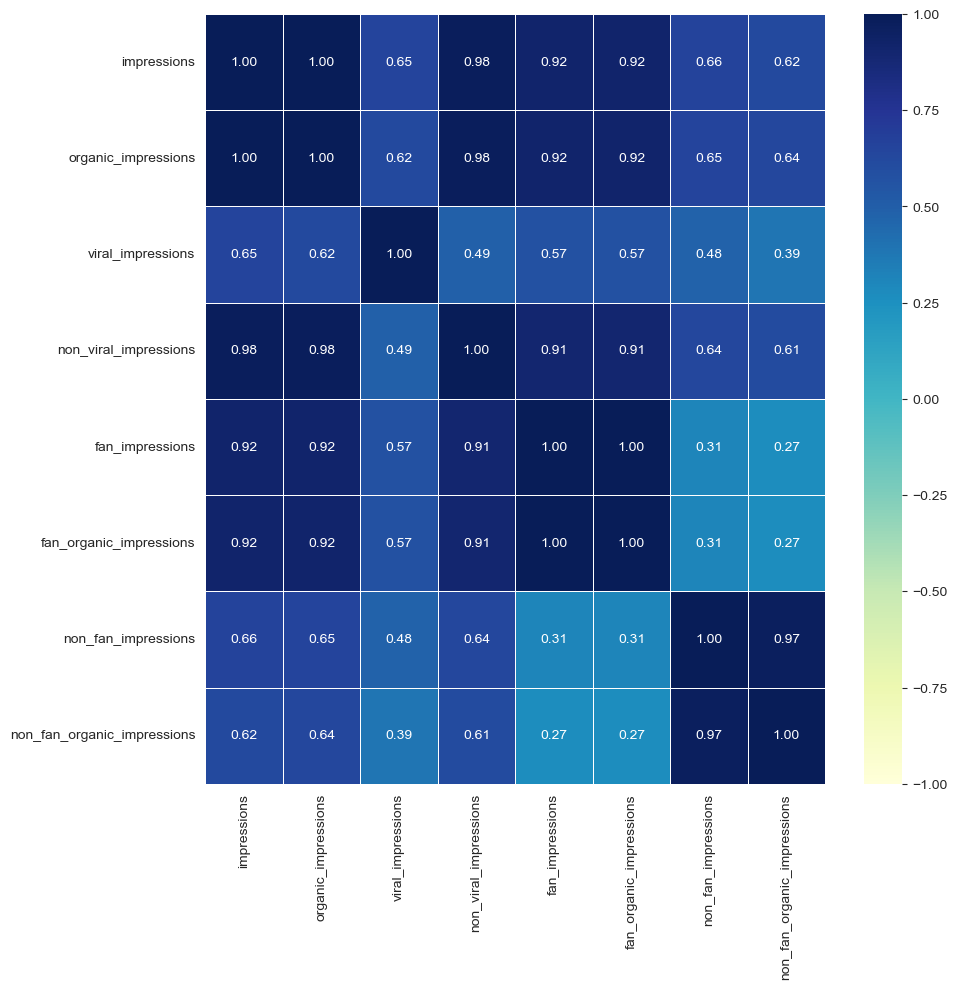

In [118]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    df[imp_metrics].corr(numeric_only=True),
    annot=True,
    linewidths=0.5,
    center=0,
    vmin=-1,
    vmax=1,
    fmt= ".2f",
    cmap="YlGnBu");

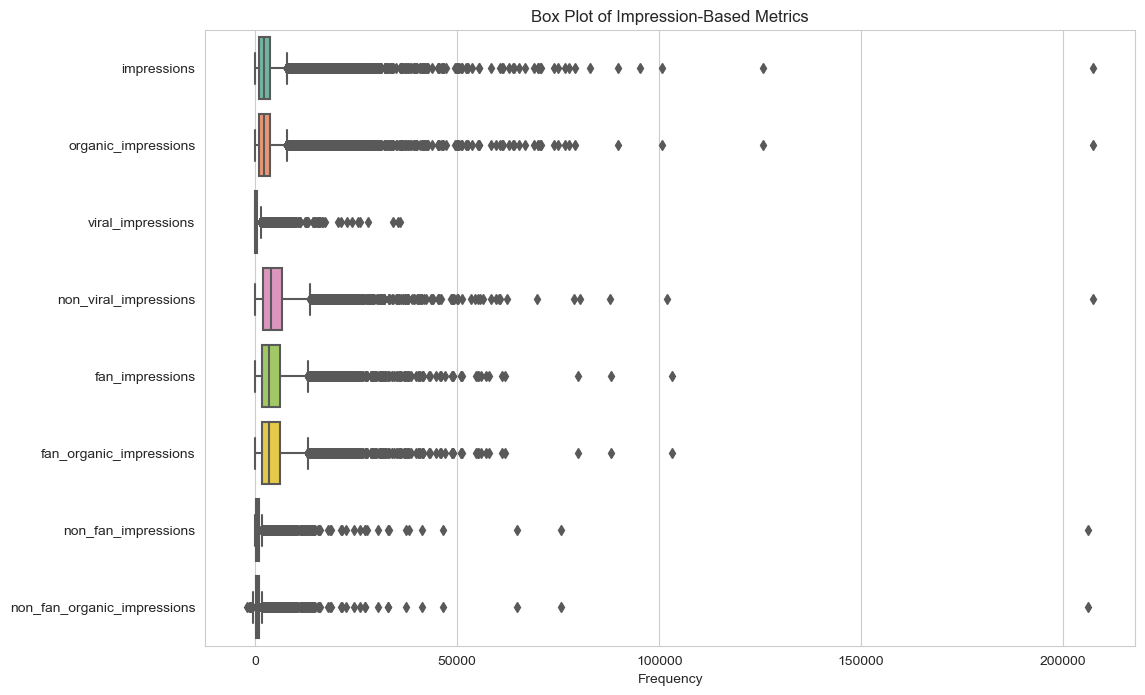

In [129]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[imp_metrics], orient="h", palette="Set2")
plt.title('Box Plot of Impression-Based Metrics')
plt.xlabel('Frequency')

plt.show()

From our analysis of the impressions-based metrics, we arrive at the following conclusions:
* All impressions-based metrics are positively correlated.
* Most impressions are organic (99%).
* All impressions have steadily increased over time.
* There is a marked spike in all impressions-based metrics from mid-2017, even though the earliest records are from 2013/ 2014.
* Tagging posts began in 2020. Tagged posts generally have lower impressions, averaging around 2500 impressions, with 2 peaks in late 2021 and early 2023.
* Fan-based and viral impressions have the lowest metric counts.
* The highest impressions come from Facebook, then Twitter, and the lowest come from LinkedIn.
* In a smoother plot, most network impressions show a normal distribution over time, except LinkedIn, whose values are closer to uniform than normal.
* When grouped by months, impressions are higher on average during the dry months (November - April) than during the wet months, with the exception of a significant spike in July. This implies seasonality in impression trends.
* On average, the lowest months for impressions are November and February.
* For non-outlier values in impression and organic impression features, the mode is around 1000 impressions. However, the mode only represents 0.04% of the non-outlier dataset.
* All impressions and their organic counterparts are 100% correlated.
* Most posts do not go viral, i.e. most posts have non-viral impressions.
* Viral impressions offer less than half the total number of impressions of non-viral impressions. This implies that the client gets most of their impressions from their own community of followers. This trend is replicated for fan/ fan-organic impressions.
* Impressions and organic impressions follow the same trend, non-viral, fan and fan-organic follow the same trend and non-fan and non-fan organic follow the same trend. This is confirmed in the correlation matrix plot.
* Viral impressions overlap with the non-fan-based impressions, although from 2020, viral impressions fall significantly lower than them. This implies that since 2020 the client has had significantly fewer viral impressions. 

**Reach Metrics**

`Reach` refers to the total number of unique users or accounts who have seen a particular piece of content posted on a social media platform. It is a metric used to gauge how far a piece of content has spread and how many people have been exposed to it. Reach is often used in conjunction with other metrics like engagement (likes, comments, shares) to assess the effectiveness of a social media marketing campaign or the popularity of a specific post.

In [130]:
rch_metrics = ['reach', 'organic_reach', 'viral_reach', 
               'non_viral_reach', 'fan_reach', 'potential_reach']

Reach metrics generally have very low values, with significant outliers.

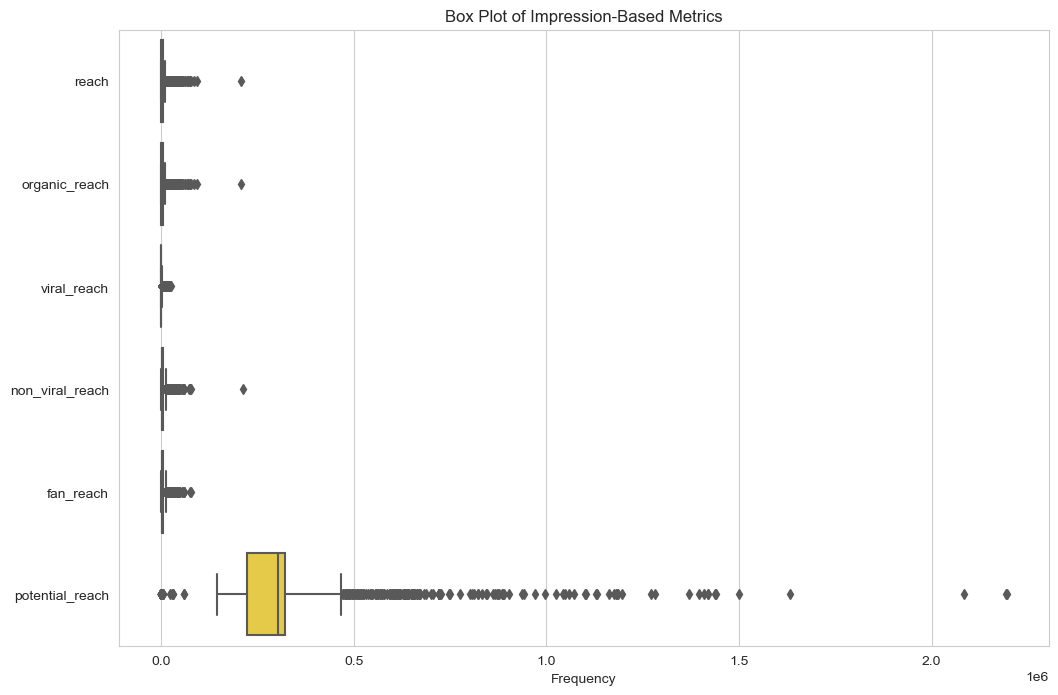

In [131]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[rch_metrics], orient="h", palette="Set2")
plt.title('Box Plot of Impression-Based Metrics')
plt.xlabel('Frequency')

plt.show()

There are 3456 records with outlier reach in excess of 5000, representing over 9.58% of the dataset, while there are 2,451 records with 0 reach, representing over 6.79% of the dataset.


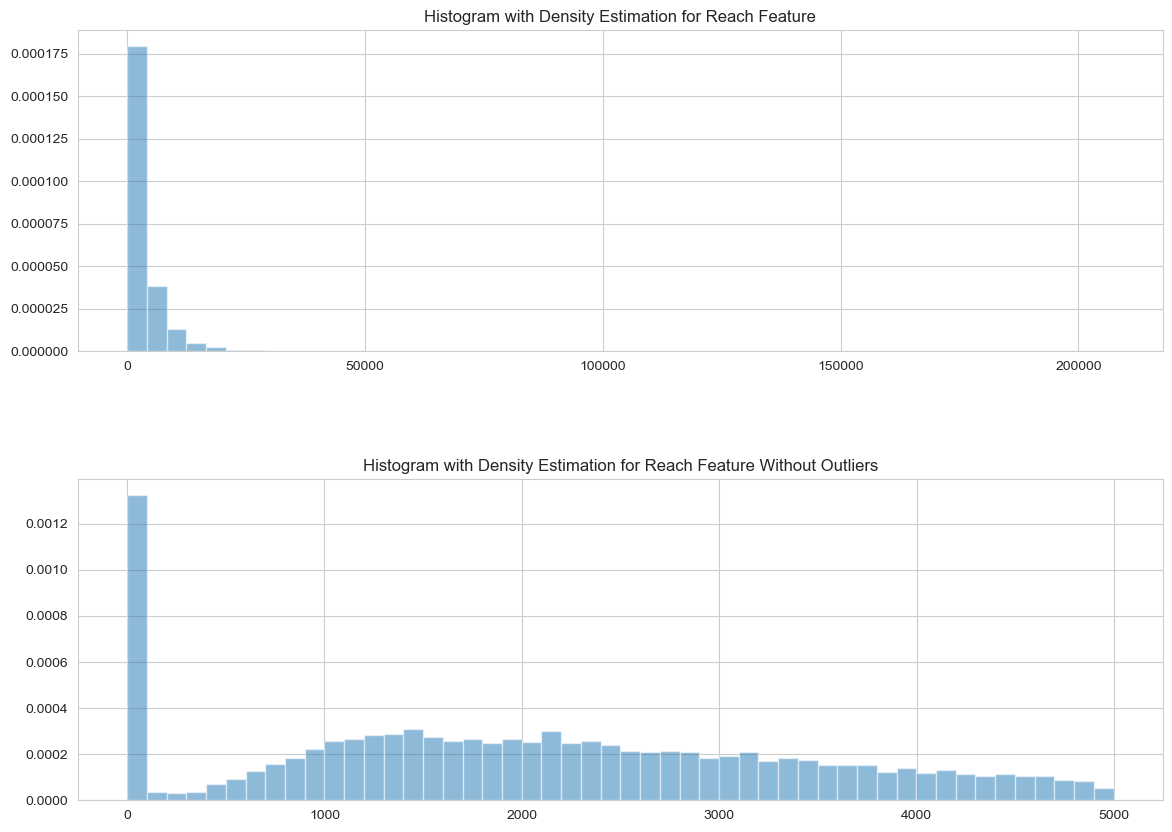

In [133]:
excess_5k = df.loc[df['reach'] > 5000, 'reach'].shape[0]
zero_vals = df.loc[df['reach'] == 0, 'reach'].shape[0]
len_df = df.shape[0]

print(f'There are {excess_5k} records with outlier reach in excess of 5000, representing over {(excess_5k/len_df)*100:.2f}% of the dataset, while there are {zero_vals:,.0f} records with 0 reach, representing over {(zero_vals/len_df)*100:.2f}% of the dataset.')

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(14, 10))
fig.subplots_adjust(hspace=0.4)

axes[0].hist(df.reach, density=True, bins=50, alpha=0.5)
axes[0].set_title('Histogram with Density Estimation for Reach Feature')

no_outliers = df.loc[df.reach.between(0, 5000, inclusive='neither'), 'reach']
axes[1].hist(no_outliers, density=True, bins=50, alpha=0.5)
axes[1].set_title('Histogram with Density Estimation for Reach Feature Without Outliers')

plt.show()

When we drop the outlier values and view the spread of this feature, we find that the values in reach are very spread throughout the dataset, with a cluster around 0 which has a density frequency of 0.1%.

`For all reach metrics except reach and potential reach, about 27k 0 values were imputed as they were missing values. This makes 0 values about 80% of the feature. We'll exclude them to see how those reach metrics are spread.`

Organic Reach:

There are 3418 records with outlier organic reach in excess of 5000, representing over 9.47% of the dataset, while there are 2,450 records with 0 organic reach, representing over 6.79% of the dataset.


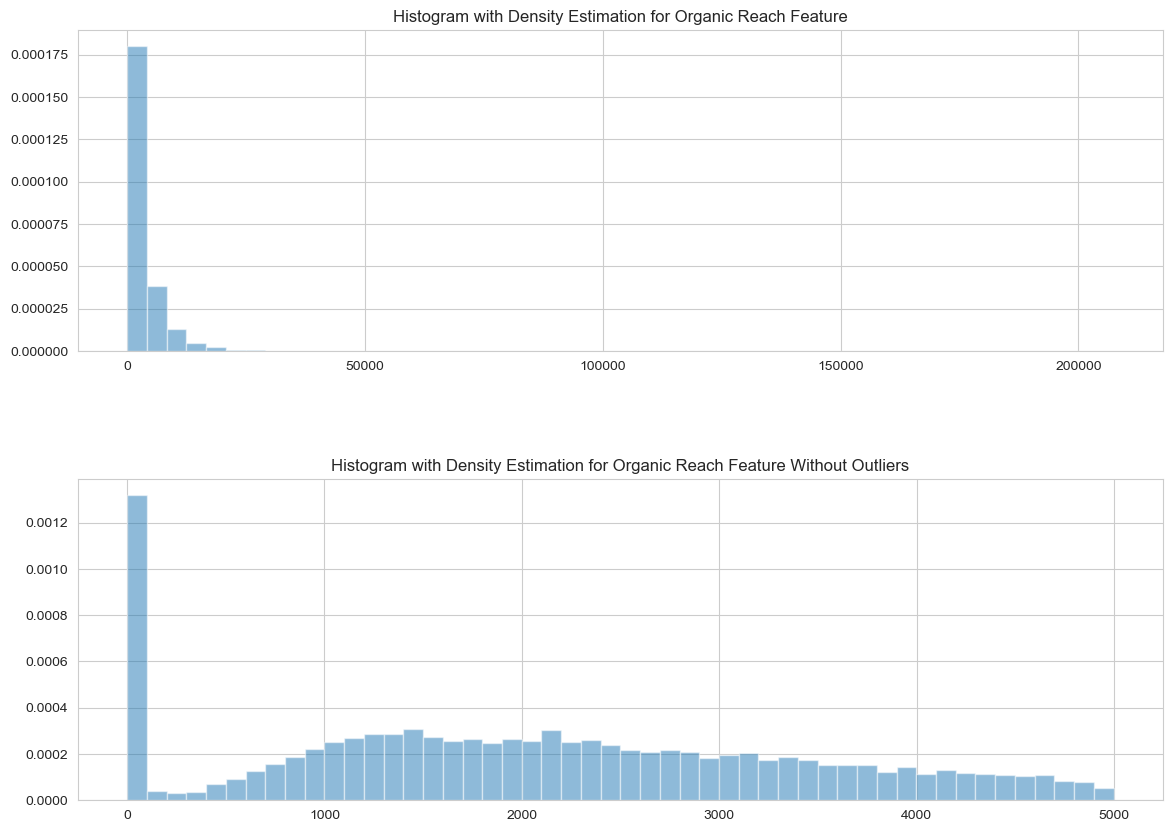

In [134]:
excess_5k = df.loc[df['organic_reach'] > 5000, 'organic_reach'].shape[0]
zero_vals = df.loc[df['organic_reach'] == 0, 'organic_reach'].shape[0]
len_df = df.shape[0]

print(f'There are {excess_5k} records with outlier organic reach in excess of 5000, representing over {(excess_5k/len_df)*100:.2f}% of the dataset, while there are {zero_vals:,.0f} records with 0 organic reach, representing over {(zero_vals/len_df)*100:.2f}% of the dataset.')

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(14, 10))
fig.subplots_adjust(hspace=0.4)

axes[0].hist(df.organic_reach, density=True, bins=50, alpha=0.5)
axes[0].set_title('Histogram with Density Estimation for Organic Reach Feature')

no_outliers = df.loc[df.organic_reach.between(0, 5000, inclusive='neither'), 'organic_reach']
axes[1].hist(no_outliers, density=True, bins=50, alpha=0.5)
axes[1].set_title('Histogram with Density Estimation for Organic Reach Feature Without Outliers')

plt.show()

This is similar to the reach metric implying that nearly all reach is organic. This histogram spread without outliers is also identical to the corresponding reach histogram. 

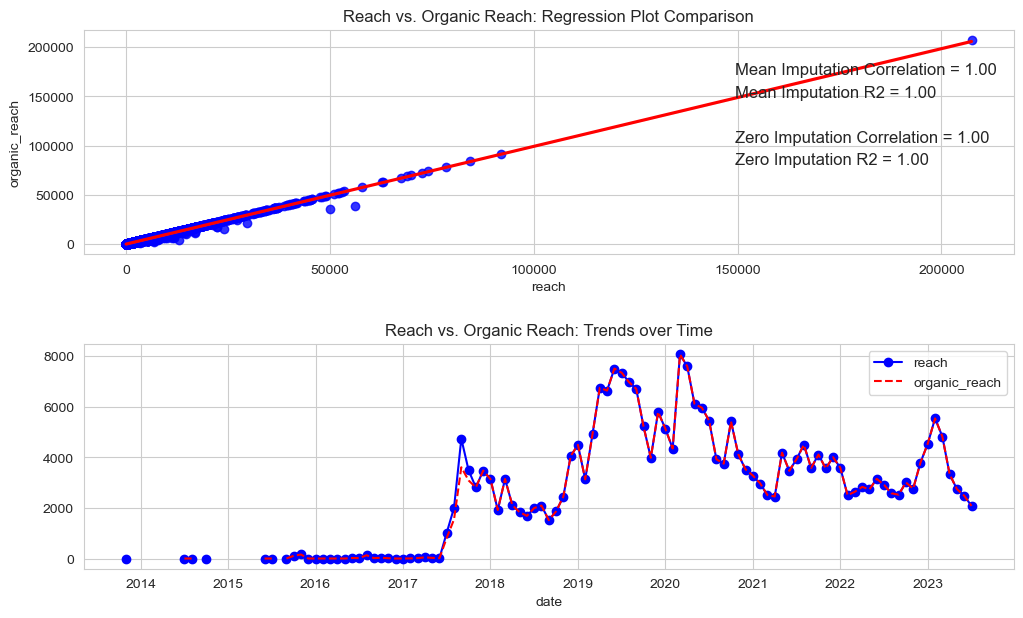

In [135]:
fig, axes = plt.subplots(2, 1, figsize=(12, 7))
fig.subplots_adjust(hspace=0.4)

slope, intercept, r_value, p_value, std_err = stats.linregress(df.reach.fillna(df.reach.mean()), df.organic_reach.fillna(df.organic_reach.mean()))
r_squared_m = r_value**2
correlation_coefficient_m = r_value

slope, intercept, r_value, p_value, std_err = stats.linregress(df.reach.fillna(0), df.organic_reach.fillna(0))
r_squared_0 = r_value**2
correlation_coefficient_0 = r_value

sns.regplot(x='reach', y='organic_reach', data=df, color='b', line_kws=dict(color="r"), ax=axes[0])
axes[0].annotate(f'Zero Imputation R2 = {r_squared_0:.2f}', xy=(0.7, 0.4), xycoords='axes fraction', fontsize=12)
axes[0].annotate(f'Zero Imputation Correlation = {correlation_coefficient_0:.2f}', xy=(0.7, 0.5), xycoords='axes fraction', fontsize=12)
axes[0].annotate(f'Mean Imputation R2 = {r_squared_m:.2f}', xy=(0.7, 0.7), xycoords='axes fraction', fontsize=12)
axes[0].annotate(f'Mean Imputation Correlation = {correlation_coefficient_m:.2f}', xy=(0.7, 0.8), xycoords='axes fraction', fontsize=12)
axes[0].set_title('Reach vs. Organic Reach: Regression Plot Comparison')

df[rch_metrics].resample('M').mean().plot(
    y=['reach', 'organic_reach'],
    style=['o-b', '--r'],
    title='Reach vs. Organic Reach: Trends over Time',
    ax=axes[1]
).autoscale()

plt.show()

Viral Reach:

There are 87 records with outlier viral reach in excess of 5000, representing over 0.24% of the dataset, while there are 1,698 records with 0 viral reach, representing over 4.70% of the dataset.


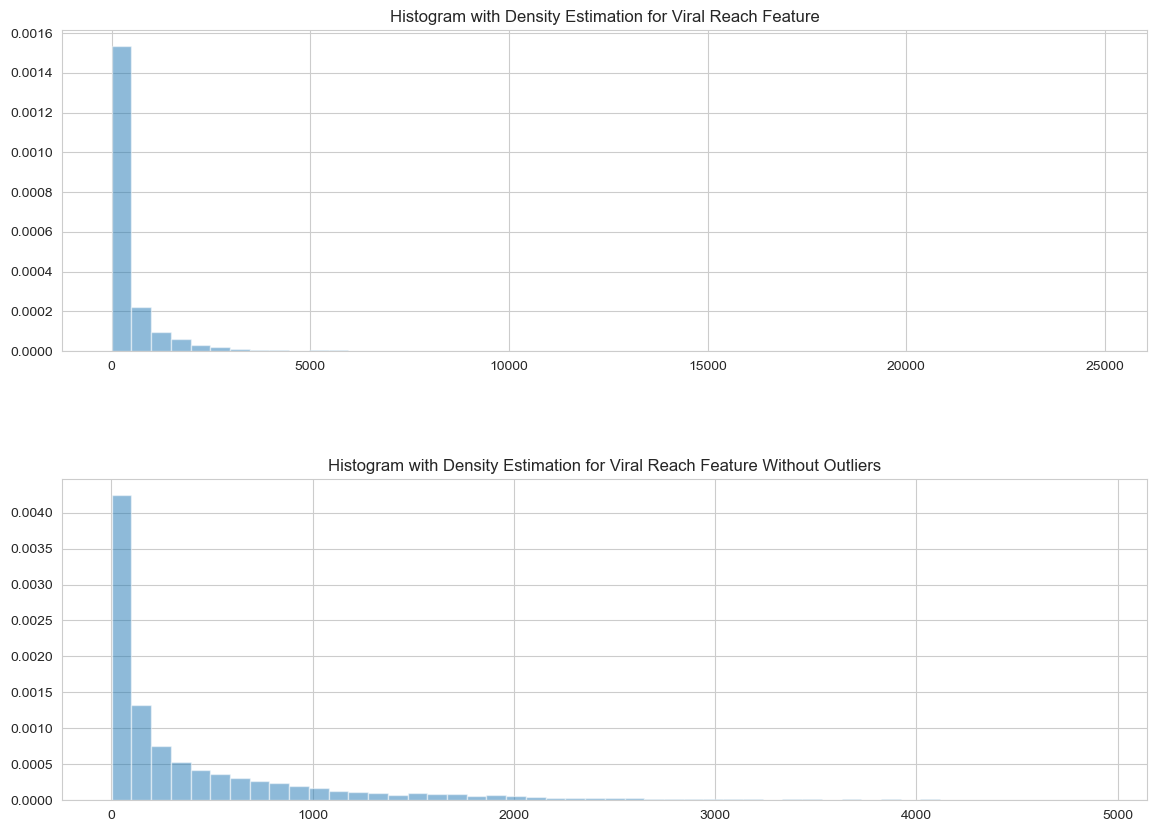

In [138]:
excess_5k = df.loc[df['viral_reach'] > 5000, 'viral_reach'].shape[0]
zero_vals = df.loc[df['viral_reach'] == 0, 'viral_reach'].shape[0]
len_df = df.shape[0]

print(f'There are {excess_5k} records with outlier viral reach in excess of 5000, representing over {(excess_5k/len_df)*100:.2f}% of the dataset, while there are {zero_vals:,.0f} records with 0 viral reach, representing over {(zero_vals/len_df)*100:.2f}% of the dataset.')

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(14, 10))
fig.subplots_adjust(hspace=0.4)

axes[0].hist(df.viral_reach, density=True, bins=50, alpha=0.5)
axes[0].set_title('Histogram with Density Estimation for Viral Reach Feature')

no_outliers = df.loc[df.viral_reach.between(0, 5000, inclusive='neither'), 'viral_reach']
axes[1].hist(no_outliers, density=True, bins=50, alpha=0.5)
axes[1].set_title('Histogram with Density Estimation for Viral Reach Feature Without Outliers')

plt.show()

Fan Reach:

There are 2612 records with outlier fan reach in excess of 5000, representing over 7.24% of the dataset, while there are 1,183 records with 0 fan reach, representing over 3.28% of the dataset.


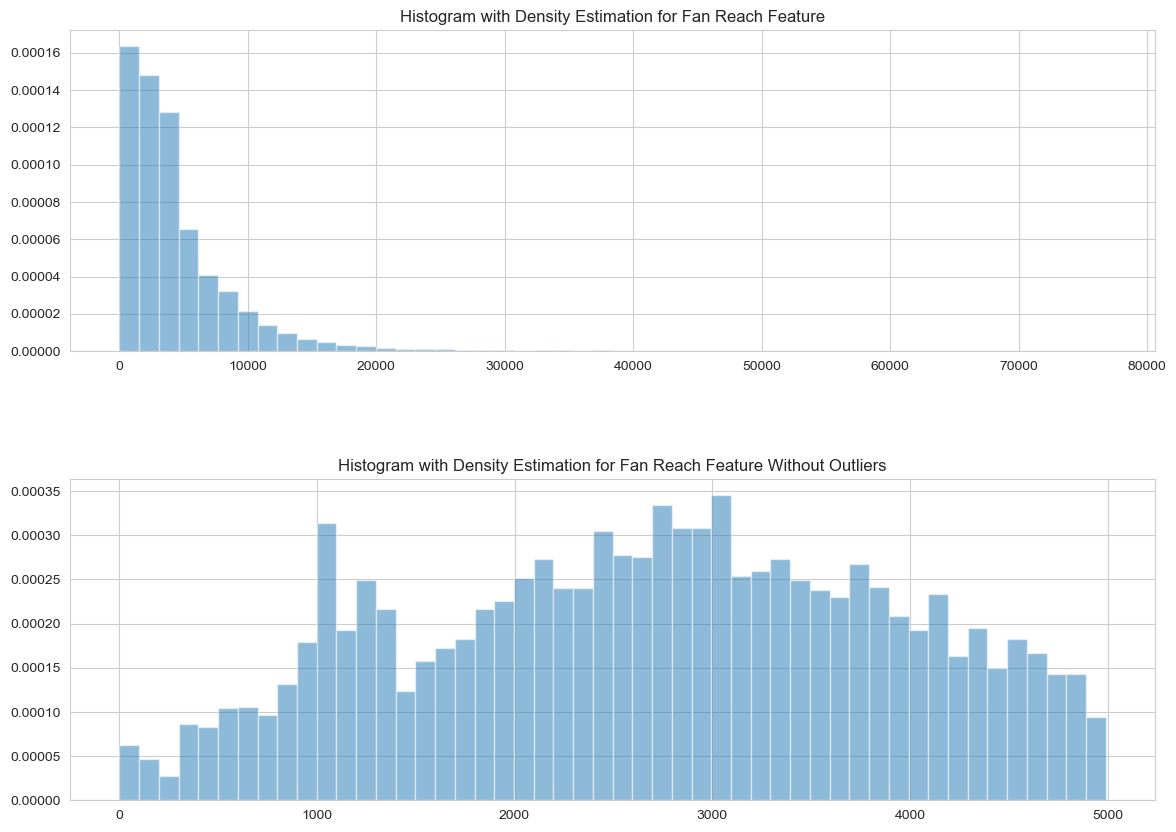

In [140]:
excess_5k = df.loc[df['fan_reach'] > 5000, 'fan_reach'].shape[0]
zero_vals = df.loc[df['fan_reach'] == 0, 'fan_reach'].shape[0]
len_df = df.shape[0]

print(f'There are {excess_5k} records with outlier fan reach in excess of 5000, representing over {(excess_5k/len_df)*100:.2f}% of the dataset, while there are {zero_vals:,.0f} records with 0 fan reach, representing over {(zero_vals/len_df)*100:.2f}% of the dataset.')

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(14, 10))
fig.subplots_adjust(hspace=0.4)

axes[0].hist(df.fan_reach, density=True, bins=50, alpha=0.5)
axes[0].set_title('Histogram with Density Estimation for Fan Reach Feature')

no_outliers = df.loc[df.fan_reach.between(0, 5000, inclusive='neither'), 'fan_reach']
axes[1].hist(no_outliers, density=True, bins=50, alpha=0.5)
axes[1].set_title('Histogram with Density Estimation for Fan Reach Feature Without Outliers')

plt.show()

Potential Reach:

There are 8396 records with outlier potential reach in excess of 5000, representing over 23.26% of the dataset, while there are 45 records with 0 potential reach, representing over 0.12% of the dataset.


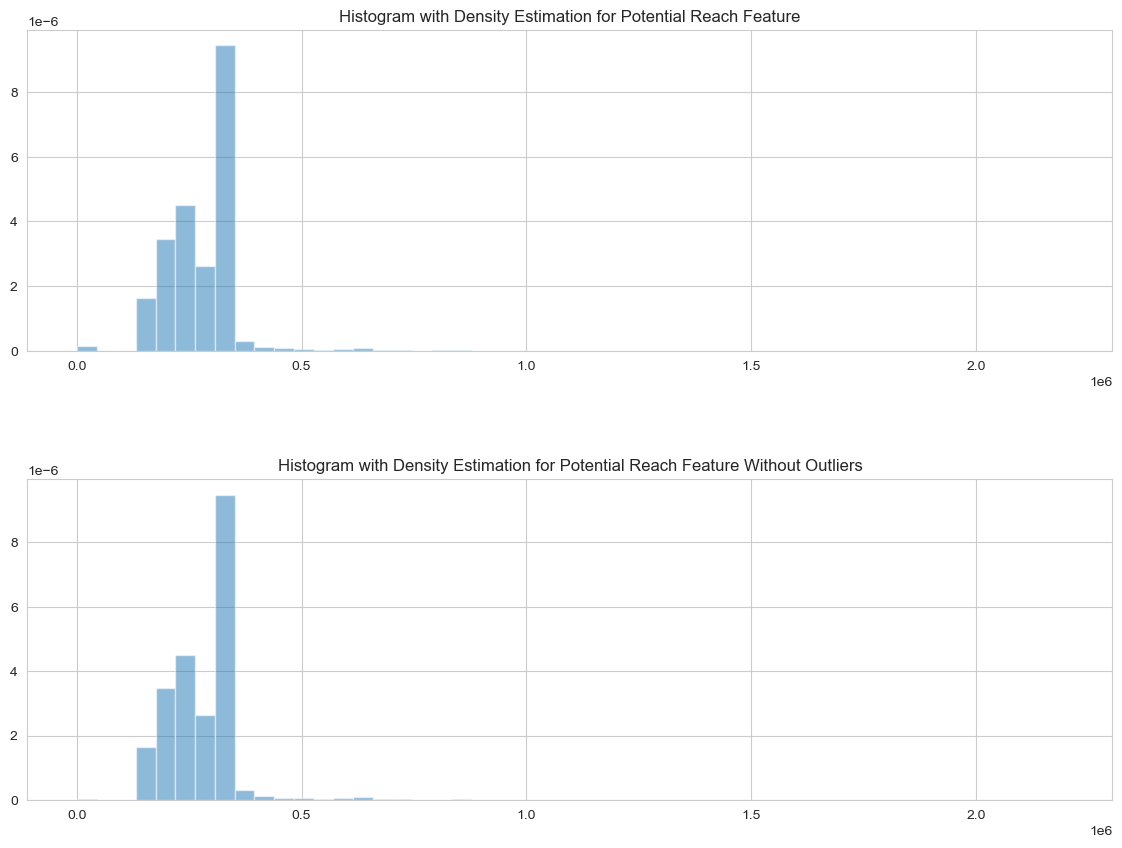

In [142]:
excess_5k = df.loc[df['potential_reach'] > 5000, 'potential_reach'].shape[0]
zero_vals = df.loc[df['potential_reach'] == 0, 'potential_reach'].shape[0]
len_df = df.shape[0]

print(f'There are {excess_5k} records with outlier potential reach in excess of 5000, representing over {(excess_5k/len_df)*100:.2f}% of the dataset, while there are {zero_vals:,.0f} records with 0 potential reach, representing over {(zero_vals/len_df)*100:.2f}% of the dataset.')

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(14, 10))
fig.subplots_adjust(hspace=0.4)

axes[0].hist(df.potential_reach, density=True, bins=50, alpha=0.5)
axes[0].set_title('Histogram with Density Estimation for Potential Reach Feature')

no_outliers = df.loc[df.potential_reach.gt(0), 'potential_reach']
axes[1].hist(no_outliers, density=True, bins=50, alpha=0.5)
axes[1].set_title('Histogram with Density Estimation for Potential Reach Feature Without Outliers')

plt.show()

Reach Trends

Reach over time:

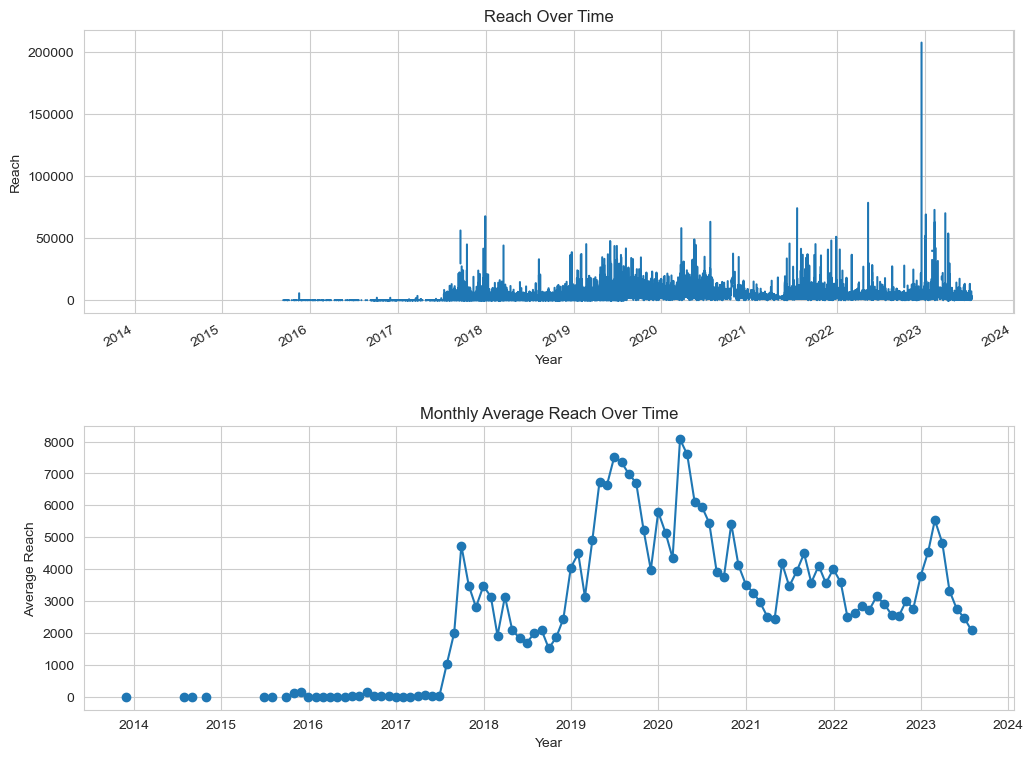

In [143]:
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
fig.subplots_adjust(hspace=0.4)

sns.set_style("whitegrid")
df.reach.plot(kind='line', ax=axes[0], title='Reach Over Time', ylabel='Reach', xlabel='Year')

sns.set_style("whitegrid")
monthly_mean = df.reach.resample('M').mean()

axes[1].plot(monthly_mean.index, monthly_mean, marker='o', linestyle='-')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Reach')
axes[1].set_title('Monthly Average Reach Over Time')

plt.show()

Average Reach Grouped by Month

In [ ]:
sns.set_style("whitegrid")
monthly_mean = df.reach.groupby(df.index.month).mean()

month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'Aug',
    9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
monthly_mean.index = monthly_mean.index.map(month_mapping)

plt.figure(figsize=(10, 6))
plt.plot(monthly_mean.index, monthly_mean, marker='o', linestyle='-')
plt.xlabel('Months')
plt.ylabel('Mean Reach')
plt.title('Average Reach Grouped by Month')
plt.show()

In [ ]:
monthly_mean = df.groupby(df.index.month).mean(numeric_only=True)[['impressions', 'reach']]

month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'Aug',
    9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
monthly_mean.index = monthly_mean.index.map(month_mapping)

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
monthly_mean.plot(
    y=['impressions', 'reach'],
    style=['o-b', 'o-r'],
    title='Average Reach & Impressions Grouped by Month'
).autoscale()
plt.xlabel('Months')
plt.ylabel('Mean Reach / Impressions')
plt.show()

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df.impressions, df.reach)
r_squared = r_value**2
correlation_coefficient = r_value

fig, axes = plt.subplots(2, 1, figsize=(12, 10))
fig.subplots_adjust(hspace=0.4)

sns.regplot(x='impressions', y='reach', data=df, color='b', line_kws=dict(color="r"), ax=axes[0])
axes[0].annotate(f'R2 = {r_squared:.2f}', xy=(0.7, 0.1), xycoords='axes fraction', fontsize=12)
axes[0].annotate(f'Correlation = {correlation_coefficient:.2f}', xy=(0.7, 0.2), xycoords='axes fraction', fontsize=12)
axes[0].set_title('Impressions vs. Reach: Regression Plot Comparison')

df.resample('M').mean(numeric_only=True).plot(
    y=['impressions', 'reach'],
    style=['o-b', '--r'],
    title='Impressions vs. Reach: Trends over Time',
    ax=axes[1]
).autoscale()

plt.show()

In [ ]:
df.potential_reach.resample('M').mean().interpolate().plot(
    title='Avg Potential Reach: Rends Over Time'
).autoscale()
plt.show()

In [ ]:
df[rch_metrics[:-1]].resample('M').mean().plot(
    y=rch_metrics[:-1],
    style=['o-b', '--r', ':k', '-g', 'o-m'],
    title='Reach Metrics Trends Over Time'
).autoscale()
plt.show()

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df.viral_impressions, df.viral_reach)
r_squared = r_value**2
correlation_coefficient = r_value

fig, axes = plt.subplots(2, 1, figsize=(12, 7))
fig.subplots_adjust(hspace=0.4)

sns.regplot(x='viral_impressions', y='viral_reach', data=df, color='b', line_kws=dict(color="r"), ax=axes[0])
axes[0].annotate(f'R2 = {r_squared:.2f}', xy=(0.7, 0.1), xycoords='axes fraction', fontsize=12)
axes[0].annotate(f'Correlation = {correlation_coefficient:.2f}', xy=(0.7, 0.2), xycoords='axes fraction', fontsize=12)
axes[0].set_title('Viral Impressions vs. Viral Reach: Regression Plot Comparison')

df.resample('M').mean(numeric_only=True).plot(
    y=['viral_impressions', 'viral_reach'],
    style=['o-b', '--r'],
    title='Viral Impressions vs. Viral Reach: Trends over Time',
    ax=axes[1]
).autoscale()

plt.show()

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df.organic_impressions, df.organic_reach)
r_squared = r_value**2
correlation_coefficient = r_value

fig, axes = plt.subplots(2, 1, figsize=(12, 7))
fig.subplots_adjust(hspace=0.4)

sns.regplot(x='organic_impressions', y='organic_reach', data=df, color='b', line_kws=dict(color="r"), ax=axes[0])
axes[0].annotate(f'R2 = {r_squared:.2f}', xy=(0.7, 0.1), xycoords='axes fraction', fontsize=12)
axes[0].annotate(f'Correlation = {correlation_coefficient:.2f}', xy=(0.7, 0.2), xycoords='axes fraction', fontsize=12)
axes[0].set_title('Organic Impressions vs. Organic Reach: Regression Plot Comparison')

df.resample('M').mean(numeric_only=True).plot(
    y=['organic_impressions', 'organic_reach'],
    style=['o-b', '--r'],
    title='Organic Impressions vs. Organic Reach: Trends over Time',
    ax=axes[1]
).autoscale()

plt.show()

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df.non_viral_impressions, df.non_viral_reach)
r_squared = r_value**2
correlation_coefficient = r_value

fig, axes = plt.subplots(2, 1, figsize=(12, 7))
fig.subplots_adjust(hspace=0.4)

sns.regplot(x='non_viral_impressions', y='non_viral_reach', data=df, color='b', line_kws=dict(color="r"), ax=axes[0])
axes[0].annotate(f'R2 = {r_squared:.2f}', xy=(0.7, 0.1), xycoords='axes fraction', fontsize=12)
axes[0].annotate(f'Correlation = {correlation_coefficient:.2f}', xy=(0.7, 0.2), xycoords='axes fraction', fontsize=12)
axes[0].set_title('Non-Viral Impressions vs. Non-Viral Reach: Regression Plot Comparison')

df.resample('M').mean(numeric_only=True).plot(
    y=['non_viral_impressions', 'non_viral_reach'],
    style=['o-b', '--r'],
    title='Non-Viral Impressions vs. Non-Viral Reach: Trends over Time',
    ax=axes[1]
).autoscale()

plt.show()

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df.fan_impressions, df.fan_reach)
r_squared = r_value**2
correlation_coefficient = r_value

fig, axes = plt.subplots(2, 1, figsize=(12, 7))
fig.subplots_adjust(hspace=0.4)

sns.regplot(x='fan_impressions', y='fan_reach', data=df, color='b', line_kws=dict(color="r"), ax=axes[0])
axes[0].annotate(f'R2 = {r_squared:.2f}', xy=(0.7, 0.1), xycoords='axes fraction', fontsize=12)
axes[0].annotate(f'Correlation = {correlation_coefficient:.2f}', xy=(0.7, 0.2), xycoords='axes fraction', fontsize=12)
axes[0].set_title('Fan Impressions vs. Fan Reach: Regression Plot Comparison')

df.resample('M').mean(numeric_only=True).plot(
    y=['fan_impressions', 'fan_reach'],
    style=['o-b', '--r'],
    title='Fan Impressions vs. Fan Reach: Trends over Time',
    ax=axes[1]
).autoscale()

plt.show()

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    df[rch_metrics].corr(numeric_only=True),
    annot=True,
    linewidths=0.5,
    center=0,
    vmin=-1,
    vmax=1,
    fmt= ".2f",
    cmap="YlGnBu");

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(
    df[imp_metrics + rch_metrics].corr(numeric_only=True),
    annot=True,
    linewidths=0.5,
    center=0,
    vmin=-1,
    vmax=1,
    fmt= ".2f",
    cmap="YlGnBu");

From our analysis of the reach-based metrics, we arrive at the following conclusions:
* Reach refers to the total number of unique users or accounts who have seen your content at least once. It counts the distinct individuals or profiles that have been exposed to your content.
* It differs from impressions in that it tracks distinct users who engaged with a particular piece of content as opposed to the number of times such content was viewed, which views maye repeat views by the same user.
* Reach gauges how far a piece of content has spread and how many people have been exposed to it.
* Our dataset has 6 reach-related metrics, with most valued clustered around 0 and with significant outliers. 
* Most of the features in reach metrics have similar spreads, except `potential reach` which has really large value outliers.
* As with impressions, reach and organic reach are correlated with a r2 of 1, meaning all reach is organic. 
* For viral and fan reach, about 80% of values are 0, of which over 90% were imputed.
* The distribution of reach and organic reach, without outliers, have wide normal distributions, and a long head around 0.
* The trend lines for reach, monthly average reach and average reach grouped by months are identical to the corresponding impressions trend. 
* However, reach values are lower than impression values, except for viral, non-viral and fan reach and  impressions where the values significantly overlap.
* There is a strong positive correlation between a reach metric and its corresponding impression metric. 
* Potential reach is not correlated with other reach and impression metrics. 

**Engagement Metrics**

In [ ]:
eng_metrics = ['engagement_rate_per_impression',
               'engagement_rate_per_reach', 'engagements']

**Reaction Metrics**

In [ ]:
rct_metrics = ['reactions', 'likes', 'love_reactions',
               'haha_reactions', 'wow_reactions', 'sad_reactions', 'angry_reactions', 'unique_reactions']

**Activity Metrics**

In [ ]:
act_metrics = ['comments', 'shares', 'saves', 
               'other_engagements', 'answers', 'app_opens', 'follows_from_post', 'unfollows_from_post', 'negative_feedback', 'unique_comments','unique_shares', 'unique_answers', 'unique_negative_feedback']

**Clicks Metrics**

In [ ]:
clk_metrics = ['post_link_clicks', 'other_post_clicks',
               'post_clicks_all', 'post_media_clicks', 'post_hashtag_clicks', 'post_detail_expand_clicks', 'profile_clicks', 'post_photo_view_clicks', 'post_video_play_clicks', 'bit_ly_link_clicks', 'unique_post_clicks', 'unique_post_link_clicks', 'unique_post_photo_view_clicks', 'unique_post_video_play_clicks', 'unique_other_post_clicks']

**User-Based Metrics**

In [ ]:
usr_metrics = ['engaged_users', 'engaged_fans',
               'users_talking_about_this']

**Photo Metrics**

In [ ]:
pho_metrics = ['post_photo_view_clicks', 
               'unique_post_photo_view_clicks']

**Video & Other Media Metrics**

In [ ]:
vid_metrics = [
    'post_video_play_clicks', 'unique_post_video_play_clicks', 'video_views','media_views', 'organic_video_views', 'partial_video_views', 'organic_partial_video_views', 'full_video_views', 'organic_full_video_views', 'autoplay_video_views', 'click_to_play_video_views', 'sound_on_video_views', 'sound_off_video_views', '10_second_video_views', 'organic_10_second_video_views', 'paid_10_second_video_views', 'autoplay_10_second_video_views', 'click_to_play_10_second_video_views', 'sound_on_10_second_video_views', 'sound_off_10_second_video_views', 'autoplay_partial_video_views', 'autoplay_full_video_views', 'click_to_play_full_video_views', '95%_video_views', 'organic_95%_video_views', 'video_length_seconds', 'average_video_time_watched_seconds', 'video_view_time_seconds', 'organic_video_view_time_seconds', 'paid_video_view_time_seconds', 'unique_video_views', 'unique_organic_video_views', 'unique_10_second_video_views', 'unique_full_video_views', 'unique_organic_95%_video_views'
]

### Data Analysis

**Key Questions**

* What are they talking about?
* Spread number of words by tags/ hashtags 
* What are the most engaging types of posts?
* Which platform yields the highest engagement for the client?
* What are the peak times for user engagement? (Best date / time for impressions/ engagements/ reach)
* Are there any noticeable trends over time (e.g., increasing likes, decreasing shares)?
    * Are there are any increases / decreases in engagements
    * Is this related to increase or reduction in activity
    * Is this related to time/ date of post?
    * Is this related to the sentiment of post / hashtag?
    * Count of posts per day/ month
    * Which day of the week has the most / least posts?
* Popular tags & hashtags
* Sentiment analysis: Relationship between sentiment and engagement/ clicks
* Which poster had the highest / lowest engagement/ impression?
* Relationship between a content type and clicks/ engagement / impressions
* Most popular and least popular post across all metrics
* Word cloud of posts
* Relationship between length of post and engagement.

### Feature Engineering
* Based on EDA, create new metrics or indicators that might be more informative. For instance, engagement rate as a ratio of engagements to impressions.

### Deep Dive Analysis
* Use statistical methods or machine learning (if applicable) to understand underlying patterns or to predict future trends.
    * Can we predict whether a post will have high or low engagement given certain features?
    * What linear relationships exist between features?
* Segment data to find insights specific to certain demographics or post-types.

### Insight Generation
* Based on the analysis, derive actionable insights.
* Translate these insights into recommendations for the client.